In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Loading the  dataset
df = pd.read_csv("/kaggle/input/sales-data/train.csv")

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
import os

warnings.filterwarnings('ignore')

# Displaying  the first few rows of the dataset
print("First five rows of the dataset:")
print(df.head())

# Displaying the data types of each column
print("\nData types of columns:")
print(df.dtypes)

# Displaying the number of missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())

# Displaying summary statistics for numerical columns
print("\nSummary statistics:")
print(df.describe())

# Removing duplicate records from the dataset
df.drop_duplicates(inplace=True)

# Converting date columns to datetime format 
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

# Extraction of  additional date-related features from the 'Order Date'
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month_name()
df['Order Day'] = df['Order Date'].dt.day_name()

#  if required columns exist before performing calculations
if 'Sales' in df.columns and 'Quantity' in df.columns:
    df['Sales per Unit'] = df['Sales'] / df['Quantity']
else:
    print("\nColumns 'Sales' and/or 'Quantity' not found. Skipping 'Sales per Unit' calculation.")

# Display a preview of the processed dataset
print("\nPreview of processed dataset:")
print(df.head())


First five rows of the dataset:
   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
1       2  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
2       3  CA-2017-138688 2017-06-12 2017-06-16    Second Class    DV-13045   
3       4  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   
4       5  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \


Total Sales: $2,261,536.78


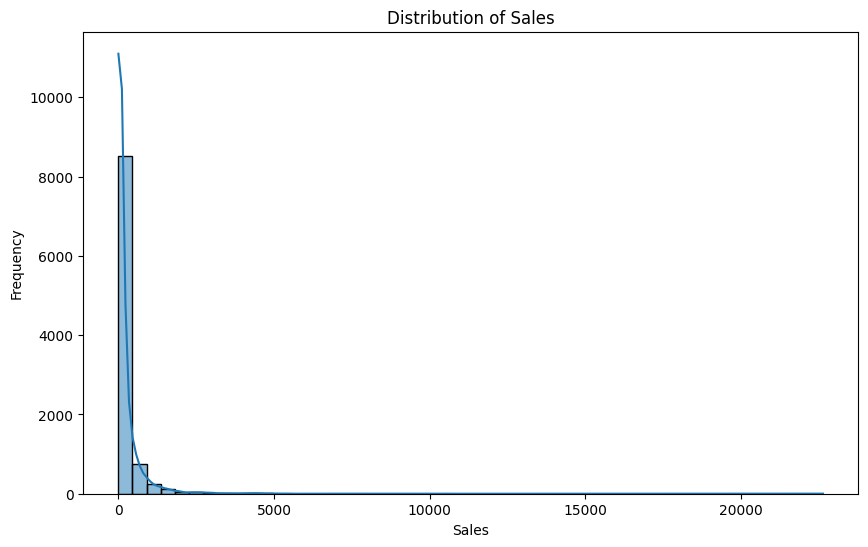

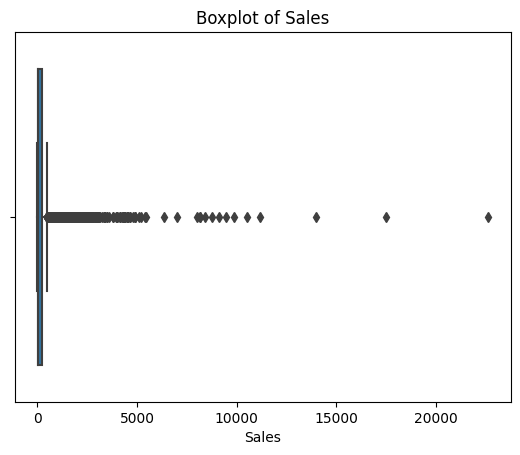

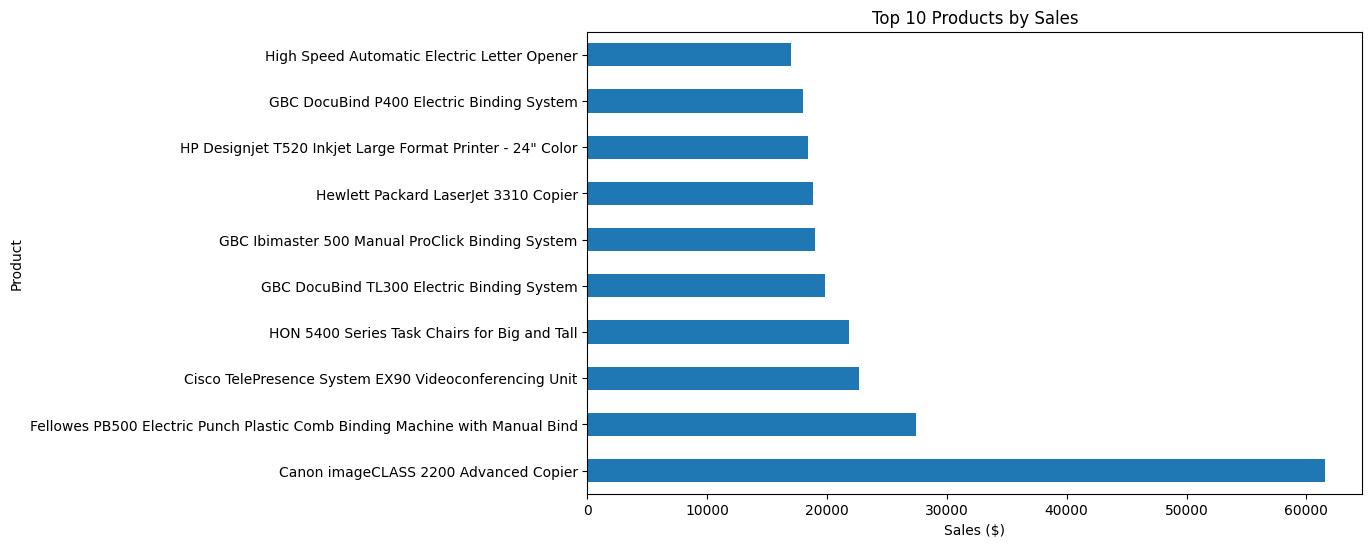

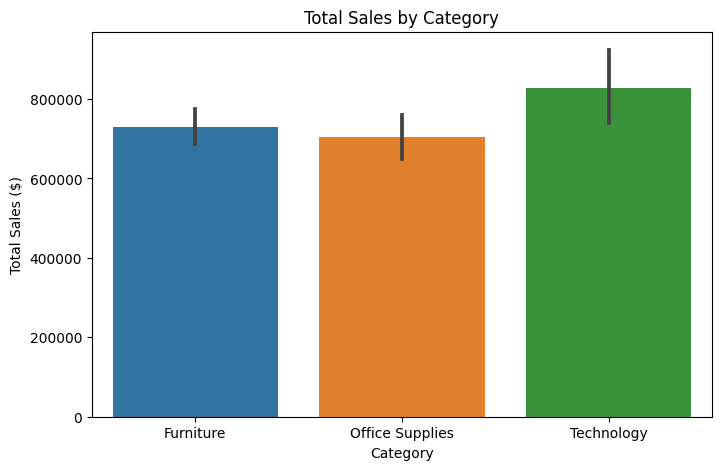

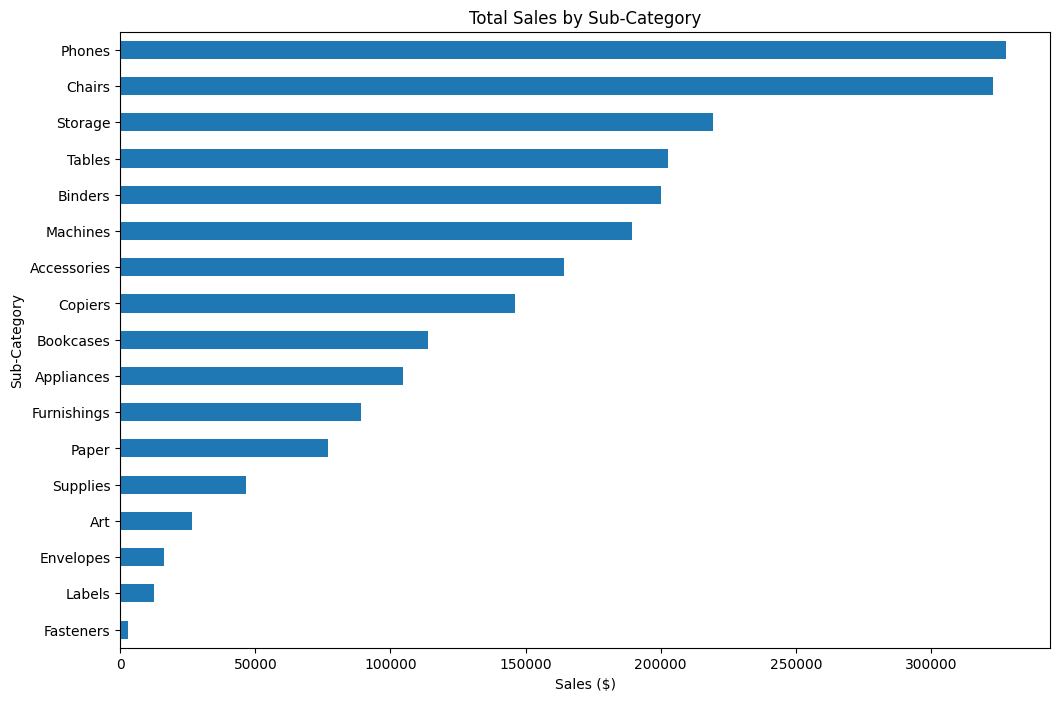

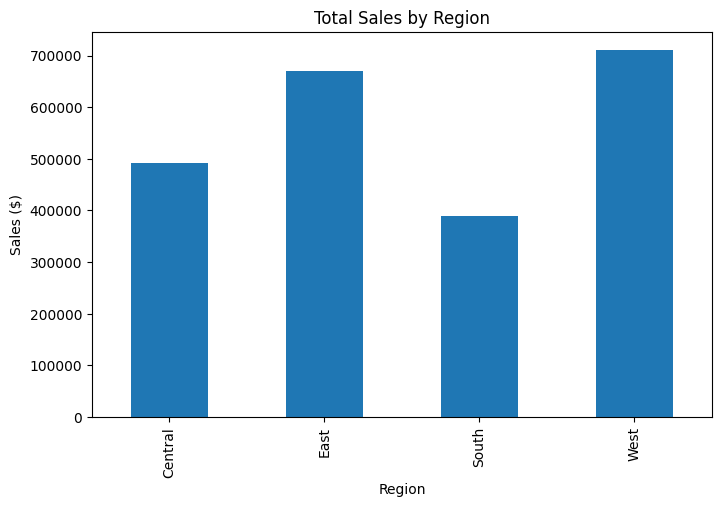

In [17]:
# Total Sales
if 'Sales' in df.columns:
    total_sales = df['Sales'].sum()
    print(f"Total Sales: ${total_sales:,.2f}")
else:
    print("Column 'Sales' not found.")

# Histogram of Sales
if 'Sales' in df.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(df['Sales'], bins=50, kde=True)
    plt.title("Distribution of Sales")
    plt.xlabel("Sales")
    plt.ylabel("Frequency")
    plt.show()

# Boxplot of Sales
if 'Sales' in df.columns:
    sns.boxplot(x=df['Sales'])
    plt.title("Boxplot of Sales")
    plt.xlabel("Sales")
    plt.show()

# Top 10 Products by Sales
if 'Product Name' in df.columns and 'Sales' in df.columns:
    top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
    top_products.plot(kind='barh', figsize=(10,6), title="Top 10 Products by Sales")
    plt.xlabel("Sales ($)")
    plt.ylabel("Product")
    plt.show()

# Sales by Category
if 'Category' in df.columns and 'Sales' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Category', y='Sales', data=df, estimator=np.sum)
    plt.title("Total Sales by Category")
    plt.ylabel("Total Sales ($)")
    plt.show()

# Sales by Sub-Category
if 'Sub-Category' in df.columns and 'Sales' in df.columns:
    plt.figure(figsize=(12,8))
    df.groupby('Sub-Category')['Sales'].sum().sort_values().plot(kind='barh')
    plt.title("Total Sales by Sub-Category")
    plt.xlabel("Sales ($)")
    plt.ylabel("Sub-Category")
    plt.show()

# Sales by Region
if 'Region' in df.columns and 'Sales' in df.columns:
    df.groupby('Region')['Sales'].sum().plot(kind='bar', title="Total Sales by Region", figsize=(8,5))
    plt.ylabel("Sales ($)")
    plt.xlabel("Region")
    plt.show()


Columns in the dataset:
['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales']

First five rows of the dataset:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   

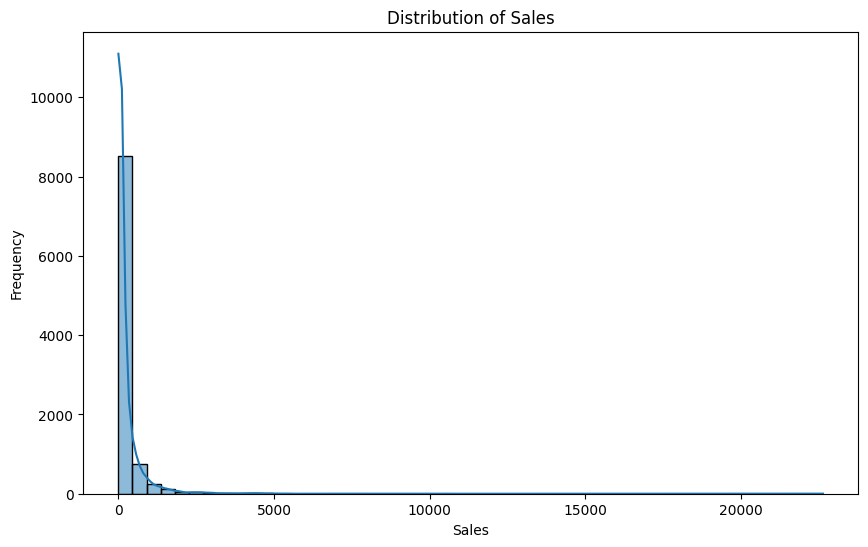

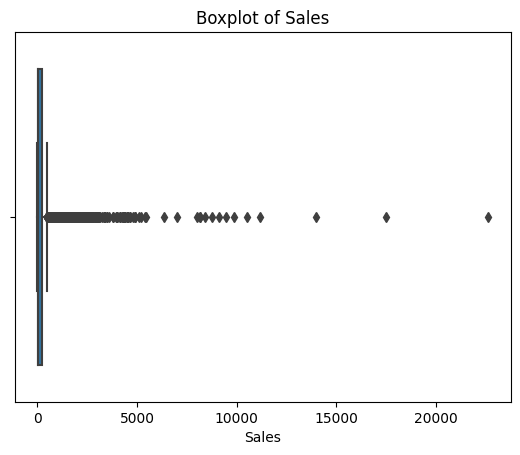

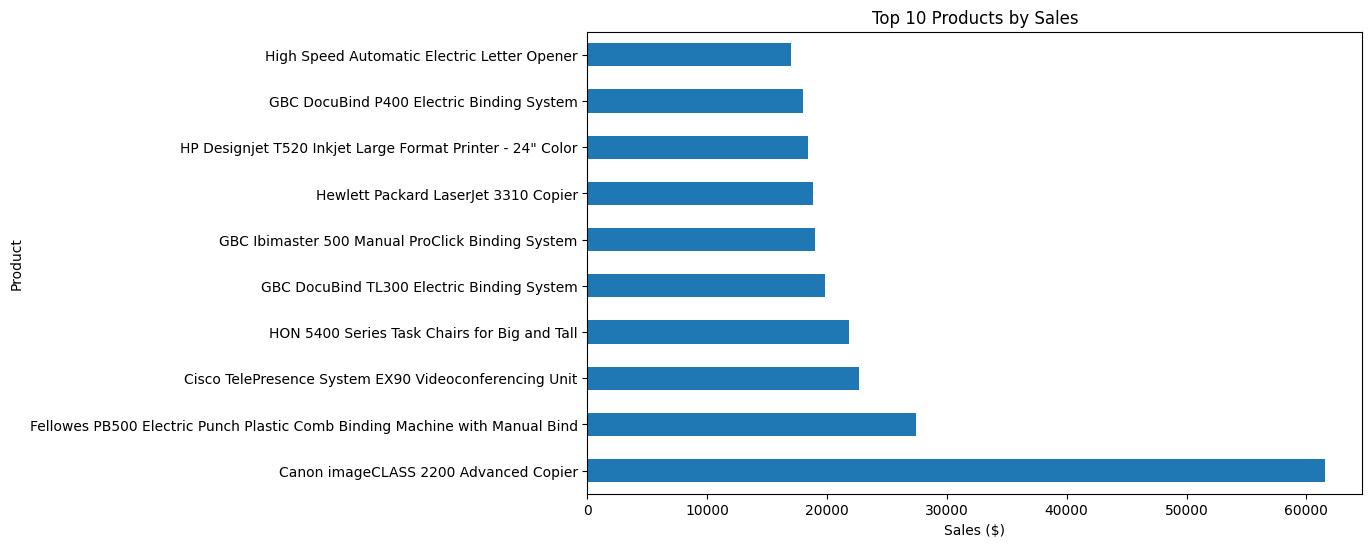

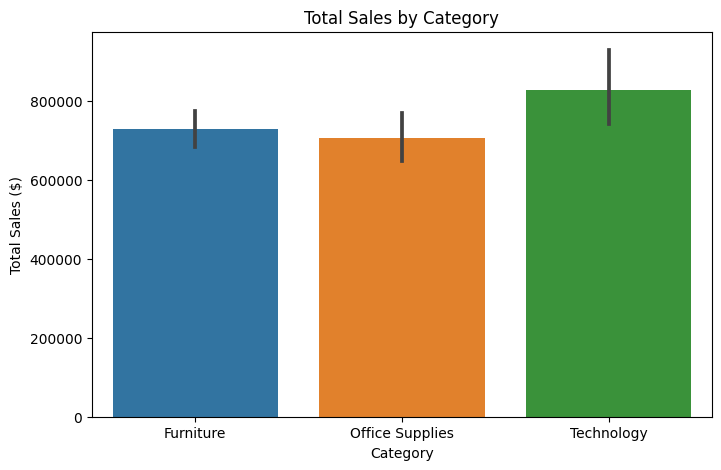

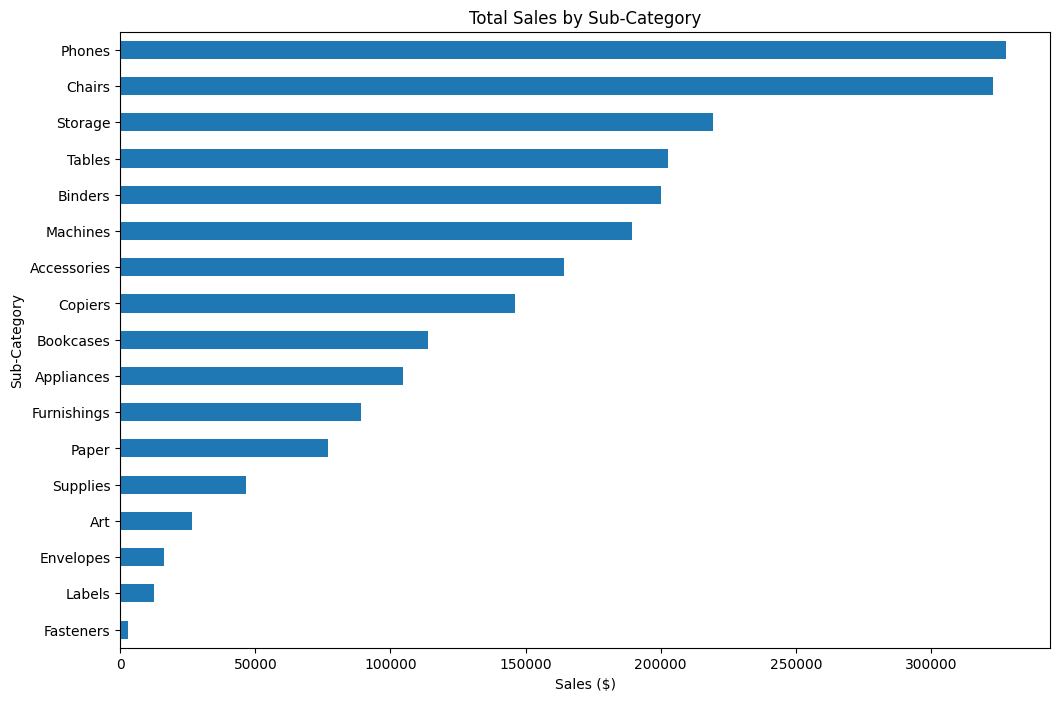

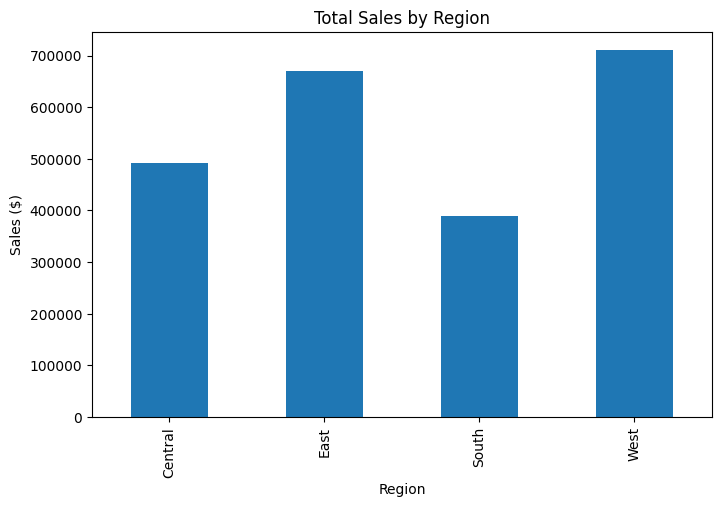

In [21]:
from datetime import datetime
warnings.filterwarnings("ignore")

file_path = "/kaggle/input/sales-data/train.csv"
df = pd.read_csv(file_path)

print("Columns in the dataset:")
print(df.columns.tolist())

print("\nFirst five rows of the dataset:")
print(df.head())

print("\nData types:")
print(df.dtypes)

print("\nMissing values:")
print(df.isnull().sum())

print("\nSummary statistics (numerical columns):")
print(df.describe())

#  DATA CLEANING 
df.drop_duplicates(inplace=True)

#Data Parsing
for date_col in ['Order Date', 'Ship Date']:
    if date_col in df.columns:
        df[date_col] = pd.to_datetime(df[date_col], dayfirst=True, errors='coerce')

if 'Order Date' in df.columns:
    df['Order Year'] = df['Order Date'].dt.year
    df['Order Month'] = df['Order Date'].dt.month_name()
    df['Order Day'] = df['Order Date'].dt.day_name()

# Total Sales
if 'Sales' in df.columns:
    total_sales = df['Sales'].sum()
    print(f"\nTotal Sales: ${total_sales:,.2f}")

# Histogram of Sales
if 'Sales' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Sales'], bins=50, kde=True)
    plt.title("Distribution of Sales")
    plt.xlabel("Sales")
    plt.ylabel("Frequency")
    plt.show()

# Boxplot of Sales
if 'Sales' in df.columns:
    sns.boxplot(x=df['Sales'])
    plt.title("Boxplot of Sales")
    plt.xlabel("Sales")
    plt.show()

# Top 10 Products by Sales
if 'Product Name' in df.columns and 'Sales' in df.columns:
    top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
    top_products.plot(kind='barh', figsize=(10, 6), title="Top 10 Products by Sales")
    plt.xlabel("Sales ($)")
    plt.ylabel("Product")
    plt.show()

# Sales by Category
if 'Category' in df.columns and 'Sales' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Category', y='Sales', data=df, estimator=np.sum)
    plt.title("Total Sales by Category")
    plt.ylabel("Total Sales ($)")
    plt.show()

# Sales by Sub-Category
if 'Sub-Category' in df.columns and 'Sales' in df.columns:
    plt.figure(figsize=(12, 8))
    df.groupby('Sub-Category')['Sales'].sum().sort_values().plot(kind='barh')
    plt.title("Total Sales by Sub-Category")
    plt.xlabel("Sales ($)")
    plt.ylabel("Sub-Category")
    plt.show()

# Sales by Region
if 'Region' in df.columns and 'Sales' in df.columns:
    df.groupby('Region')['Sales'].sum().plot(kind='bar', title="Total Sales by Region", figsize=(8, 5))
    plt.ylabel("Sales ($)")
    plt.xlabel("Region")
    plt.show()

# Sales vs Quantity
if 'Sales' in df.columns and 'Quantity' in df.columns:
    sns.scatterplot(x='Quantity', y='Sales', data=df)
    plt.title("Sales vs Quantity")
    plt.xlabel("Quantity")
    plt.ylabel("Sales")
    plt.show()

# Sales per Unit
if 'Sales' in df.columns and 'Quantity' in df.columns:
    df['Sales per Unit'] = df['Sales'] / df['Quantity']
    sns.scatterplot(x='Quantity', y='Sales per Unit', data=df)
    plt.title("Sales per Unit vs Quantity")
    plt.xlabel("Quantity")
    plt.ylabel("Sales per Unit")
    plt.show()

# Correlation Matrix
numerical_cols = ['Sales', 'Quantity', 'Discount', 'Profit']
existing_numericals = [col for col in numerical_cols if col in df.columns]
if len(existing_numericals) >= 2:
    plt.figure(figsize=(6, 4))
    sns.heatmap(df[existing_numericals].corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Matrix")
    plt.show()

# Total Profit
if 'Profit' in df.columns:
    total_profit = df['Profit'].sum()
    print(f"\nTotal Profit: ${total_profit:,.2f}")

# Profit Distribution
if 'Profit' in df.columns:
    sns.histplot(df['Profit'], bins=50, kde=True)
    plt.title("Profit Distribution")
    plt.xlabel("Profit")
    plt.ylabel("Frequency")
    plt.show()

# Top 10 Profitable Products
if 'Product Name' in df.columns and 'Profit' in df.columns:
    df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10).plot(kind='barh')
    plt.title("Top 10 Profitable Products")
    plt.xlabel("Profit ($)")
    plt.ylabel("Product")
    plt.show()

# Profit by Category
if 'Category' in df.columns and 'Profit' in df.columns:
    sns.barplot(x='Category', y='Profit', data=df, estimator=np.sum)
    plt.title("Profit by Category")
    plt.ylabel("Profit ($)")
    plt.show()

# Profit by Sub-Category
if 'Sub-Category' in df.columns and 'Profit' in df.columns:
    df.groupby('Sub-Category')['Profit'].sum().sort_values().plot(kind='barh')
    plt.title("Profit by Sub-Category")
    plt.xlabel("Profit ($)")
    plt.ylabel("Sub-Category")
    plt.show()

# Profit by Region
if 'Region' in df.columns and 'Profit' in df.columns:
    df.groupby('Region')['Profit'].sum().plot(kind='bar', title="Profit by Region", figsize=(8, 5))
    plt.ylabel("Profit ($)")
    plt.xlabel("Region")
    plt.show()

# Profit Ratio (Profit / Sales)
if 'Sales' in df.columns and 'Profit' in df.columns:
    df['Profit Ratio'] = df['Profit'] / df['Sales']
    if 'Category' in df.columns:
        df.groupby('Category')['Profit Ratio'].mean().plot(kind='bar', title="Average Profit Ratio by Category")
        plt.ylabel("Profit Ratio")
        plt.show()

# Loss-making Transactions
if 'Profit' in df.columns:
    loss_products = df[df['Profit'] < 0]
    print(f"\nNumber of loss-making transactions: {len(loss_products)}")

# Loss by Sub-Category
if 'Profit' in df.columns and 'Sub-Category' in df.columns:
    loss_products.groupby('Sub-Category')['Profit'].sum().sort_values().plot(kind='barh')
    plt.title("Loss by Sub-Category")
    plt.xlabel("Loss ($)")
    plt.ylabel("Sub-Category")
    plt.show()

# Profit vs Sales
if 'Profit' in df.columns and 'Sales' in df.columns:
    sns.scatterplot(x='Sales', y='Profit', data=df)
    plt.title("Profit vs Sales")
    plt.xlabel("Sales")
    plt.ylabel("Profit")
    plt.show()


Order Analysis 


Total Unique Orders: 4922

Monthly Orders (sorted):
Order Month
November     1449
December     1382
September    1354
October       809
May           725
July          697
August        693
June          691
March         680
April         657
January       366
February      297
Name: Order ID, dtype: int64


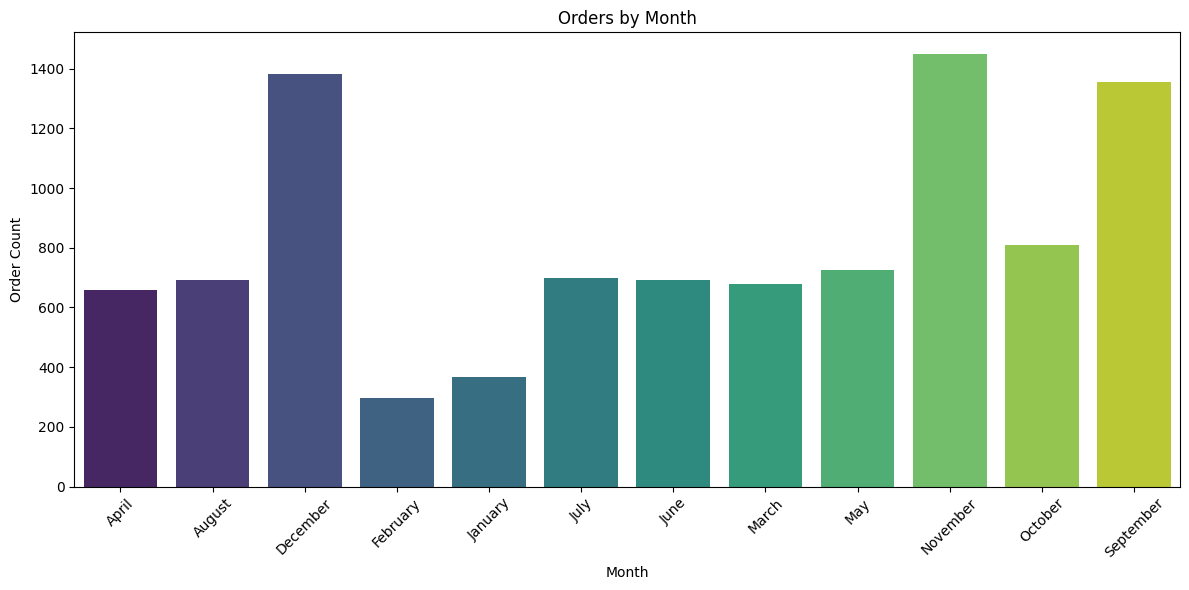

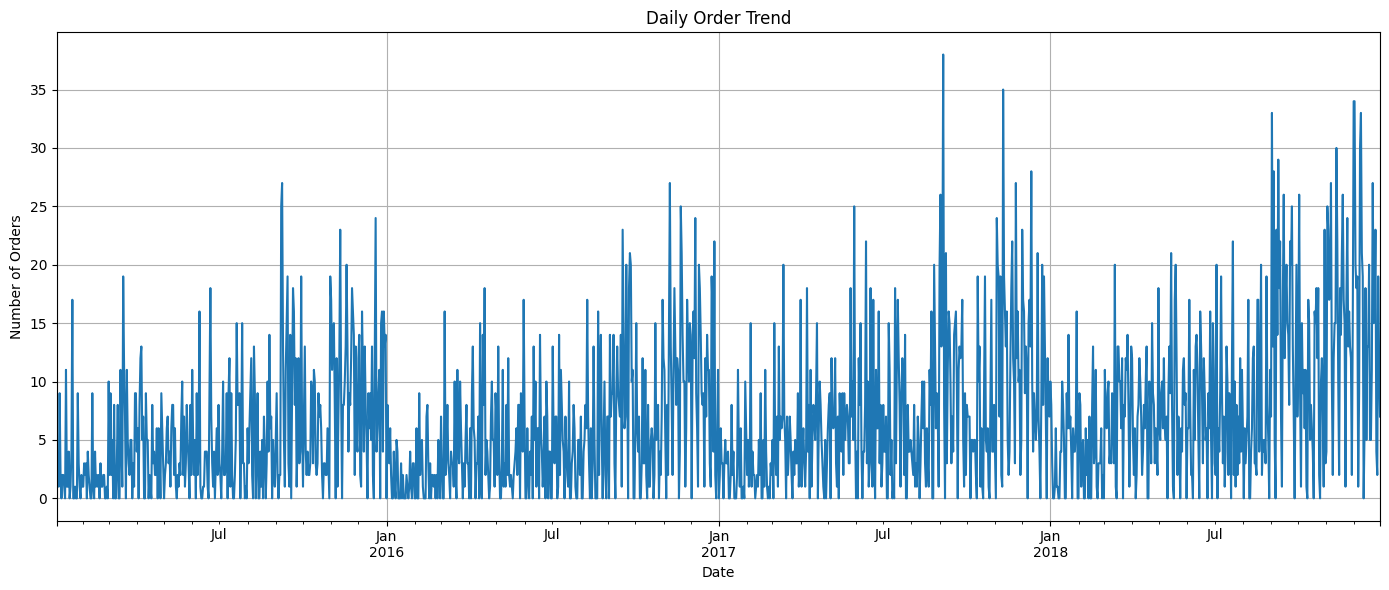

In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'visuals' directory exists
output_dir = "visuals"
os.makedirs(output_dir, exist_ok=True)

# Total Unique Orders
if 'Order ID' in df.columns:
    total_orders = df['Order ID'].nunique()
    print(f"\nTotal Unique Orders: {total_orders}")

# Monthly Orders
if 'Order Month' in df.columns and 'Order ID' in df.columns:
    monthly_orders = df.groupby('Order Month')['Order ID'].count()
    print("\nMonthly Orders (sorted):")
    print(monthly_orders.sort_values(ascending=False))

    # Plot Monthly Orders
    plt.figure(figsize=(12, 6))
    sns.barplot(x=monthly_orders.index, y=monthly_orders.values, palette='viridis')
    plt.title("Orders by Month")
    plt.xlabel("Month")
    plt.ylabel("Order Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/monthly_orders.png')
    plt.show()

# Daily Orders Time Series
if 'Order Date' in df.columns and 'Order ID' in df.columns:
    daily_orders = df.resample('D', on='Order Date')['Order ID'].count()

    plt.figure(figsize=(14, 6))
    daily_orders.plot()
    plt.title("Daily Order Trend")
    plt.xlabel("Date")
    plt.ylabel("Number of Orders")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/daily_order_trend.png')
    plt.show()


Customer Analysis 


Unique Customers: 793

Top 10 Customers by Orders:
Customer ID  Customer Name      
WB-21850     William Brown          35
PP-18955     Paul Prost             34
MA-17560     Matt Abelman           34
JL-15835     John Lee               33
CK-12205     Chloris Kastensmidt    32
SV-20365     Seth Vernon            32
JD-15895     Jonathan Doherty       32
AP-10915     Arthur Prichep         31
ZC-21910     Zuschuss Carroll       31
EP-13915     Emily Phan             31
Name: Order ID, dtype: int64


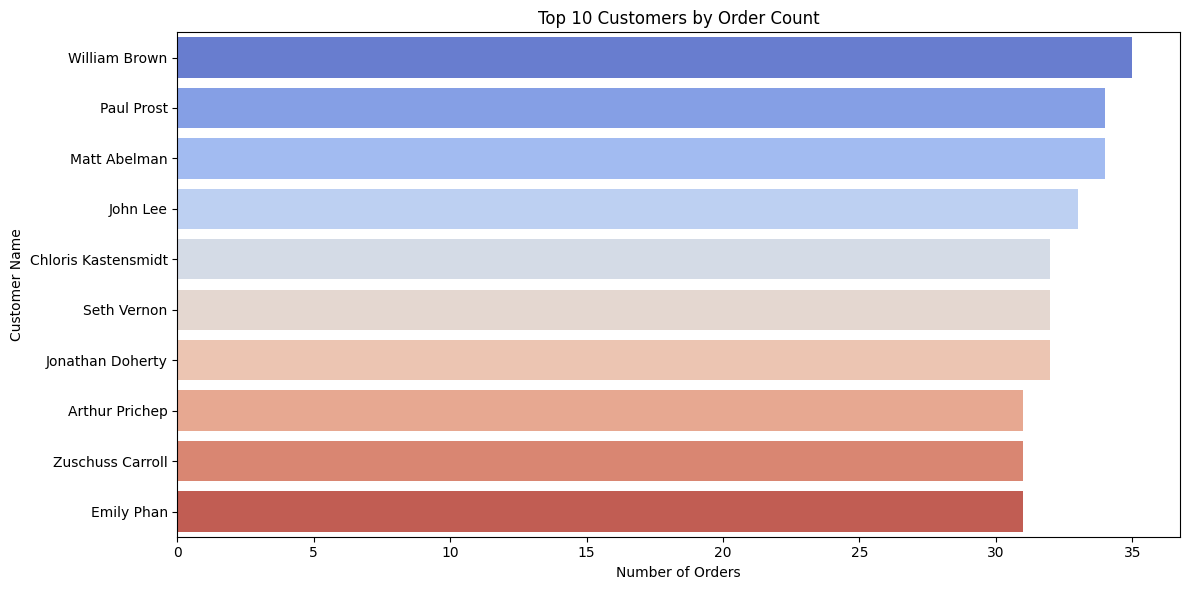


Customer Segments:
Segment
Consumer       5101
Corporate      2953
Home Office    1746
Name: count, dtype: int64


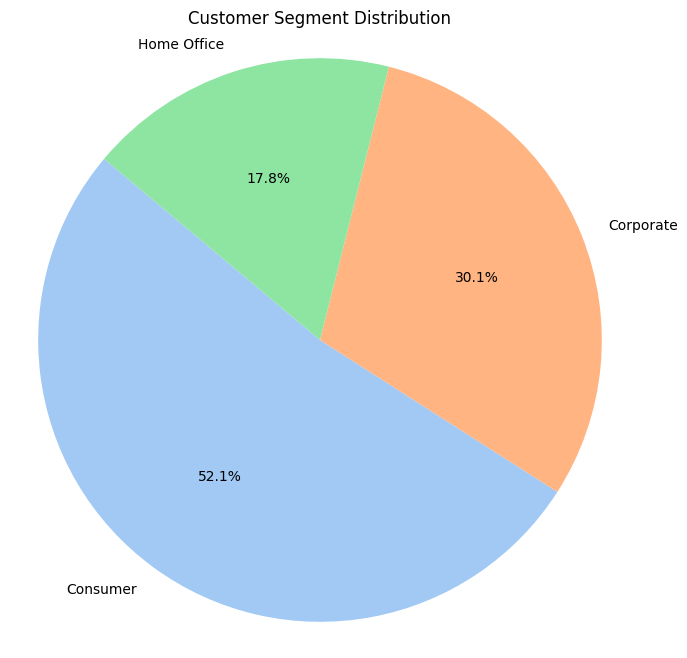

In [24]:
# Unique customers
unique_customers = df['Customer ID'].nunique()
print(f"\nUnique Customers: {unique_customers}")

# Top 10 customers by order count
top_customers = df.groupby(['Customer ID', 'Customer Name'])['Order ID'].count().sort_values(ascending=False).head(10)
print("\nTop 10 Customers by Orders:")
print(top_customers)

# Plot top customers
top_customers_df = top_customers.reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=top_customers_df, x='Order ID', y='Customer Name', palette='coolwarm')
plt.title("Top 10 Customers by Order Count")
plt.xlabel("Number of Orders")
plt.ylabel("Customer Name")
plt.tight_layout()
plt.savefig('visuals/top_customers_by_orders.png')
plt.show()

# Segment-wise customer count
segment_counts = df['Segment'].value_counts()
print("\nCustomer Segments:")
print(segment_counts)

# Pie chart of segments
plt.figure(figsize=(8,8))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Customer Segment Distribution")
plt.axis('equal')
plt.savefig('visuals/customer_segment_distribution.png')
plt.show()

Geographics Analysis 


Top 10 Countries by Orders:
Country
United States    9800
Name: count, dtype: int64


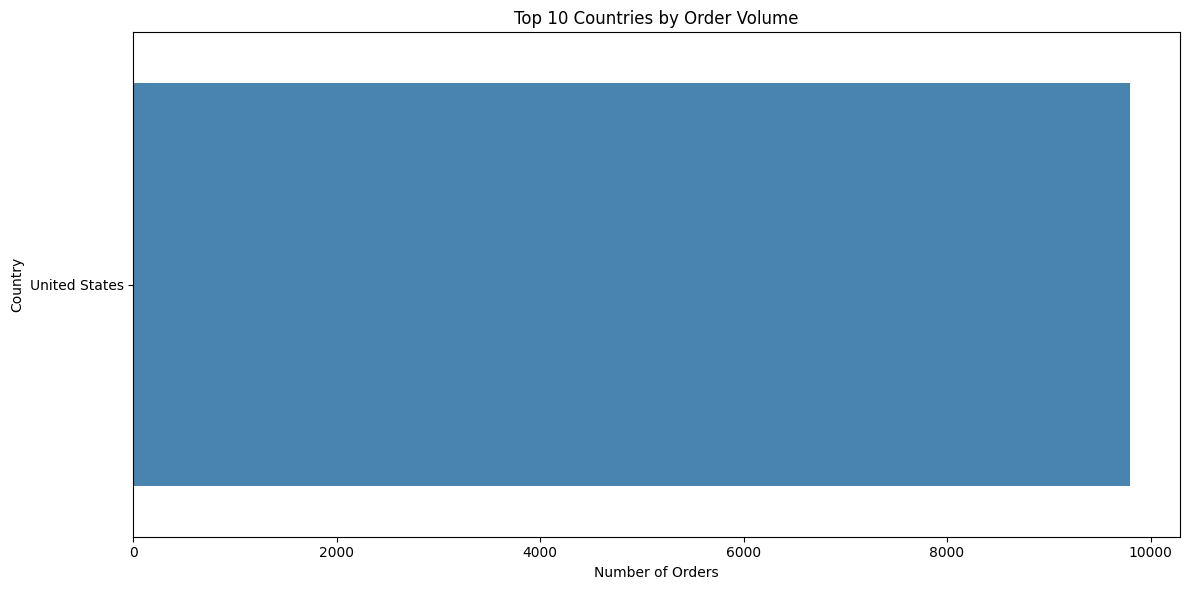


Top 10 Cities by Orders:
City
New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
Houston          374
Chicago          308
Columbus         221
San Diego        170
Springfield      161
Name: count, dtype: int64


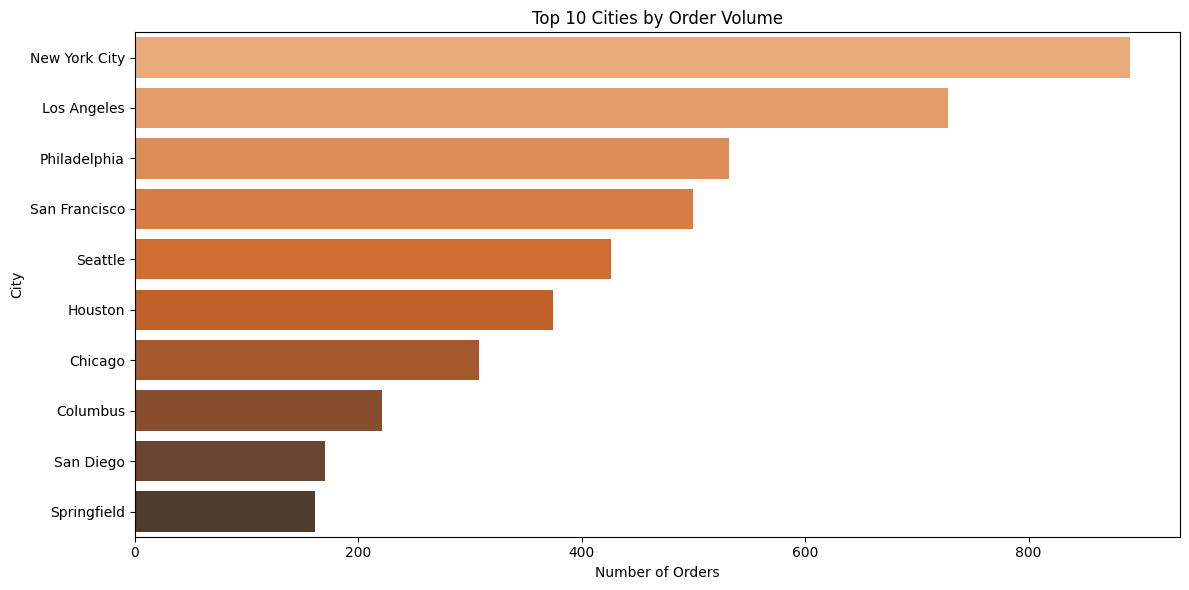

In [25]:
# Top 10 countries
country_orders = df['Country'].value_counts().head(10)
print("\nTop 10 Countries by Orders:")
print(country_orders)

# Bar chart: Top countries
plt.figure(figsize=(12,6))
sns.barplot(x=country_orders.values, y=country_orders.index, palette='Blues_d')
plt.title("Top 10 Countries by Order Volume")
plt.xlabel("Number of Orders")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig('visuals/top_countries_orders.png')
plt.show()

# Top 10 cities
city_orders = df['City'].value_counts().head(10)
print("\nTop 10 Cities by Orders:")
print(city_orders)

# City bar plot
plt.figure(figsize=(12,6))
sns.barplot(x=city_orders.values, y=city_orders.index, palette='Oranges_d')
plt.title("Top 10 Cities by Order Volume")
plt.xlabel("Number of Orders")
plt.ylabel("City")
plt.tight_layout()
plt.savefig('visuals/top_cities_orders.png')
plt.show()

Shipping Mode Analysis 


Ship Mode Distribution:
Ship Mode
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: count, dtype: int64


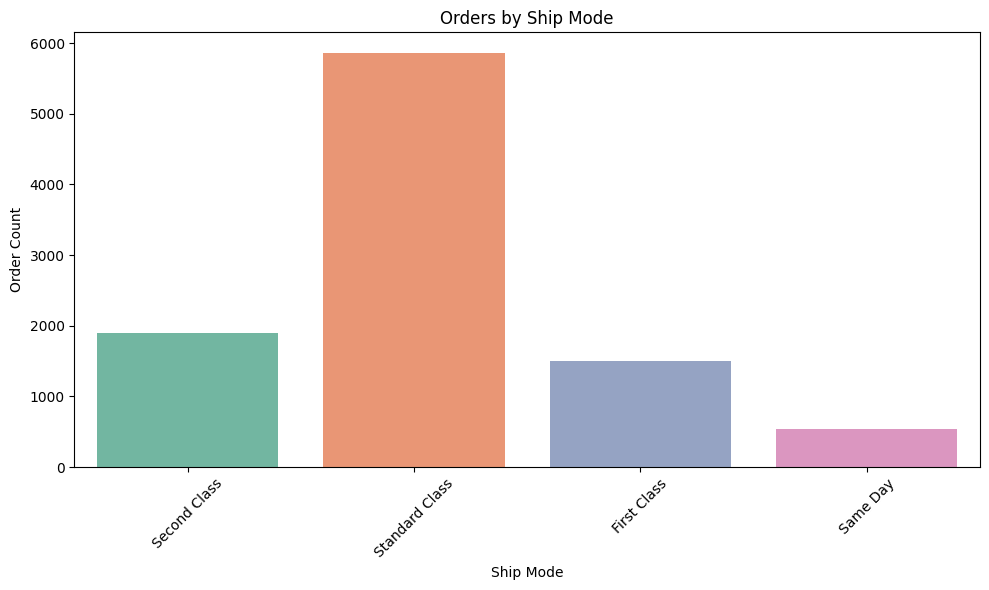

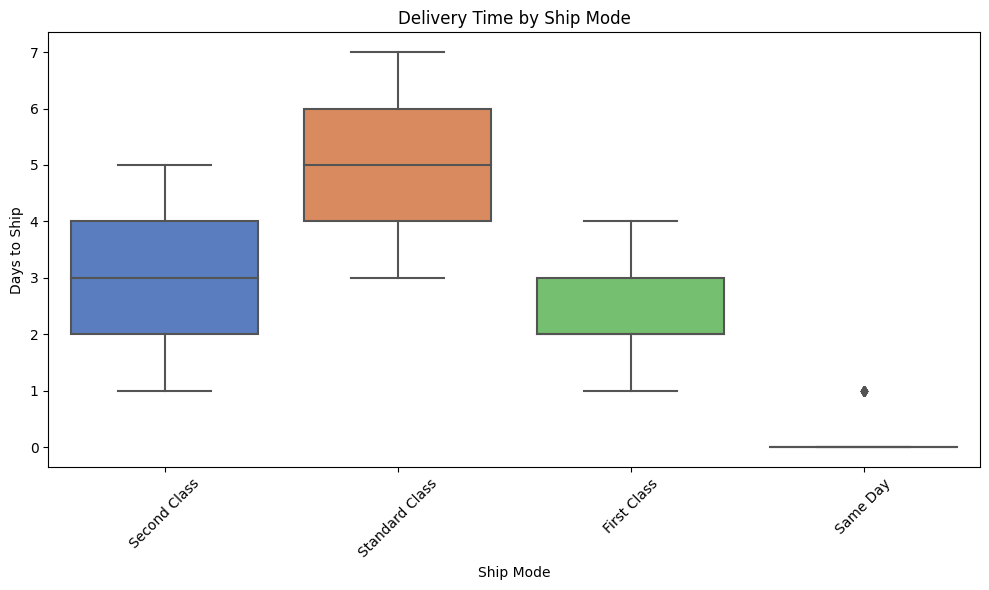

In [27]:
# Ship Mode Distribution
if 'Ship Mode' in df.columns:
    ship_mode_counts = df['Ship Mode'].value_counts()
    print("\nShip Mode Distribution:")
    print(ship_mode_counts)

    # Bar plot
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='Ship Mode', palette='Set2')
    plt.title("Orders by Ship Mode")
    plt.xlabel("Ship Mode")
    plt.ylabel("Order Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('visuals/orders_by_ship_mode.png')
    plt.show()

# Compute 'Days to Ship'
if 'Order Date' in df.columns and 'Ship Date' in df.columns:
    df['Days to Ship'] = (df['Ship Date'] - df['Order Date']).dt.days
else:
    print("Either 'Order Date' or 'Ship Date' column is missing. Cannot compute delivery time.")

# Delivery Time Boxplot by Ship Mode
if 'Ship Mode' in df.columns and 'Days to Ship' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Ship Mode', y='Days to Ship', palette='muted')
    plt.title("Delivery Time by Ship Mode")
    plt.ylabel("Days to Ship")
    plt.xlabel("Ship Mode")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('visuals/delivery_time_by_ship_mode.png')
    plt.show()
else:
    print("Cannot plot delivery time boxplot. Ensure 'Days to Ship' and 'Ship Mode' columns are present.")

comparative visualisation 

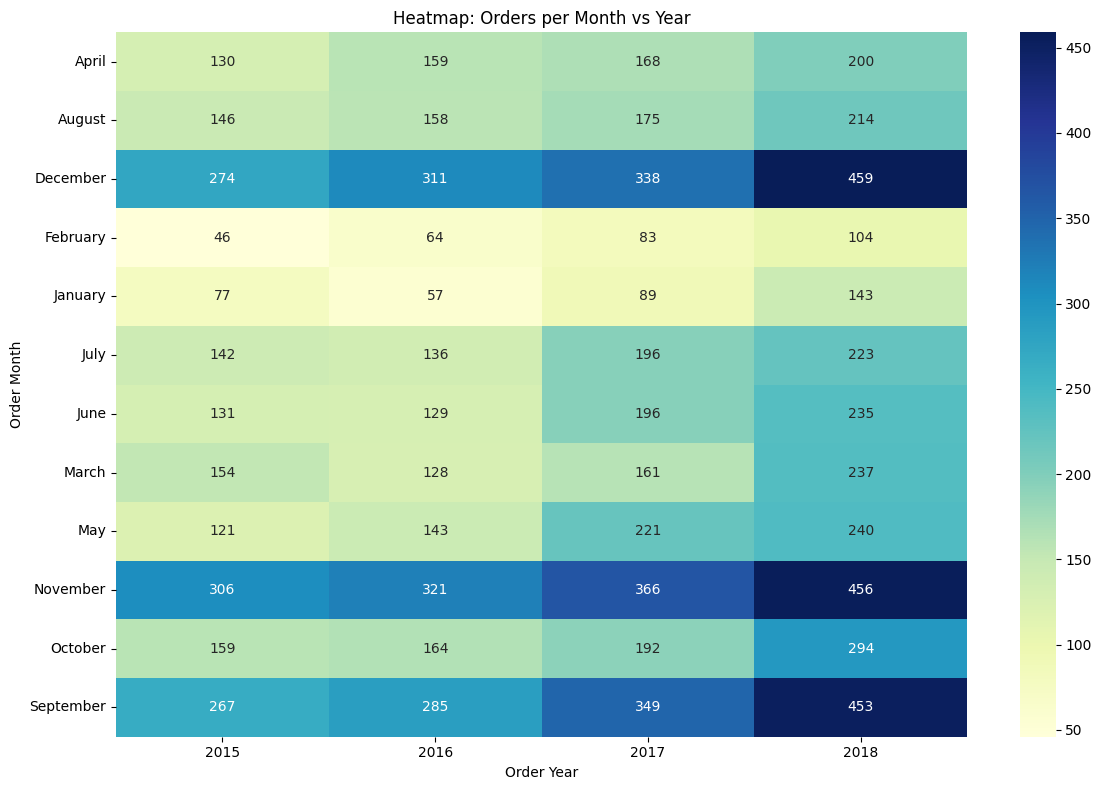

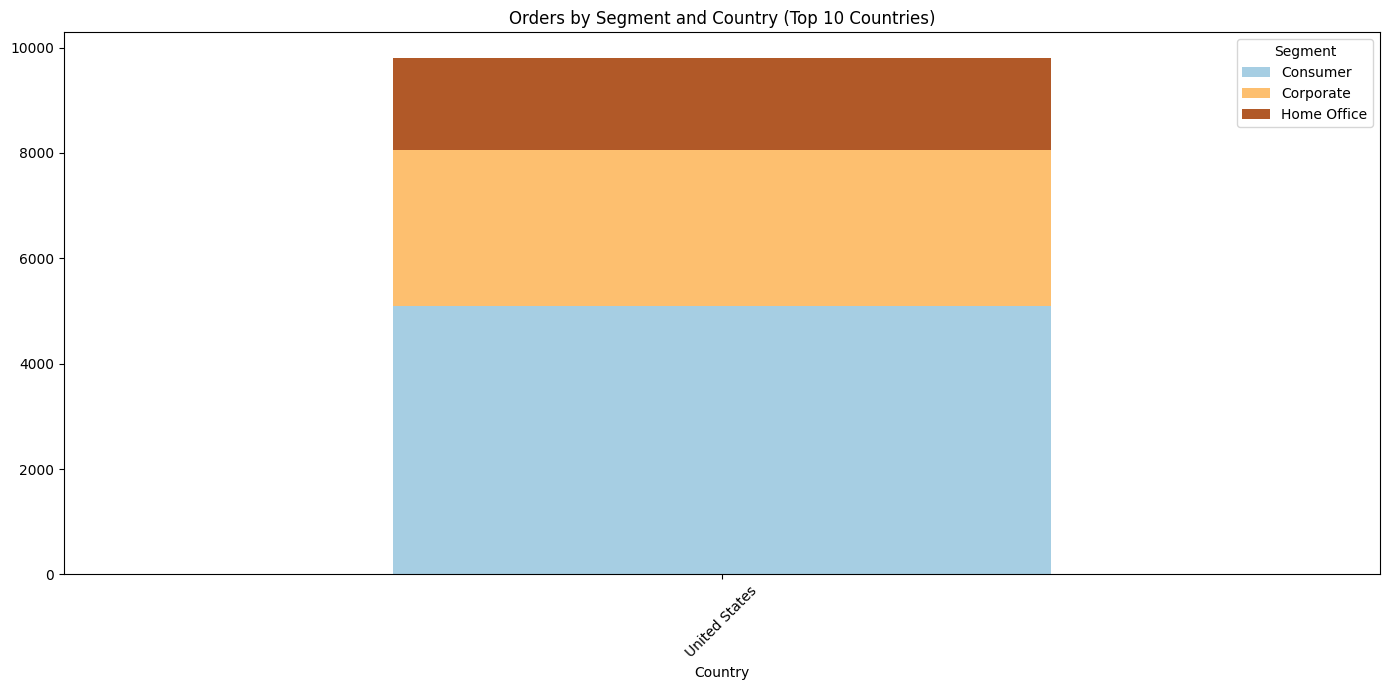

In [28]:
# Heatmap: Orders per month vs year
pivot_table = df.pivot_table(index='Order Month', columns='Order Year', values='Order ID', aggfunc='count')
plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title("Heatmap: Orders per Month vs Year")
plt.tight_layout()
plt.savefig('visuals/month_year_heatmap.png')
plt.show()

# Stacked bar: Orders by segment and country
grouped = df.groupby(['Country', 'Segment']).size().unstack(fill_value=0)
grouped = grouped.loc[grouped.sum(axis=1).sort_values(ascending=False).index[:10]]
grouped.plot(kind='bar', stacked=True, figsize=(14,7), colormap='Paired')
plt.title("Orders by Segment and Country (Top 10 Countries)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('visuals/segment_country_stacked_bar.png')
plt.show()

Customer Behavior Over Time


Top 10 Loyal Customers by Lifespan:
            first_order last_order  lifespan_days
Customer ID                                      
MM-17920     2015-01-13 2018-12-23           1440
DL-13315     2015-01-16 2018-12-08           1422
CS-12250     2015-01-13 2018-12-04           1421
ND-18370     2015-01-13 2018-12-03           1420
GA-14725     2015-02-11 2018-12-25           1413
MV-17485     2015-01-20 2018-12-03           1413
ME-17320     2015-01-06 2018-11-18           1412
MB-18085     2015-01-05 2018-11-16           1411
MV-18190     2015-01-30 2018-12-11           1411
BS-11590     2015-01-14 2018-11-25           1411


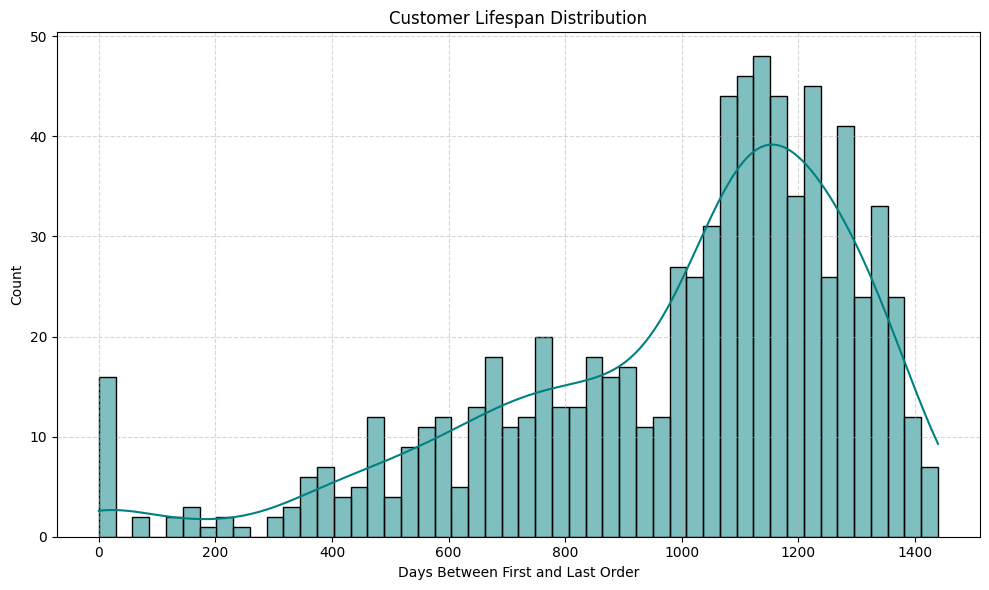

In [29]:
# First and last order dates per customer
customer_activity = df.groupby('Customer ID').agg(
    first_order=('Order Date', 'min'),
    last_order=('Order Date', 'max')
)

# Calculate customer lifespan (in days)
customer_activity['lifespan_days'] = (customer_activity['last_order'] - customer_activity['first_order']).dt.days

# Top 10 most loyal customers by lifespan
top_loyal_customers = customer_activity.sort_values(by='lifespan_days', ascending=False).head(10)
print("\nTop 10 Loyal Customers by Lifespan:")
print(top_loyal_customers[['first_order', 'last_order', 'lifespan_days']])

# Plot lifespan distribution
plt.figure(figsize=(10,6))
sns.histplot(customer_activity['lifespan_days'], bins=50, kde=True, color='teal')
plt.title("Customer Lifespan Distribution")
plt.xlabel("Days Between First and Last Order")
plt.ylabel("Count")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('visuals/customer_lifespan_distribution.png')
plt.show()

Geographic Clustering 


Cities with Longest Average Delivery Times:
City
Conway            7.000000
Waukesha          7.000000
Yucaipa           7.000000
Oswego            7.000000
Norfolk           7.000000
Citrus Heights    7.000000
Danbury           7.000000
Olathe            6.600000
Hot Springs       6.500000
Urbandale         6.333333
Name: Days to Ship, dtype: float64


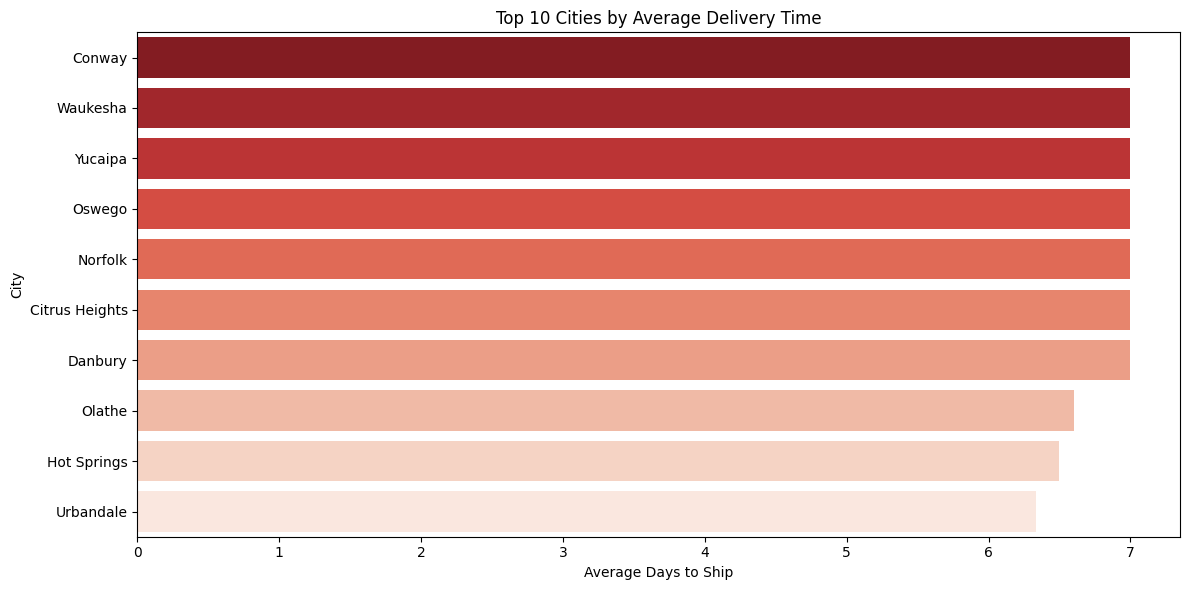


Countries with Longest Average Delivery Times:
Country
United States    3.961122
Name: Days to Ship, dtype: float64


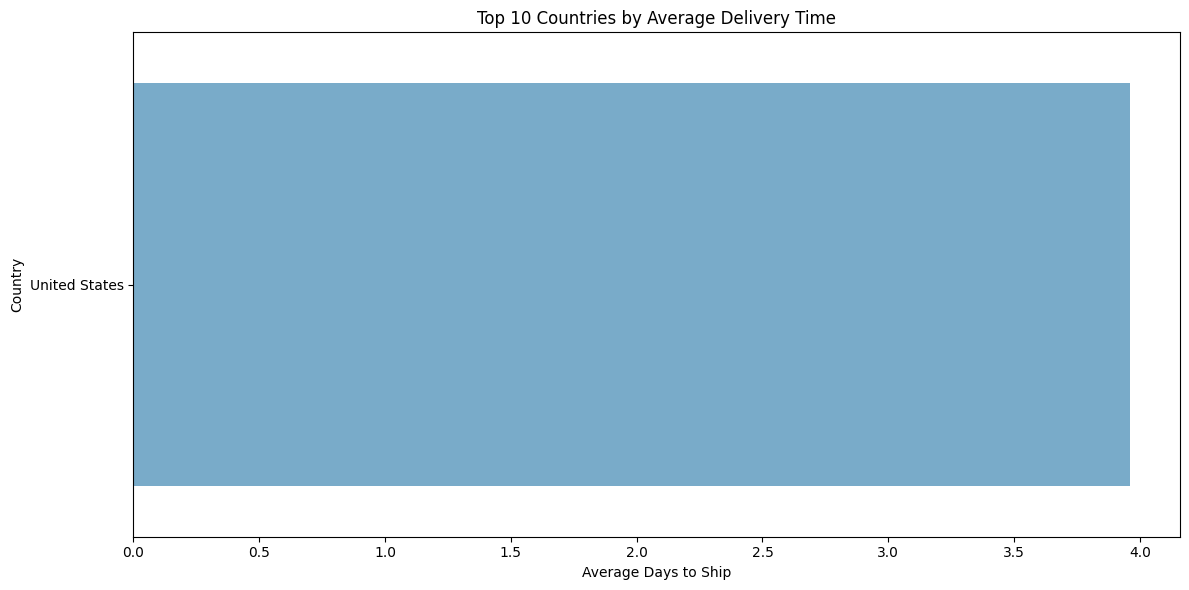

In [30]:
# Group by city for average shipping duration
city_shipping = df.groupby('City')['Days to Ship'].mean().sort_values(ascending=False).head(10)
print("\nCities with Longest Average Delivery Times:")
print(city_shipping)

# Bar chart for slow cities
plt.figure(figsize=(12,6))
sns.barplot(x=city_shipping.values, y=city_shipping.index, palette='Reds_r')
plt.title("Top 10 Cities by Average Delivery Time")
plt.xlabel("Average Days to Ship")
plt.ylabel("City")
plt.tight_layout()
plt.savefig('visuals/cities_delivery_time.png')
plt.show()

# Group by country for average delivery time
country_shipping = df.groupby('Country')['Days to Ship'].mean().sort_values(ascending=False).head(10)
print("\nCountries with Longest Average Delivery Times:")
print(country_shipping)

# Country bar plot
plt.figure(figsize=(12,6))
sns.barplot(x=country_shipping.values, y=country_shipping.index, palette='Blues_r')
plt.title("Top 10 Countries by Average Delivery Time")
plt.xlabel("Average Days to Ship")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig('visuals/countries_delivery_time.png')
plt.show()

Ship Movement vs Performance 


Ship Mode Efficiency:
                avg_days  count
Ship Mode                      
Same Day        0.044610    538
First Class     2.179214   1501
Second Class    3.249211   1902
Standard Class  5.008363   5859


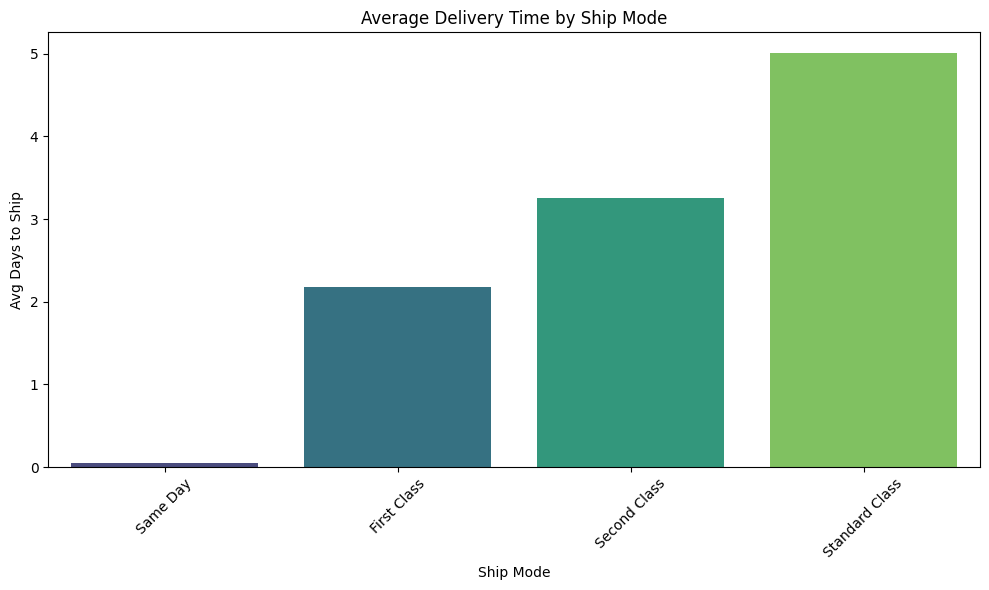

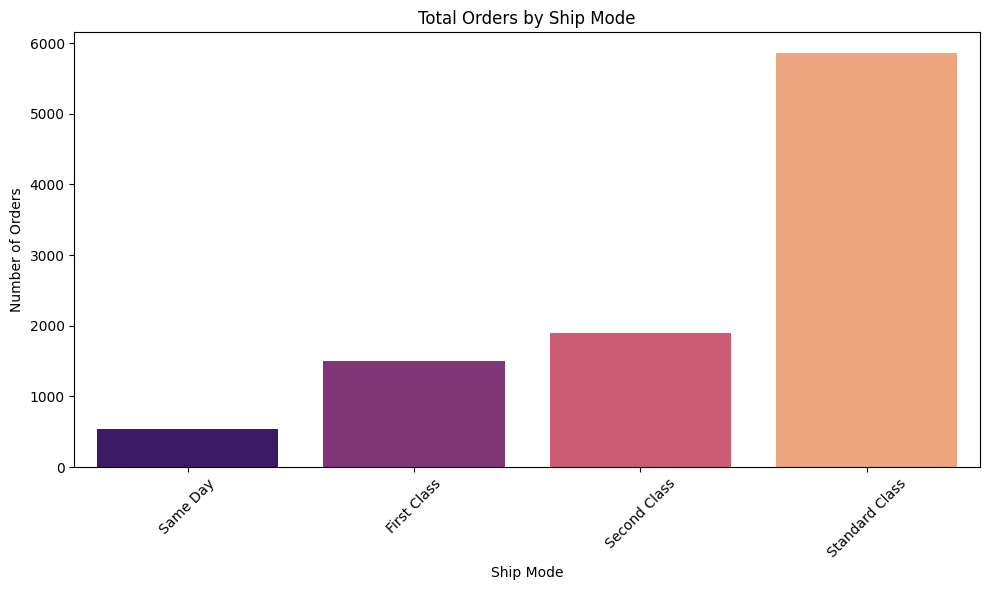

In [31]:
# Ship mode efficiency
ship_mode_efficiency = df.groupby('Ship Mode').agg(
    avg_days=('Days to Ship', 'mean'),
    count=('Order ID', 'count')
).sort_values(by='avg_days')

print("\nShip Mode Efficiency:")
print(ship_mode_efficiency)

# Plot ship mode vs average delivery time
plt.figure(figsize=(10,6))
sns.barplot(data=ship_mode_efficiency.reset_index(), x='Ship Mode', y='avg_days', palette='viridis')
plt.title("Average Delivery Time by Ship Mode")
plt.ylabel("Avg Days to Ship")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('visuals/ship_mode_avg_delivery_time.png')
plt.show()

# Count of orders per ship mode
plt.figure(figsize=(10,6))
sns.barplot(data=ship_mode_efficiency.reset_index(), x='Ship Mode', y='count', palette='magma')
plt.title("Total Orders by Ship Mode")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('visuals/orders_by_ship_mode_count.png')
plt.show()

Segment Based Comparison 


Segment-wise Average Delivery Time:
Segment
Corporate      4.021334
Consumer       3.941384
Home Office    3.916953
Name: Days to Ship, dtype: float64


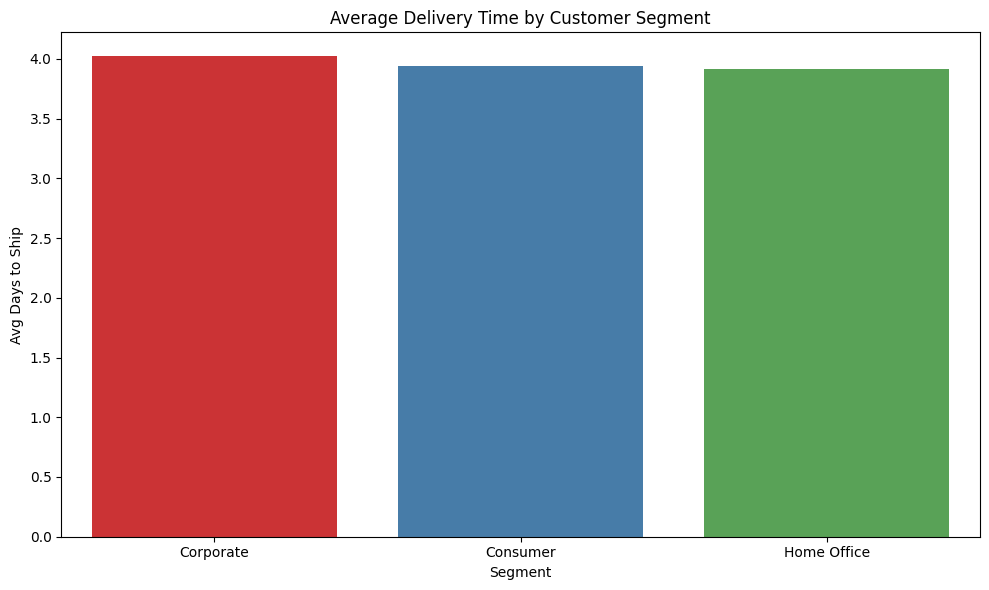


Orders per Segment:
Segment
Consumer       5101
Corporate      2953
Home Office    1746
Name: count, dtype: int64


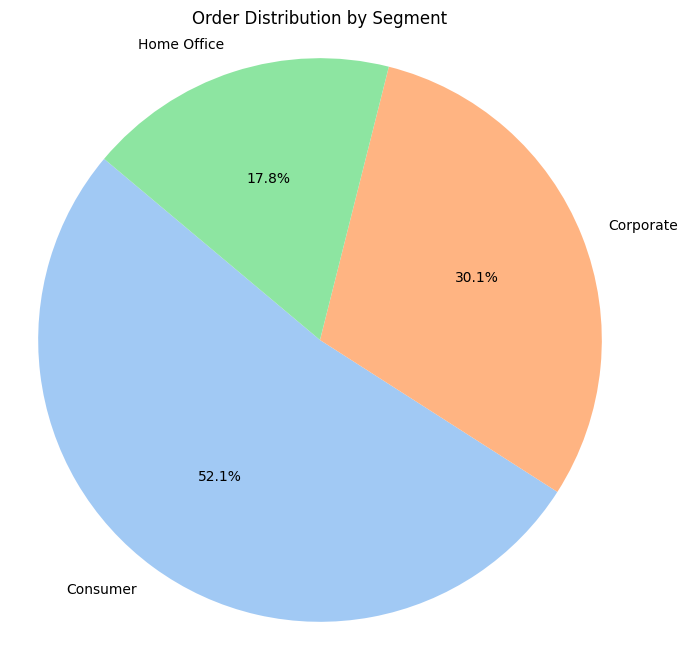

In [32]:
# Segment-wise average delivery time
segment_delivery = df.groupby('Segment')['Days to Ship'].mean().sort_values(ascending=False)
print("\nSegment-wise Average Delivery Time:")
print(segment_delivery)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=segment_delivery.index, y=segment_delivery.values, palette='Set1')
plt.title("Average Delivery Time by Customer Segment")
plt.ylabel("Avg Days to Ship")
plt.tight_layout()
plt.savefig('visuals/segment_delivery_time.png')
plt.show()

# Segment-wise order count
segment_orders = df['Segment'].value_counts()
print("\nOrders per Segment:")
print(segment_orders)

# Pie chart
plt.figure(figsize=(8,8))
plt.pie(segment_orders, labels=segment_orders.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Order Distribution by Segment")
plt.axis('equal')
plt.savefig('visuals/order_segment_pie.png')
plt.show()

Temporal Pattern Order


Orders by Day of Week:
Order Day
Tuesday      1889
Saturday     1786
Sunday       1695
Monday       1593
Wednesday    1229
Friday       1067
Thursday      541
Name: count, dtype: int64


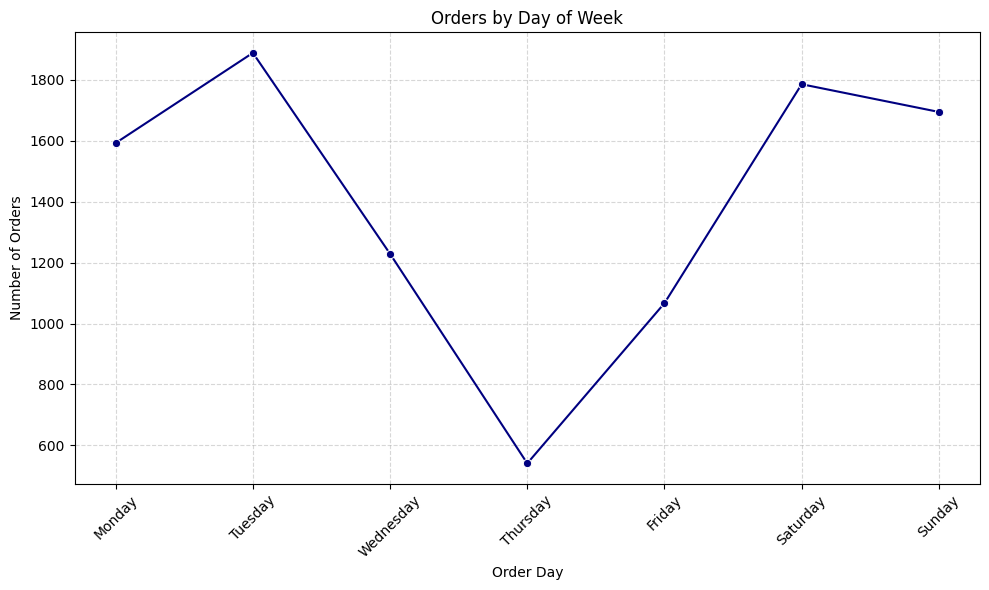

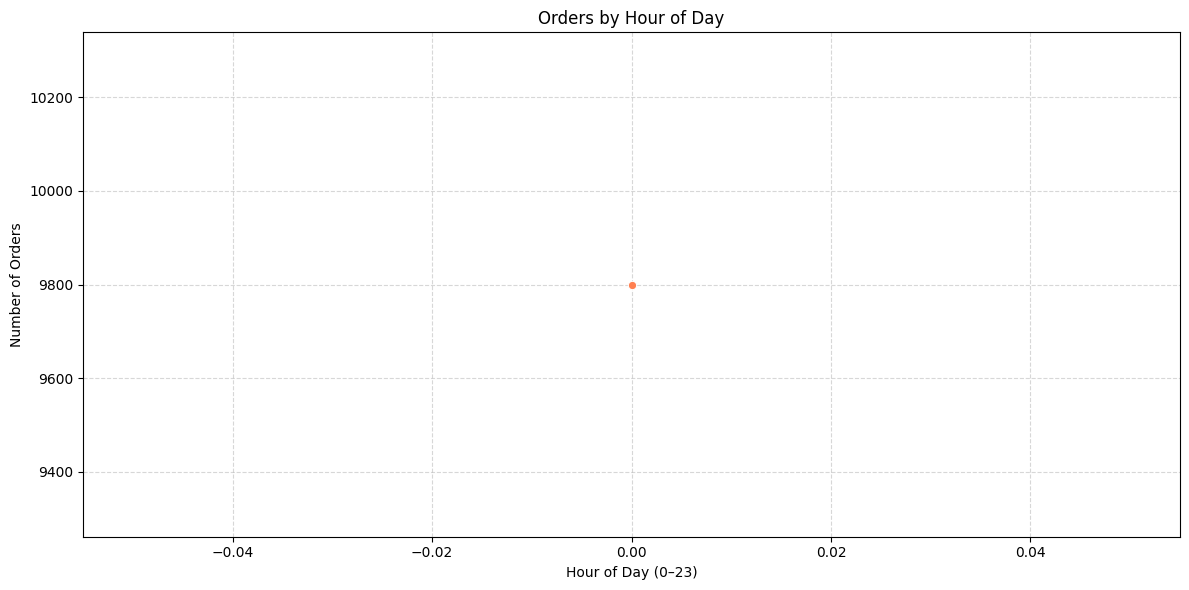

In [33]:
# Orders by day of week
df['Order Day'] = df['Order Date'].dt.day_name()
day_of_week_orders = df['Order Day'].value_counts()
print("\nOrders by Day of Week:")
print(day_of_week_orders)

# Reorder by weekday
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_orders = day_of_week_orders.reindex(ordered_days)

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(x=day_of_week_orders.index, y=day_of_week_orders.values, marker='o', color='navy')
plt.title("Orders by Day of Week")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('visuals/orders_by_day_of_week.png')
plt.show()

# Orders by hour of day 
try:
    df['Order Hour'] = df['Order Date'].dt.hour
    hourly_orders = df['Order Hour'].value_counts().sort_index()
    plt.figure(figsize=(12,6))
    sns.lineplot(x=hourly_orders.index, y=hourly_orders.values, marker='o', color='coral')
    plt.title("Orders by Hour of Day")
    plt.xlabel("Hour of Day (0–23)")
    plt.ylabel("Number of Orders")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig('visuals/orders_by_hour_of_day.png')
    plt.show()
except:
    print("No time component in Order Date.")

Correlation Analysis


Correlation Matrix:
                        Days to Ship  Segment_Corporate  Segment_Home Office  \
Days to Ship                1.000000           0.022602            -0.011755   
Segment_Corporate           0.022602           1.000000            -0.305772   
Segment_Home Office        -0.011755          -0.305772             1.000000   
Ship Mode_Same Day         -0.539533          -0.046975             0.018905   
Ship Mode_Second Class     -0.199688           0.008928            -0.019464   
...                              ...                ...                  ...   
City_Woonsocket            -0.011101           0.019760            -0.009409   
City_Yonkers                0.005346          -0.025713            -0.004587   
City_York                   0.005668           0.034403            -0.010520   
City_Yucaipa                0.017547           0.015383            -0.004704   
City_Yuma                  -0.022651           0.008750             0.016996   

                  

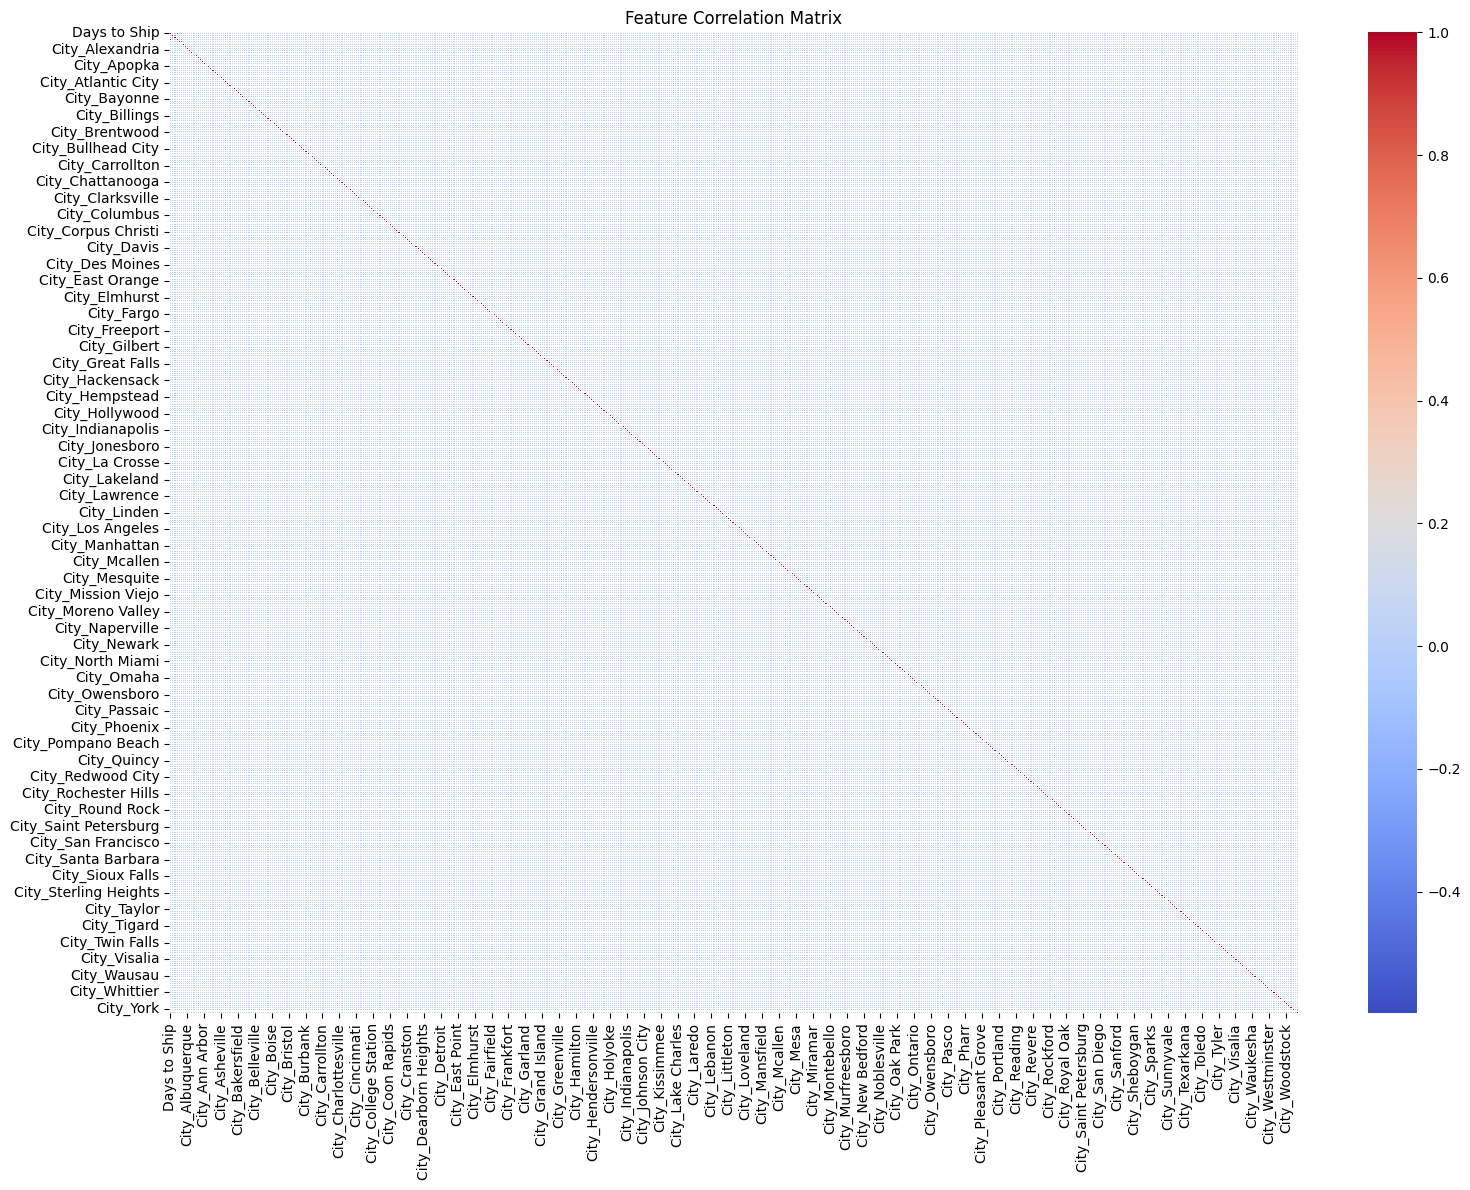

In [35]:
# Create dummy variables for categorical columns
df_encoded = pd.get_dummies(df[['Segment', 'Ship Mode', 'Country', 'City']], drop_first=True)

# Combine with numerical features
numerical_df = df[['Days to Ship']].join(df_encoded)

# Correlation matrix
corr_matrix = numerical_df.corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

# Heatmap
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5 , cbar=True)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.savefig('visuals/correlation_matrix.png')
plt.show()

Delivery Time by Country 

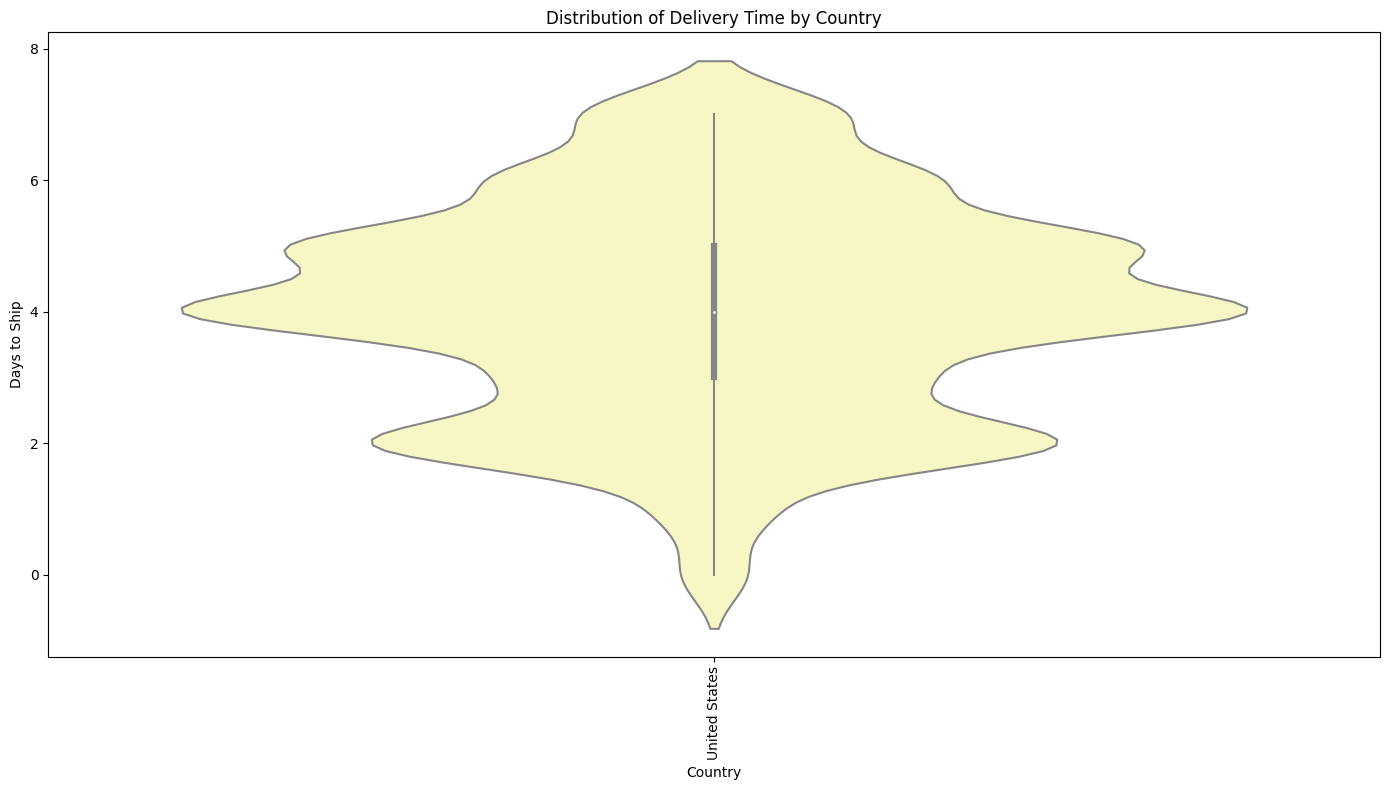

In [36]:
plt.figure(figsize=(14,8))
sns.violinplot(data=df.head(1000), x='Country', y='Days to Ship', palette='Spectral')
plt.title("Distribution of Delivery Time by Country")
plt.xticks(rotation=90)
plt.ylabel("Days to Ship")
plt.tight_layout()
plt.savefig('visuals/violin_delivery_time_country.png')
plt.show()

Cumulative Orders over time 

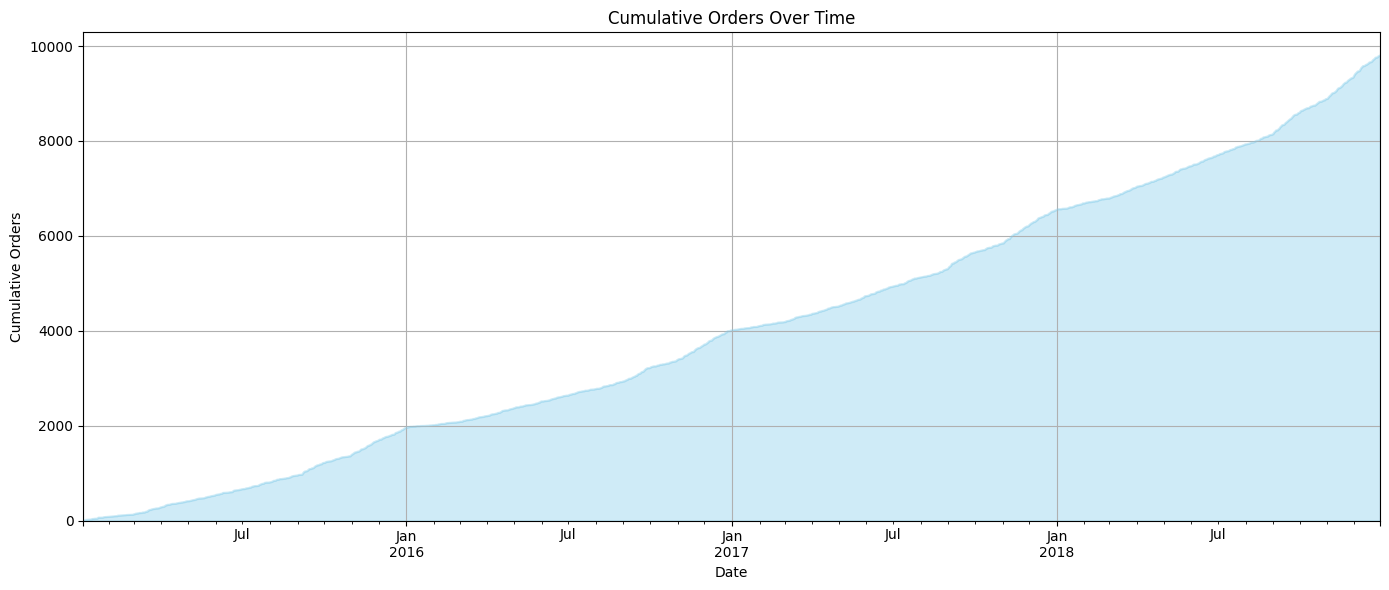

In [37]:
cumulative_orders = daily_orders.cumsum()
plt.figure(figsize=(14,6))
cumulative_orders.plot(kind='area', alpha=0.4, color='skyblue')
plt.title("Cumulative Orders Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Orders")
plt.grid(True)
plt.tight_layout()
plt.savefig('visuals/cumulative_orders_over_time.png')
plt.show()

Ship Mode Usage 

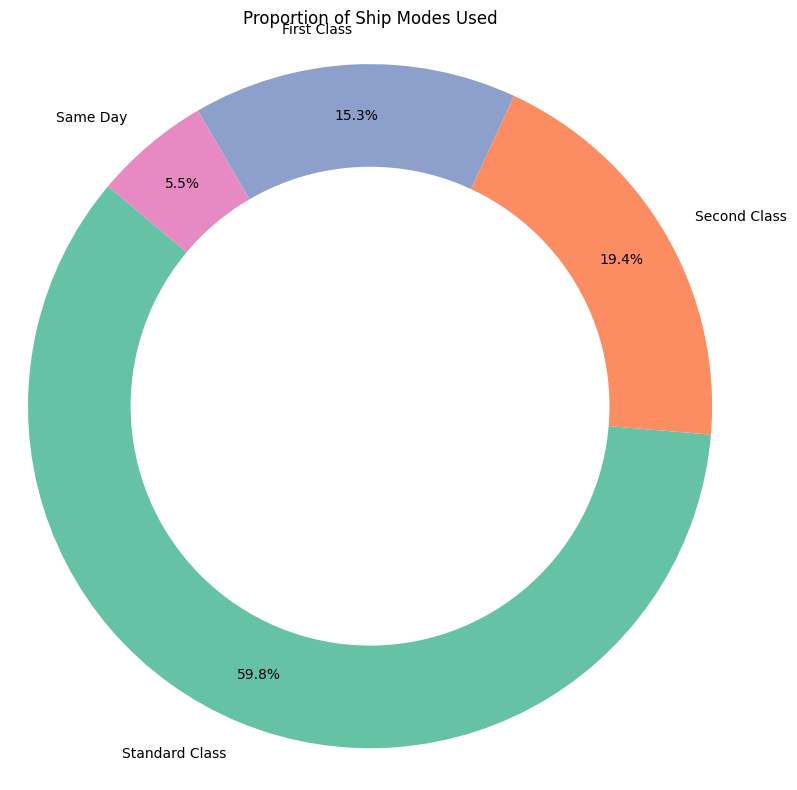

In [38]:
labels = ship_mode_counts.index
sizes = ship_mode_counts.values
colors = sns.color_palette('Set2')

plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Proportion of Ship Modes Used")
plt.axis('equal')
plt.tight_layout()
plt.savefig('visuals/ship_mode_donut_chart.png')
plt.show()

Anomaly Detection 

In [39]:
Q1 = df['Days to Ship'].quantile(0.25)
Q3 = df['Days to Ship'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Days to Ship'] < (Q1 - 1.5 * IQR)) | (df['Days to Ship'] > (Q3 + 1.5 * IQR))]
print("\nDelivery Time Outliers:")
print(outliers[['Order ID', 'Days to Ship']])


Delivery Time Outliers:
Empty DataFrame
Columns: [Order ID, Days to Ship]
Index: []


Simple Moving Average 

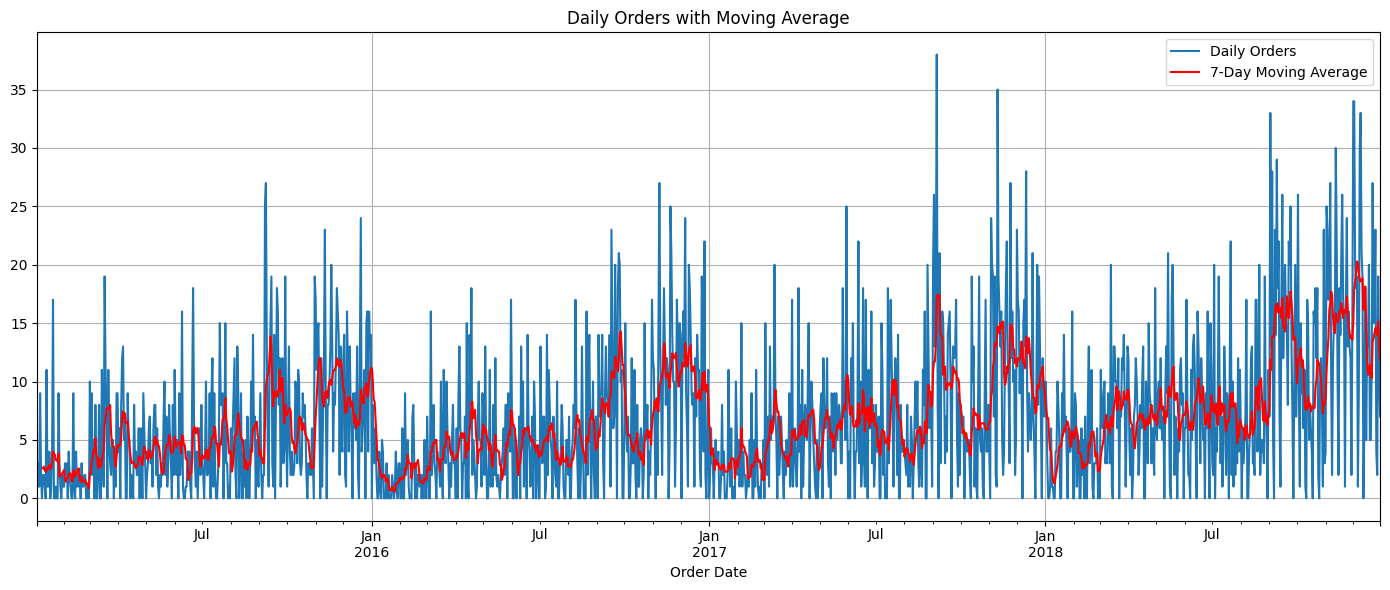

In [40]:
moving_avg = daily_orders.rolling(window=7).mean()
plt.figure(figsize=(14,6))
daily_orders.plot(label='Daily Orders')
moving_avg.plot(label='7-Day Moving Average', color='red')
plt.title("Daily Orders with Moving Average")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('visuals/daily_orders_moving_average.png')
plt.show()

Seasonlity Check 

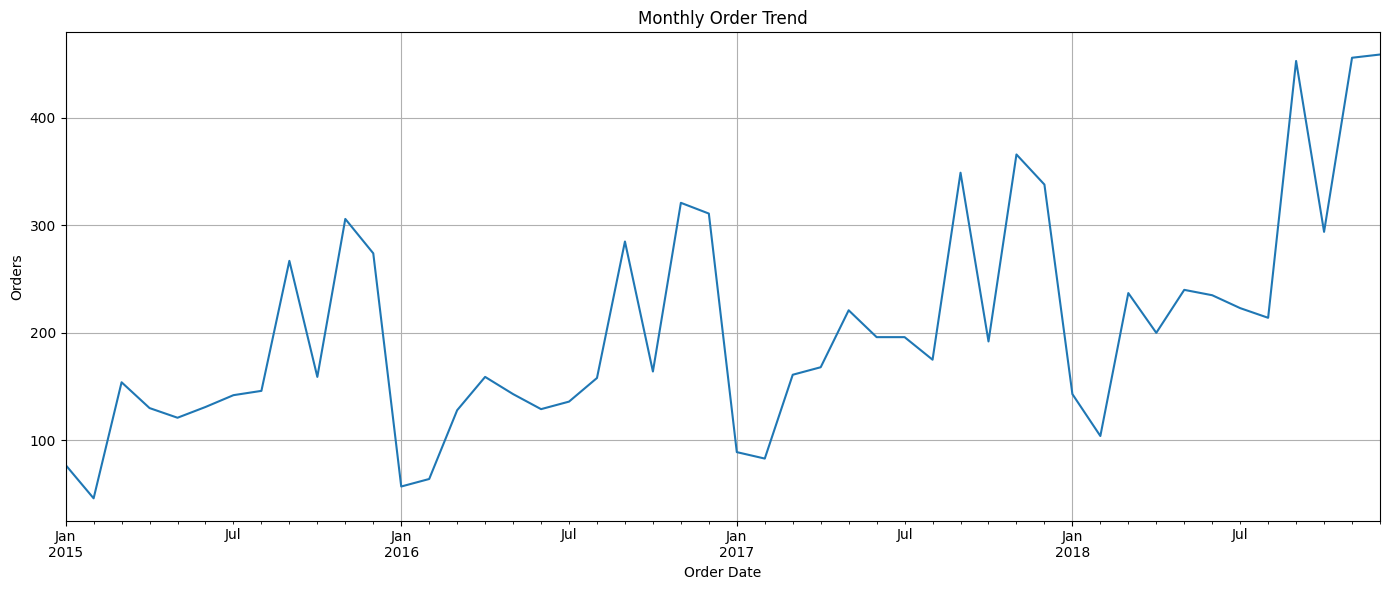

In [41]:
monthly_orders = df.resample('M', on='Order Date')['Order ID'].count()
monthly_orders.plot(figsize=(14,6))
plt.title("Monthly Order Trend")
plt.ylabel("Orders")
plt.grid(True)
plt.tight_layout()
plt.savefig('visuals/monthly_order_trend.png')
plt.show()

Customer Cohort Analysis 


Cohort Retention Matrix (%):
cohort_index     0       1       2      3       4      5       6      7   \
cohort_month                                                               
2015-01       100.0    6.67    0.00   6.67    6.67   0.00    6.67  10.00   
2015-02       100.0   16.00    8.00   4.00    0.00   8.00    8.00  16.00   
2015-03       100.0    6.35    3.17  12.70   11.11   0.00   11.11   7.94   
2015-04       100.0   11.32    1.89   5.66    3.77  15.09    9.43  16.98   
2015-05       100.0    9.09    9.09   7.27   18.18   3.64   20.00  18.18   
2015-06       100.0    4.26    2.13   8.51    4.26  19.15   17.02   2.13   
2015-07       100.0   13.95   11.63   0.00   11.63  18.60    4.65   0.00   
2015-08       100.0   16.00    6.00  22.00   10.00   6.00    8.00   4.00   
2015-09       100.0   13.24   11.76  16.18    1.47   2.94   11.76  14.71   
2015-10       100.0    6.98   11.63   2.33    6.98   9.30   11.63   9.30   
2015-11       100.0   22.22    0.00   4.76    7.94   6.35 

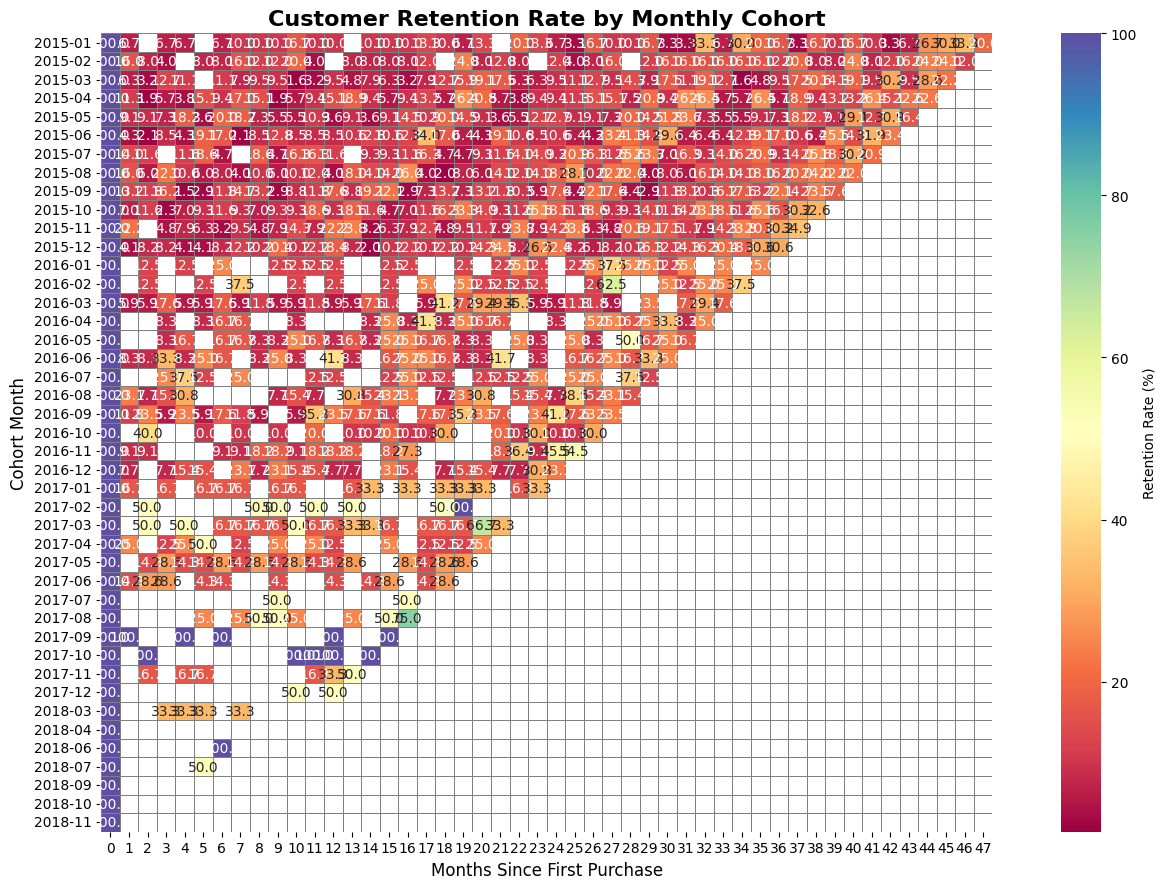

In [43]:
# Ensure visuals directory exists
os.makedirs("visuals", exist_ok=True)

#  Extract cohort month 
df['cohort_month'] = df.groupby('Customer ID')['Order Date'].transform('min').dt.to_period('M')

#  Extract transaction month
df['order_month'] = df['Order Date'].dt.to_period('M')

#  Compute cohort index (0 = first month, 1 = second month)
df['cohort_index'] = (df['order_month'] - df['cohort_month']).apply(lambda x: x.n)

#  Pivot table- Cohort Size by Index
cohort_data = df.groupby(['cohort_month', 'cohort_index'])['Customer ID'].nunique().unstack(level=1)

#  Retention matrix calculation
cohort_size = cohort_data.iloc[:, 0]
retention_matrix = cohort_data.divide(cohort_size, axis=0).round(4) * 100

# Print retention matrix 
print("\n Cohort Retention Matrix (%):")
print(retention_matrix.fillna(0).round(2))

plt.figure(figsize=(14, 9))
sns.heatmap(
    retention_matrix,
    annot=True,
    fmt=".1f",
    cmap="Spectral",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={"label": "Retention Rate (%)"},
    square=True
)
plt.title("Customer Retention Rate by Monthly Cohort", fontsize=16, fontweight='bold')
plt.xlabel("Months Since First Purchase", fontsize=12)
plt.ylabel("Cohort Month", fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("visuals/cohort_retention_heatmap.png")
plt.show()

RFM segmentation 


Top 10 High Value Customers (RF Score):
    Customer ID Order Date  Recency  Frequency R_Score F_Score RF_Score
13     AC-10615 2018-12-24        7         18       5       5       55
35     AI-10855 2018-12-17       14         18       5       5       55
82     BF-11170 2018-12-14       17         27       5       5       55
88     BH-11710 2018-12-07       24         24       5       5       55
99     BP-11095 2018-12-13       18         20       5       5       55
101    BP-11185 2018-12-29        2         18       5       5       55
115    BT-11680 2018-12-10       21         20       5       5       55
130    CC-12220 2018-12-10       21         21       5       5       55
132    CC-12430 2018-12-30        1         19       5       5       55
172    CS-11950 2018-12-05       26         22       5       5       55


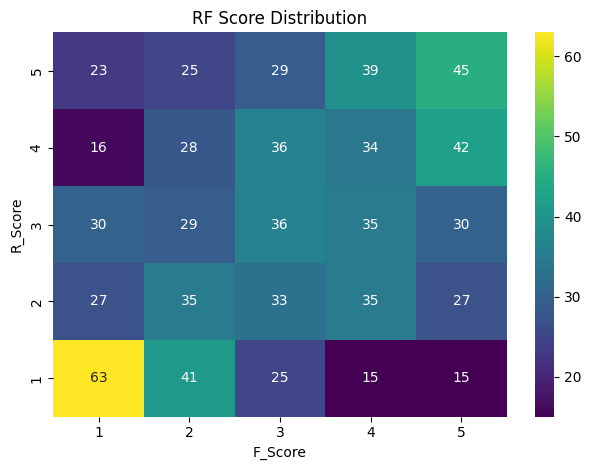

In [44]:
# Recency
recency = df.groupby('Customer ID')['Order Date'].max().reset_index()
reference_date = df['Order Date'].max() + pd.Timedelta(days=1)
recency['Recency'] = (reference_date - recency['Order Date']).dt.days

# Frequency
frequency = df.groupby('Customer ID')['Order ID'].count().reset_index()
frequency.columns = ['Customer ID', 'Frequency']

# Merge
rf = pd.merge(recency, frequency, on='Customer ID')

# Score R and F
rf['R_Score'] = pd.qcut(rf['Recency'], q=5, labels=[5,4,3,2,1])
rf['F_Score'] = pd.qcut(rf['Frequency'].rank(method='first'), q=5, labels=[1,2,3,4,5])

# RF Score
rf['RF_Score'] = rf['R_Score'].astype(str) + rf['F_Score'].astype(str)

print("\nTop 10 High Value Customers (RF Score):")
print(rf.sort_values(by=['R_Score','F_Score'], ascending=[True, False]).head(10))

# Count distribution
rf_counts = rf.groupby(['R_Score', 'F_Score']).size().unstack(fill_value=0)
sns.heatmap(rf_counts, annot=True, fmt=".0f", cmap="viridis")
plt.title("RF Score Distribution")
plt.tight_layout()
plt.savefig('visuals/rf_score_distribution.png')
plt.show()

Ship Mode by Segment

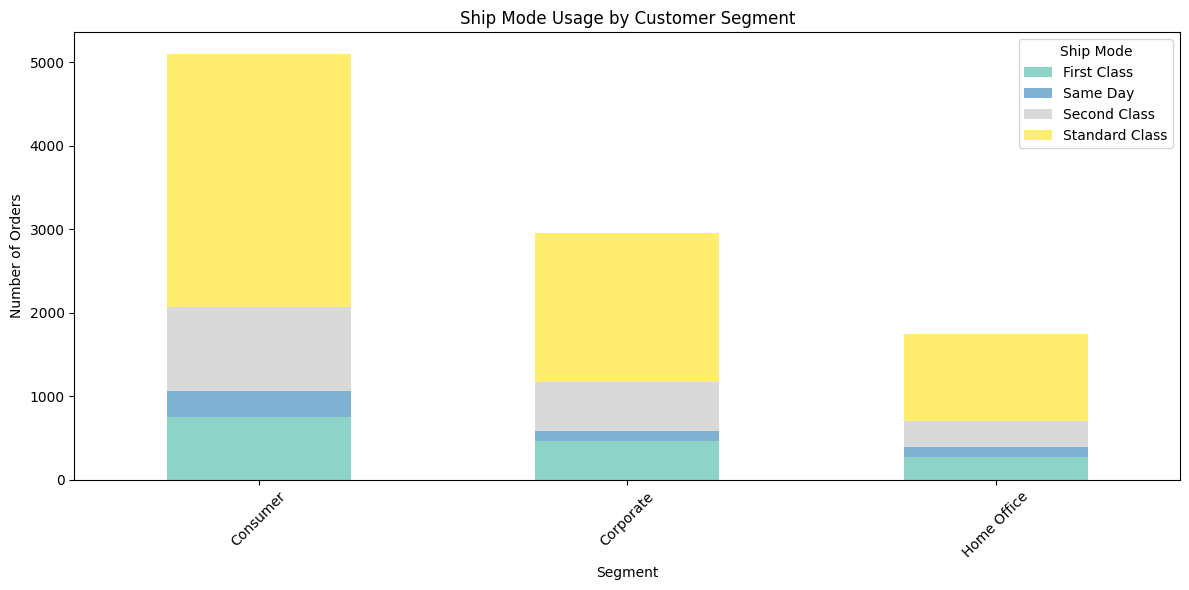

In [45]:
ship_mode_by_segment = df.groupby(['Segment', 'Ship Mode']).size().unstack()
ship_mode_by_segment.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set3')
plt.title("Ship Mode Usage by Customer Segment")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.legend(title='Ship Mode')
plt.tight_layout()
plt.savefig('visuals/ship_mode_by_segment.png')
plt.show()

City Level Delivery Trends


Cities with Longest Average Delivery Times:
City
Conway            7.000000
Waukesha          7.000000
Yucaipa           7.000000
Oswego            7.000000
Norfolk           7.000000
Citrus Heights    7.000000
Danbury           7.000000
Olathe            6.600000
Hot Springs       6.500000
Urbandale         6.333333
Name: Days to Ship, dtype: float64


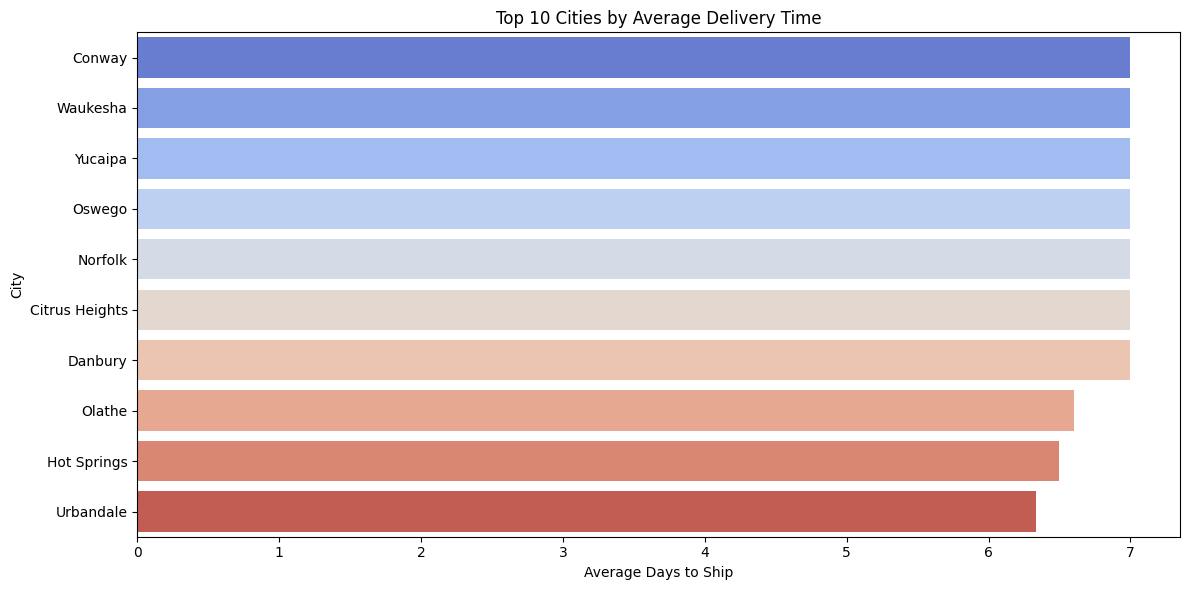

In [46]:
top_cities_avg_days = df.groupby('City')['Days to Ship'].mean().sort_values(ascending=False).head(10)
print("\nCities with Longest Average Delivery Times:")
print(top_cities_avg_days)
plt.figure(figsize=(12,6))
sns.barplot(x=top_cities_avg_days.values, y=top_cities_avg_days.index, palette='coolwarm')
plt.title("Top 10 Cities by Average Delivery Time")
plt.xlabel("Average Days to Ship")
plt.ylabel("City")
plt.tight_layout()
plt.savefig('visuals/top_cities_avg_delivery_time.png')
plt.show()

Time Series Decomposition 

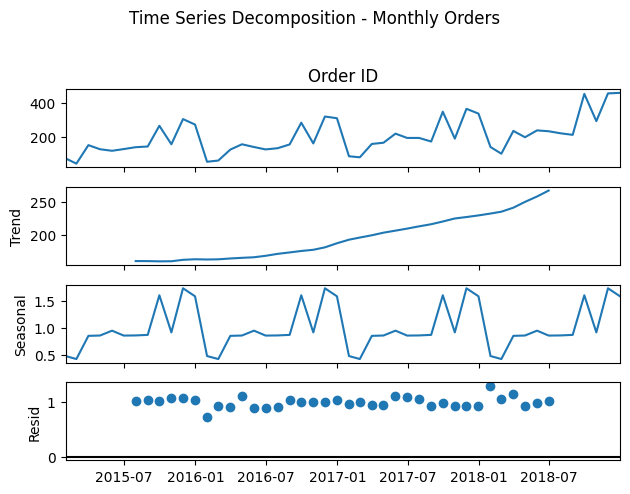

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Resampling daily orders to monthly
monthly_orders_ts = df.resample('M', on='Order Date')['Order ID'].count()

# Decomposition 
result = seasonal_decompose(monthly_orders_ts, model='multiplicative', period=12)
result.plot()
plt.suptitle("Time Series Decomposition - Monthly Orders", y=1.02)
plt.tight_layout()
plt.savefig('visuals/time_series_decomposition.png')
plt.show()

Distribution Comparisons 

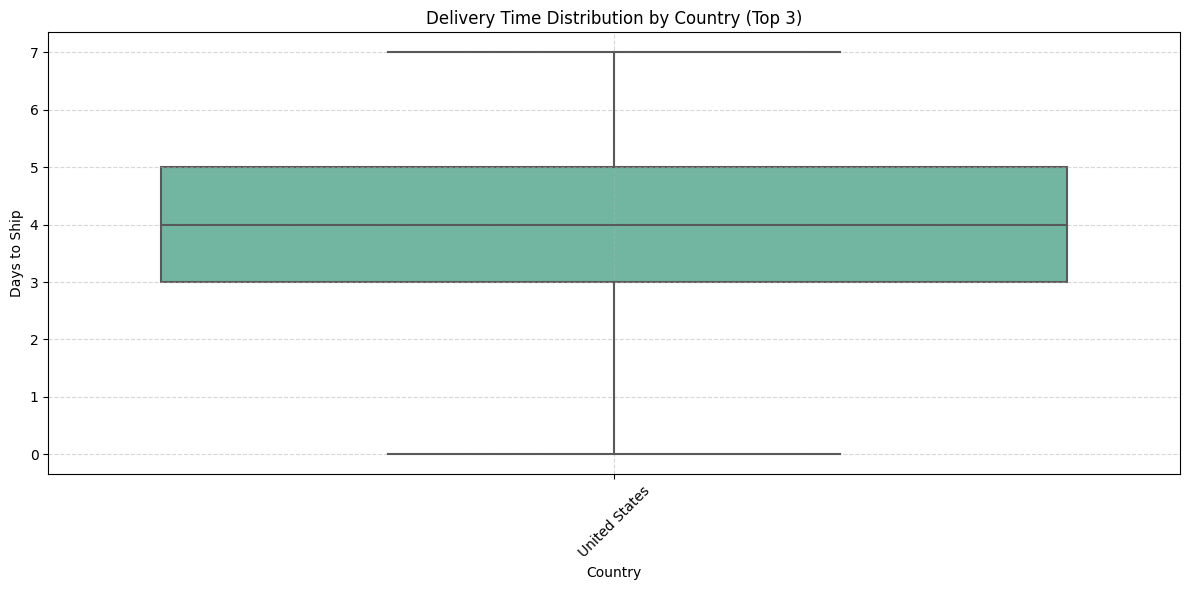

In [48]:
top_3_countries = df[df['Country'].isin(country_orders.head(3).index)]
plt.figure(figsize=(12,6))
sns.boxplot(data=top_3_countries, x='Country', y='Days to Ship', palette='Set2')
plt.title("Delivery Time Distribution by Country (Top 3)")
plt.ylabel("Days to Ship")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('visuals/delivery_distribution_top_countries.png')
plt.show()

Outliers Detection (Fastest & Slowest Deliveries)

In [51]:
fastest_shipments = df.sort_values(by='Days to Ship').head(10)
slowest_shipments = df.sort_values(by='Days to Ship', ascending=False).head(10)

print("\nFastest Deliveries:")
print(fastest_shipments[['Order ID', 'Days to Ship', 'Ship Mode', 'Customer Name']])

print("\nSlowest Deliveries:")
print(slowest_shipments[['Order ID', 'Days to Ship', 'Ship Mode', 'Customer Name']])


Fastest Deliveries:
            Order ID  Days to Ship Ship Mode       Customer Name
1355  US-2015-160444             0  Same Day        Dan Campbell
6030  US-2018-152492             0  Same Day         Angele Hood
8904  US-2017-126431             0  Same Day  Stephanie Ulpright
8905  US-2017-126431             0  Same Day  Stephanie Ulpright
8906  US-2017-126431             0  Same Day  Stephanie Ulpright
5149  CA-2015-141796             0  Same Day        James Galang
5130  CA-2015-160766             0  Same Day       Darrin Martin
5129  CA-2015-160766             0  Same Day       Darrin Martin
5128  CA-2015-160766             0  Same Day       Darrin Martin
7770  CA-2017-155978             0  Same Day         Thomas Seio

Slowest Deliveries:
            Order ID  Days to Ship       Ship Mode  Customer Name
6444  CA-2017-101161             7  Standard Class   Bart Watters
460   CA-2016-109638             7  Standard Class    Joseph Holt
5653  US-2015-134187             7  Standard 

Cross Tabulation  segment vs ship 


Cross-tab: Segment vs Ship Mode
Ship Mode    First Class  Same Day  Second Class  Standard Class
Segment                                                         
Consumer             755       312          1003            3031
Corporate            468       114           589            1782
Home Office          278       112           310            1046


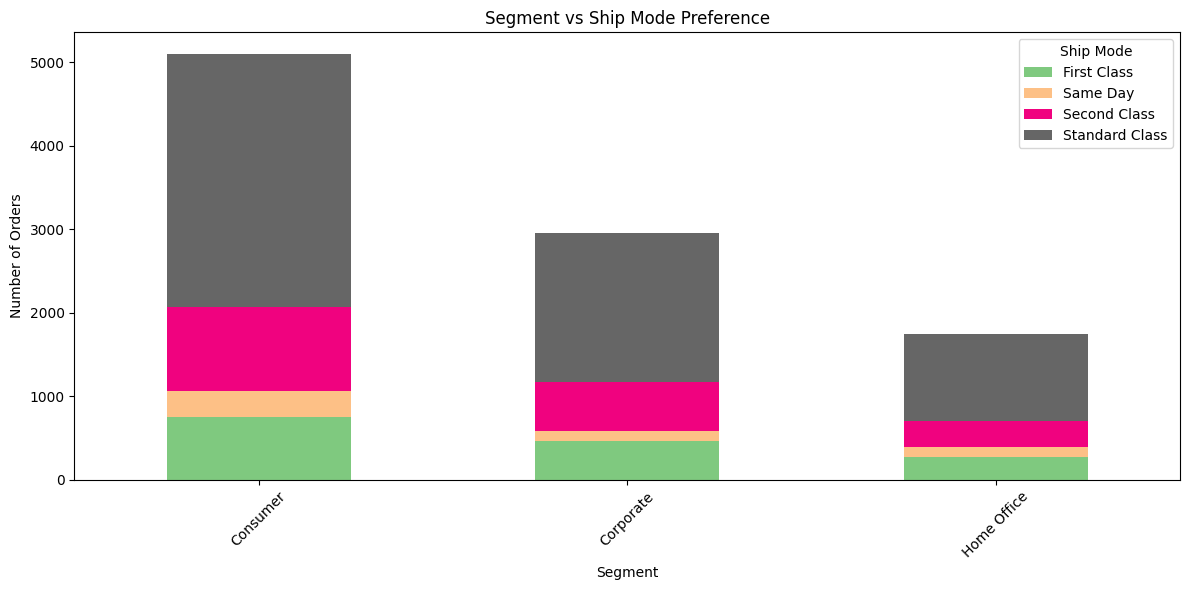

In [52]:
crosstab = pd.crosstab(df['Segment'], df['Ship Mode'])
print("\nCross-tab: Segment vs Ship Mode")
print(crosstab)

# Stacked bar chart
crosstab.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Accent')
plt.title("Segment vs Ship Mode Preference")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.legend(title='Ship Mode')
plt.tight_layout()
plt.savefig('visuals/segment_vs_shipmode_stacked.png')
plt.show()

 Churn Analysis

In [53]:
recent_customers = df[df['Order Date'] > (df['Order Date'].max() - pd.Timedelta(days=90))]['Customer ID'].unique()

total_customers = df['Customer ID'].nunique()
active_customers = len(recent_customers)
churn_rate = round((total_customers - active_customers) / total_customers * 100, 2)

print(f"\nTotal Customers: {total_customers}")
print(f"Active Customers (last 90 days): {active_customers}")
print(f"Churn Rate: {churn_rate}%")


Total Customers: 793
Active Customers (last 90 days): 432
Churn Rate: 45.52%


 Pair Plot – Delivery Time vs Order Volume

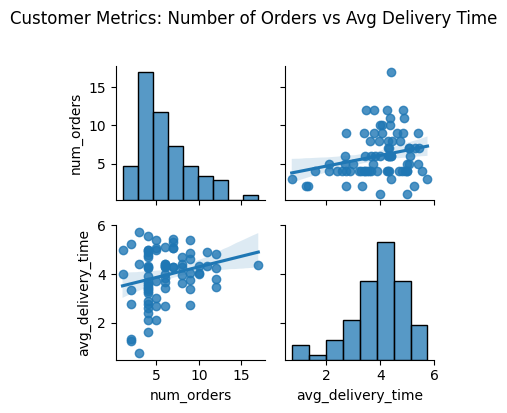

In [55]:
customer_metrics = df.groupby('Customer ID').agg(
    num_orders=('Order ID', 'nunique'),
    avg_delivery_time=('Days to Ship', 'mean')
).reset_index()

customer_metrics.dropna(inplace=True)

sample = customer_metrics.sample(frac=0.1, random_state=42)

sns.pairplot(data=sample, kind='reg', diag_kind='hist', height=2)
plt.suptitle("Customer Metrics: Number of Orders vs Avg Delivery Time", y=1.02)
plt.tight_layout()
plt.savefig('visuals/customer_pairplot_orders_vs_delivery.png')
plt.show()

Top Customers by Number of Orders


Top 10 Customers by Number of Orders:
Customer ID  Customer Name      
WB-21850     William Brown          35
PP-18955     Paul Prost             34
MA-17560     Matt Abelman           34
JL-15835     John Lee               33
CK-12205     Chloris Kastensmidt    32
SV-20365     Seth Vernon            32
JD-15895     Jonathan Doherty       32
AP-10915     Arthur Prichep         31
ZC-21910     Zuschuss Carroll       31
EP-13915     Emily Phan             31
Name: Order ID, dtype: int64


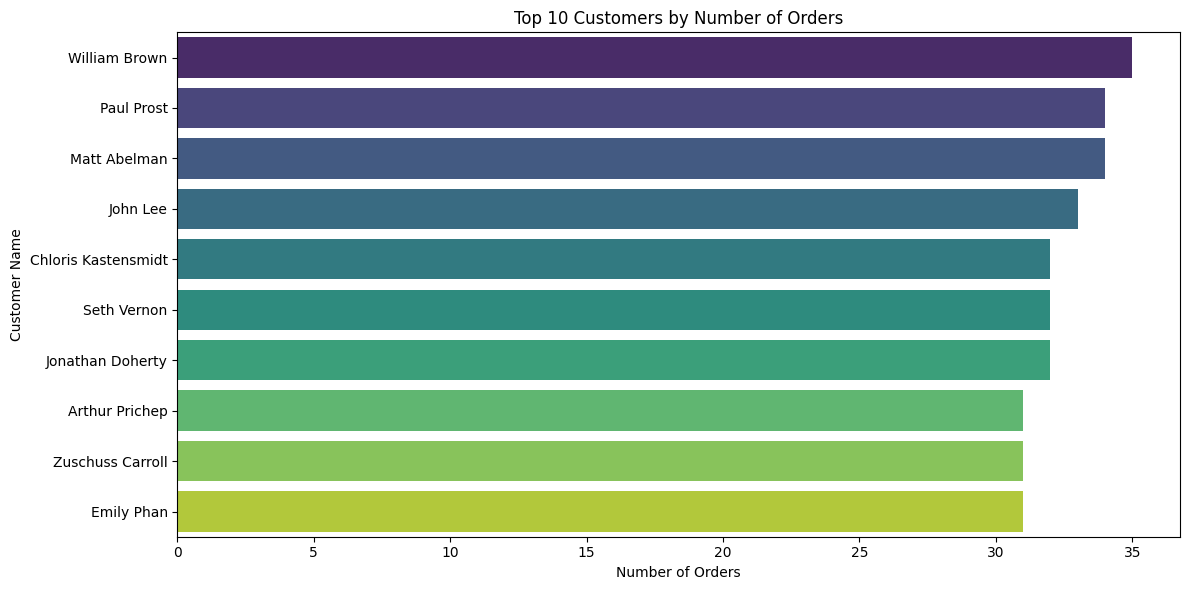

In [56]:
top_customers = df.groupby(['Customer ID', 'Customer Name'])['Order ID'].count().sort_values(ascending=False).head(10)

print("\nTop 10 Customers by Number of Orders:")
print(top_customers)

plt.figure(figsize=(12,6))
sns.barplot(x=top_customers.values, y=top_customers.index.get_level_values('Customer Name'), palette='viridis')
plt.title("Top 10 Customers by Number of Orders")
plt.xlabel("Number of Orders")
plt.ylabel("Customer Name")
plt.tight_layout()
plt.savefig('visuals/top_customers_by_orders.png')
plt.show()

Orders per Country 

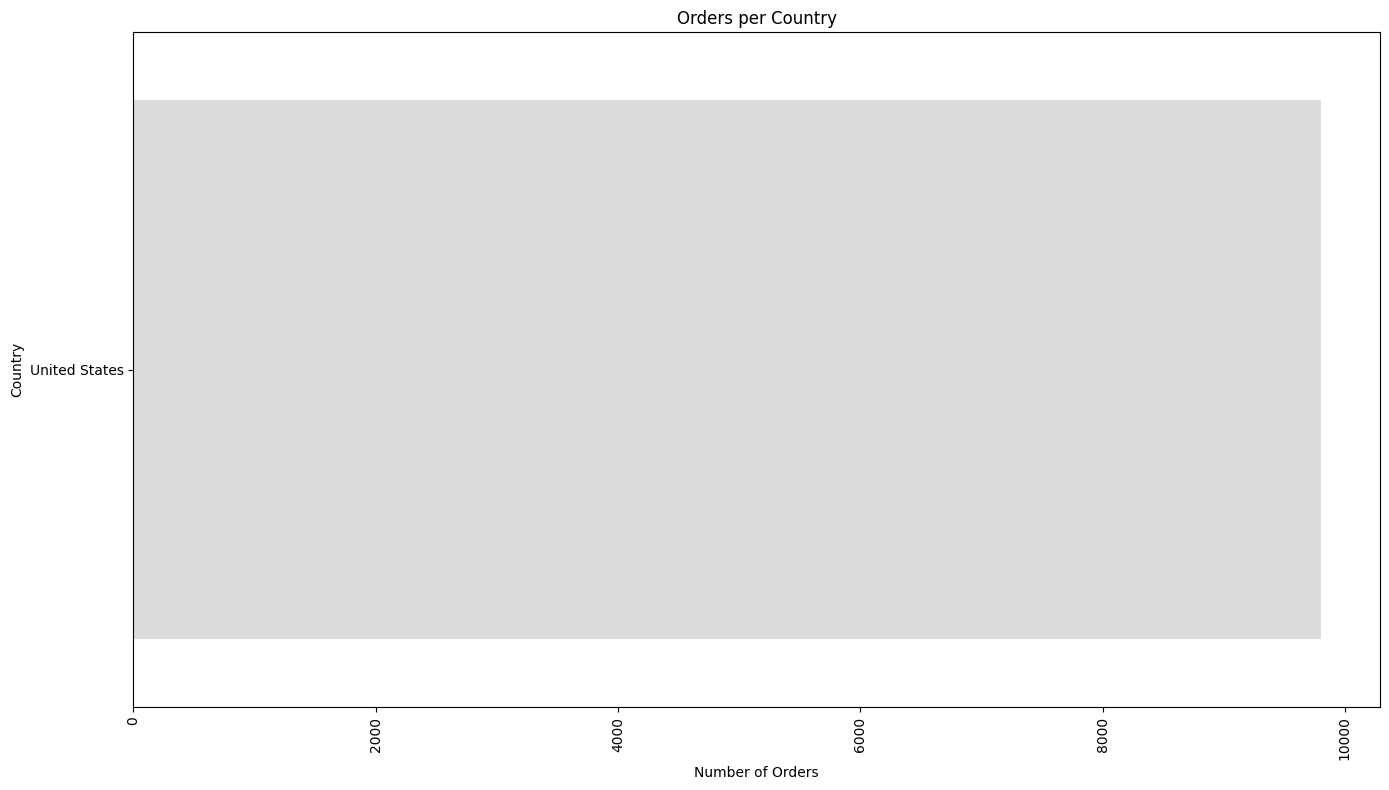

In [57]:
country_counts = df['Country'].value_counts()
plt.figure(figsize=(14,8))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='coolwarm')
plt.title("Orders per Country")
plt.xlabel("Number of Orders")
plt.ylabel("Country")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('visuals/orders_per_country_bar.png')
plt.show()

Top Cities by Number of Orders

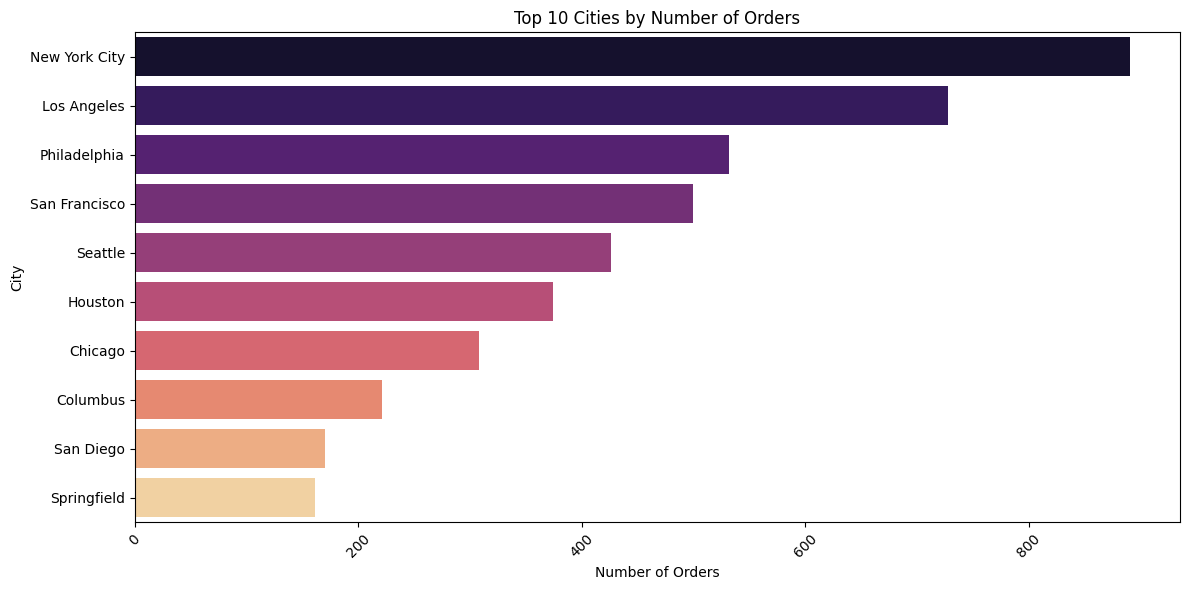

In [58]:
city_counts = df['City'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=city_counts.values, y=city_counts.index, palette='magma')
plt.title("Top 10 Cities by Number of Orders")
plt.xlabel("Number of Orders")
plt.ylabel("City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('visuals/top_cities_by_orders.png')
plt.show()

 Ship Mode Distribution Across Segments

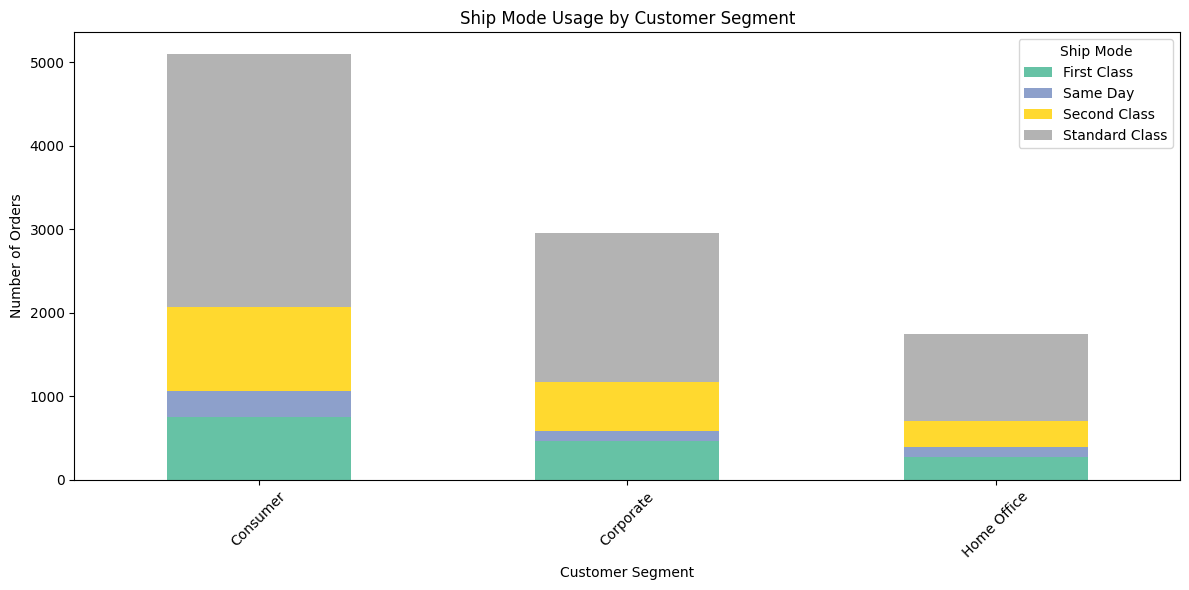

In [59]:
ship_mode_segment = pd.crosstab(df['Segment'], df['Ship Mode'])
ship_mode_segment.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')
plt.title("Ship Mode Usage by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Number of Orders")
plt.legend(title="Ship Mode")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('visuals/ship_mode_by_segment_stacked.png')
plt.show()

 Average Delivery Time by Month

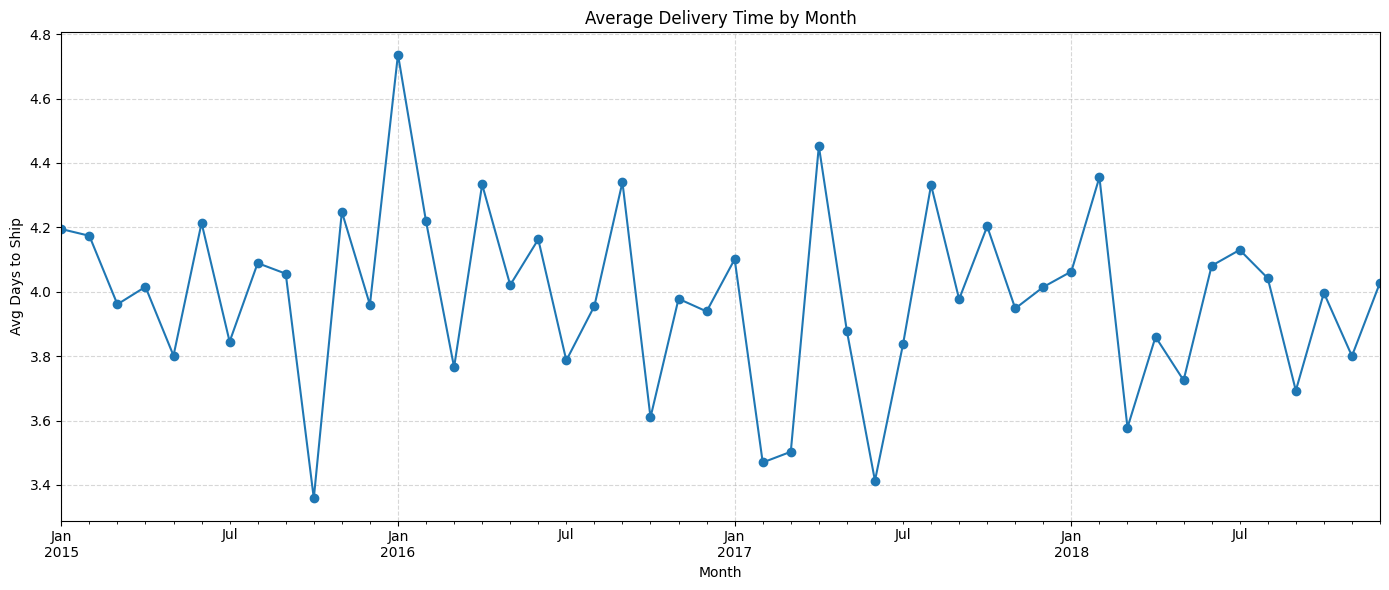

In [60]:
df['Order Month'] = df['Order Date'].dt.to_period('M')
avg_delivery_time = df.groupby('Order Month')['Days to Ship'].mean()
plt.figure(figsize=(14,6))
avg_delivery_time.plot(marker='o')
plt.title("Average Delivery Time by Month")
plt.xlabel("Month")
plt.ylabel("Avg Days to Ship")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('visuals/avg_delivery_time_by_month.png')
plt.show()

 Monthly Order Count Over Time

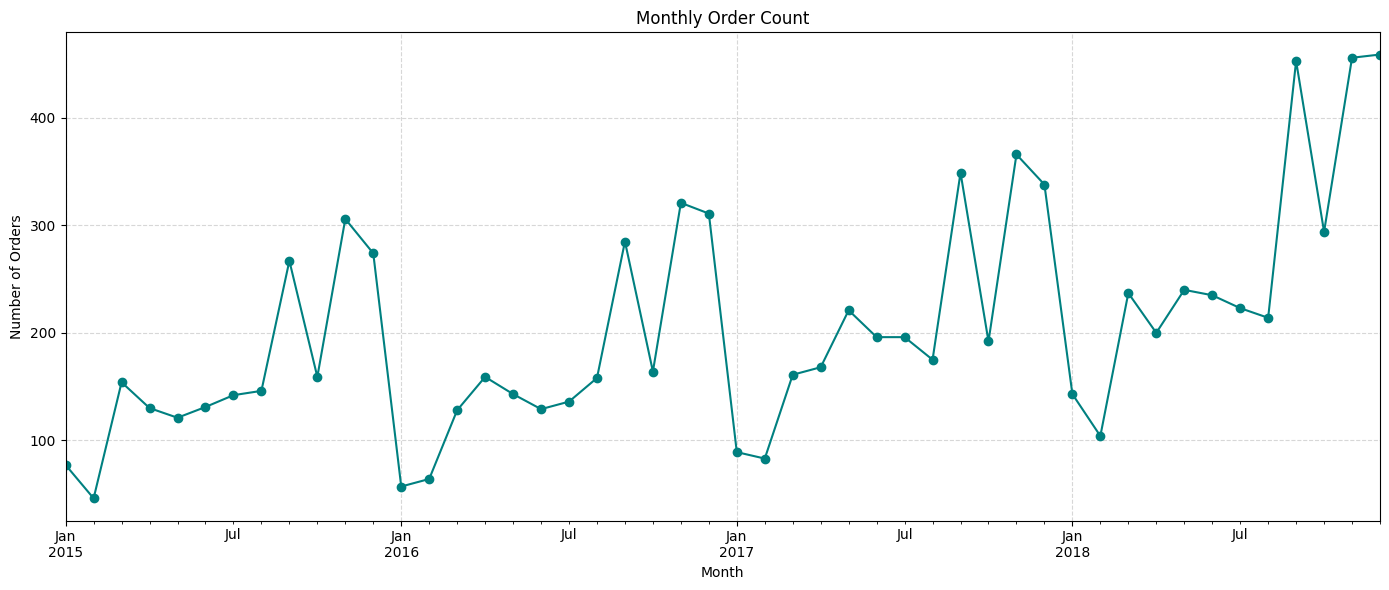

In [61]:
monthly_orders = df.resample('M', on='Order Date')['Order ID'].count()
plt.figure(figsize=(14,6))
monthly_orders.plot(marker='o', color='teal')
plt.title("Monthly Order Count")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('visuals/monthly_order_count_trend.png')
plt.show()

 Orders by Weekday

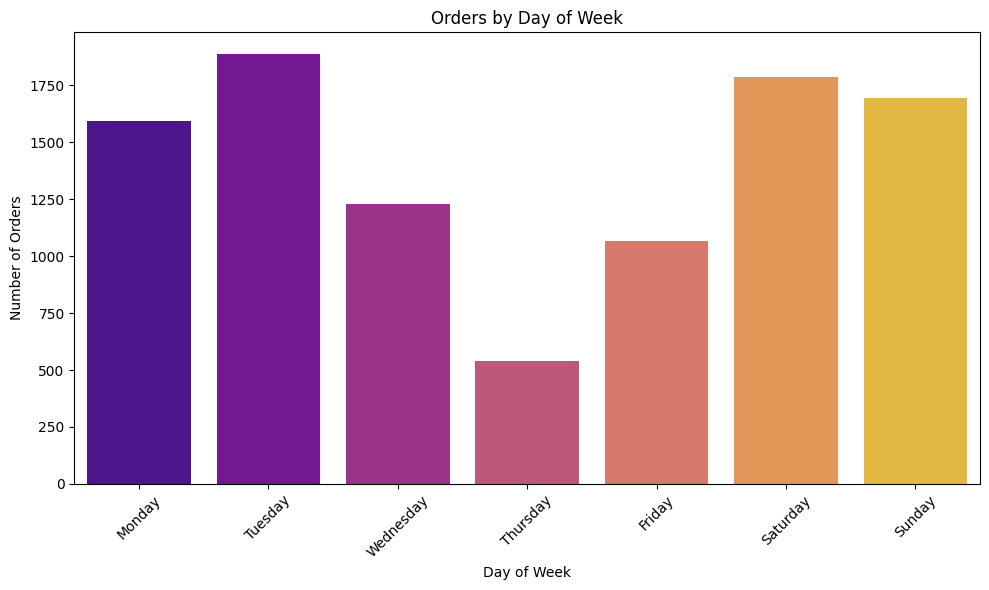

In [62]:
df['Order Day'] = df['Order Date'].dt.day_name()

order_by_weekday = df['Order Day'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
plt.figure(figsize=(10,6))
sns.barplot(x=order_by_weekday.index, y=order_by_weekday.values, palette='plasma')
plt.title("Orders by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('visuals/orders_by_weekday.png')
plt.show()

Top 10 Most Frequent Customer-Segment Combinations


Top 10 Customer-Segment Combinations:
           Customer Name      Segment  Count
787        William Brown     Consumer     35
606           Paul Prost  Home Office     34
482         Matt Abelman  Home Office     34
387             John Lee     Consumer     33
147  Chloris Kastensmidt     Consumer     32
720          Seth Vernon     Consumer     32
349     Jonathan Doherty    Corporate     32
44        Arthur Prichep     Consumer     31
791     Zuschuss Carroll     Consumer     31
275           Emily Phan     Consumer     31


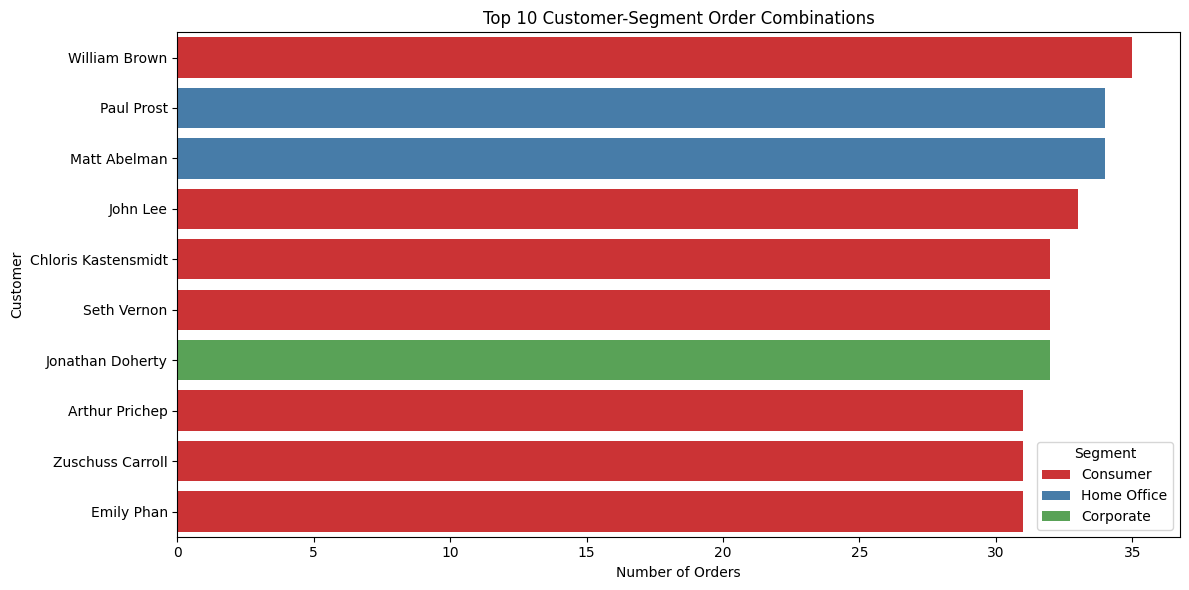

In [63]:
customer_segment = df.groupby(['Customer ID', 'Customer Name', 'Segment']).size().reset_index(name='Count')
top_combinations = customer_segment.sort_values(by='Count', ascending=False).head(10)

print("\nTop 10 Customer-Segment Combinations:")
print(top_combinations[['Customer Name', 'Segment', 'Count']])

plt.figure(figsize=(12,6))
sns.barplot(data=top_combinations, x='Count', y='Customer Name', hue='Segment', dodge=False, palette='Set1')
plt.title("Top 10 Customer-Segment Order Combinations")
plt.xlabel("Number of Orders")
plt.ylabel("Customer")
plt.legend(title="Segment")
plt.tight_layout()
plt.savefig('visuals/customer_segment_combinations.png')
plt.show()

 Country vs Average Delivery Time

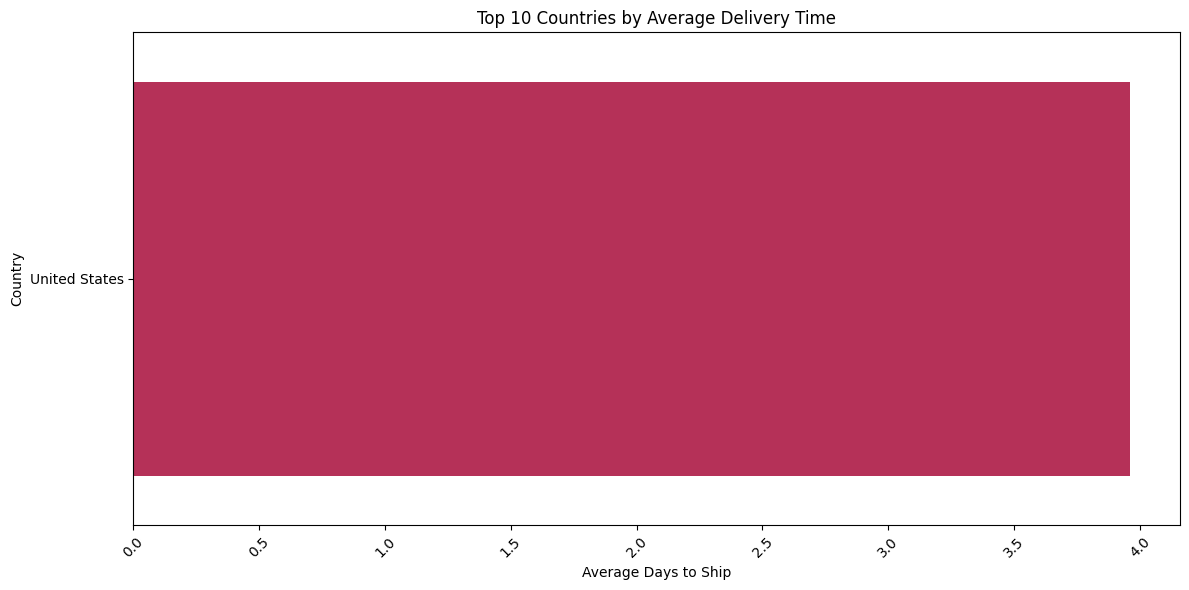

In [64]:
country_avg_days = df.groupby('Country')['Days to Ship'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=country_avg_days.values, y=country_avg_days.index, palette='rocket')
plt.title("Top 10 Countries by Average Delivery Time")
plt.xlabel("Average Days to Ship")
plt.ylabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('visuals/countries_avg_delivery_time.png')
plt.show()

 Top 10 Fastest Deliveries by Ship Mode


Fastest Delivery per Ship Mode:
           Ship Mode  Days to Ship           Customer Name        Order ID
1355        Same Day             0            Dan Campbell  US-2015-160444
2384     First Class             1  Christina VanderZanden  US-2018-117534
3453    Second Class             1                Shui Tom  CA-2016-153325
7847  Standard Class             3               Don Weiss  CA-2017-128706


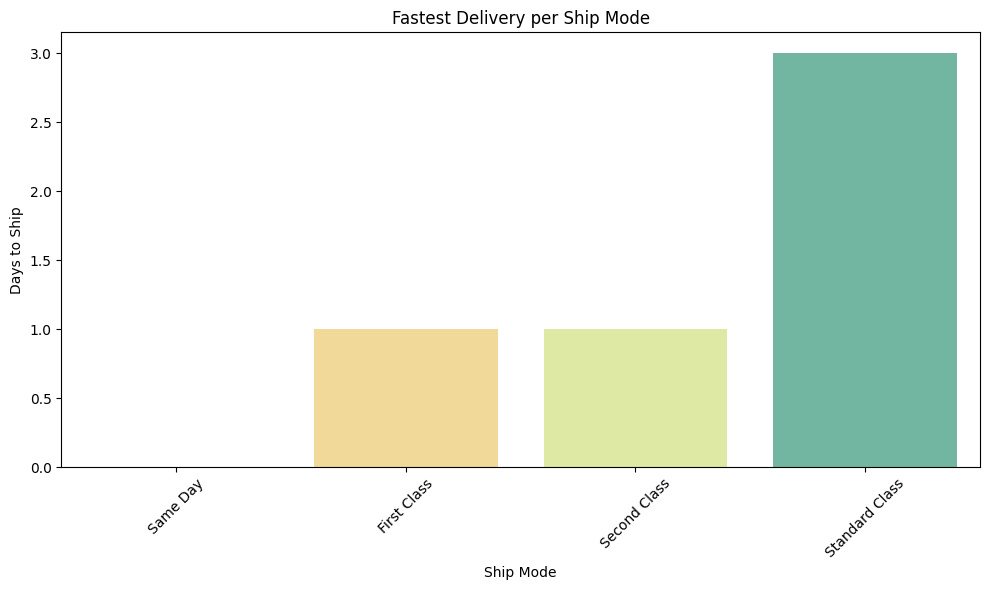

In [65]:
fastest_deliveries = df.sort_values(by='Days to Ship').groupby('Ship Mode').head(1)

print("\nFastest Delivery per Ship Mode:")
print(fastest_deliveries[['Ship Mode', 'Days to Ship', 'Customer Name', 'Order ID']])
plt.figure(figsize=(10,6))
sns.barplot(data=fastest_deliveries, x='Ship Mode', y='Days to Ship', palette='Spectral')
plt.title("Fastest Delivery per Ship Mode")
plt.ylabel("Days to Ship")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('visuals/fastest_delivery_per_shipmode.png')
plt.show()

Top Customers by Unique Cities


Top Customers by Number of Unique Cities:
Customer ID
EP-13915    15
JE-15745    13
AH-10690    12
NS-18640    11
CK-12205    11
GA-14725    11
SE-20110    11
KB-16585    11
PO-18850    11
LA-16780    11
Name: City, dtype: int64


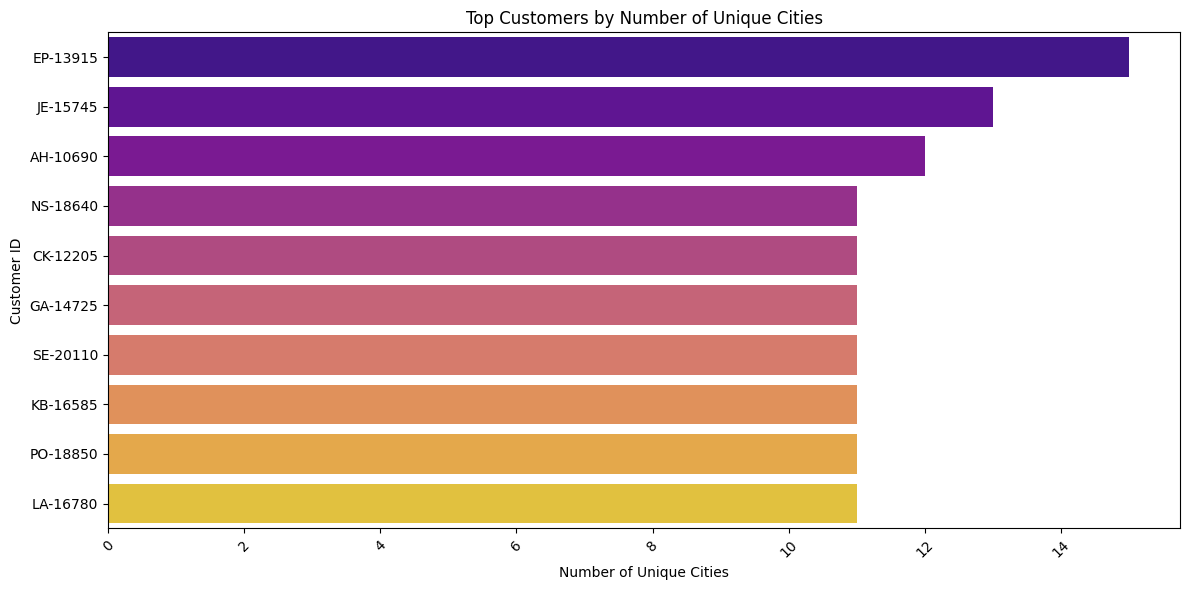

In [66]:
customer_city_counts = df.groupby('Customer ID')['City'].nunique().sort_values(ascending=False).head(10)

print("\nTop Customers by Number of Unique Cities:")
print(customer_city_counts)

plt.figure(figsize=(12,6))
sns.barplot(x=customer_city_counts.values, y=customer_city_counts.index, palette='plasma')
plt.title("Top Customers by Number of Unique Cities")
plt.xlabel("Number of Unique Cities")
plt.ylabel("Customer ID")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('visuals/top_customers_by_unique_cities.png')
plt.show()

Top Countries by Average Delivery Time


Countries with Fastest Delivery Times:
Country
United States    3.961122
Name: Days to Ship, dtype: float64


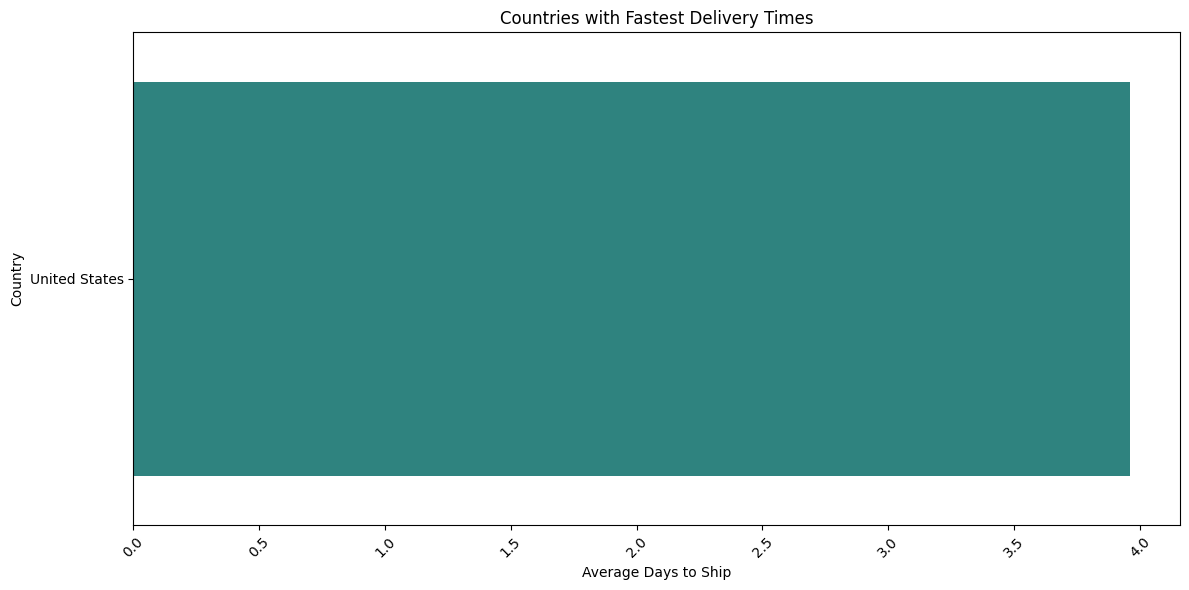

In [67]:
fast_countries = df.groupby('Country')['Days to Ship'].mean().sort_values().head(10)

print("\nCountries with Fastest Delivery Times:")
print(fast_countries)

plt.figure(figsize=(12,6))
sns.barplot(x=fast_countries.values, y=fast_countries.index, palette='viridis')
plt.title("Countries with Fastest Delivery Times")
plt.xlabel("Average Days to Ship")
plt.ylabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('visuals/fastest_delivery_countries.png')
plt.show()

Orders per Month and Year 

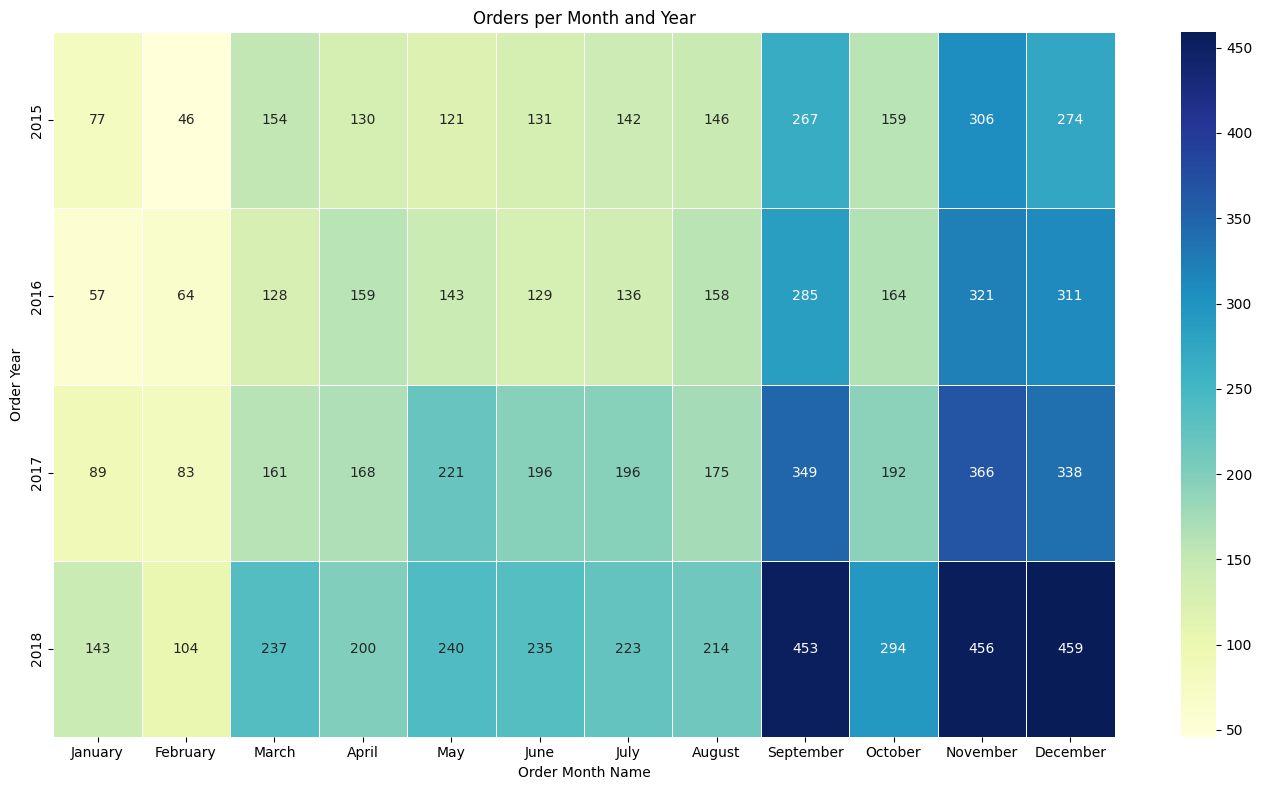

In [68]:
df['Order Year'] = df['Order Date'].dt.year
df['Order Month Name'] = df['Order Date'].dt.month_name()

order_heatmap = df.pivot_table(index='Order Year', columns='Order Month Name', values='Order ID', aggfunc='count')

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
order_heatmap = order_heatmap[month_order]

plt.figure(figsize=(14,8))
sns.heatmap(order_heatmap, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=0.5)
plt.title("Orders per Month and Year")
plt.tight_layout()
plt.savefig('visuals/month_year_order_heatmap.png')
plt.show()

Top 10 Cities with Most Frequent Orders

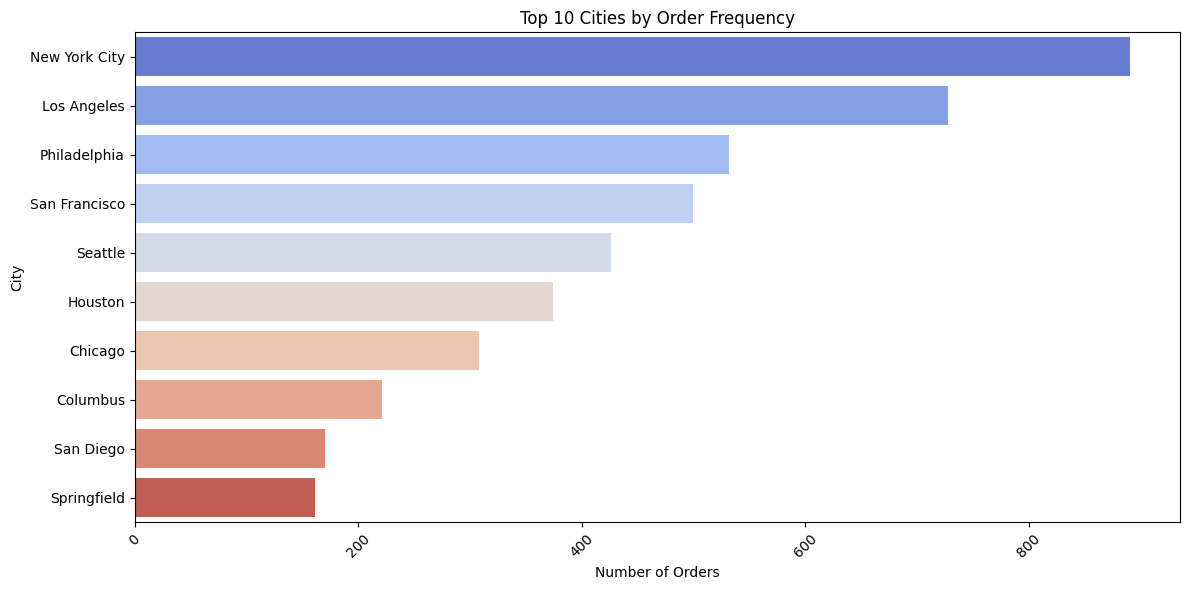

In [69]:
top_cities_orders = df['City'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_cities_orders.values, y=top_cities_orders.index, palette='coolwarm')
plt.title("Top 10 Cities by Order Frequency")
plt.xlabel("Number of Orders")
plt.ylabel("City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('visuals/top_cities_by_order_frequency.png')
plt.show()

Ship Mode Usage Over Time

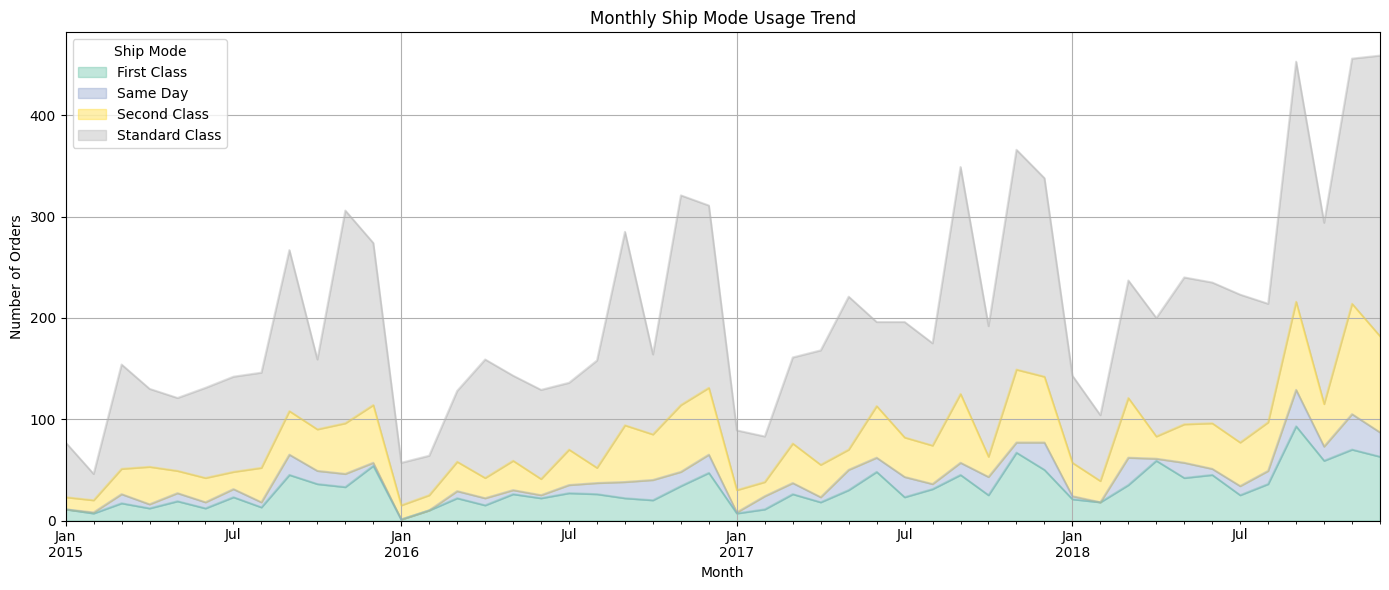

In [72]:
ship_mode_trend = (
    df.groupby([pd.Grouper(key='Order Date', freq='M'), 'Ship Mode'])['Order ID']
    .count()
    .unstack(fill_value=0)
)

ship_mode_trend.plot(
    kind='area',
    stacked=True,
    figsize=(14, 6),
    alpha=0.4,
    colormap='Set2'
)
plt.title("Monthly Ship Mode Usage Trend")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.legend(title="Ship Mode")
plt.tight_layout()
plt.savefig("visuals/ship_mode_usage_over_time.png")
plt.show()

 Number of Orders by Day of Week

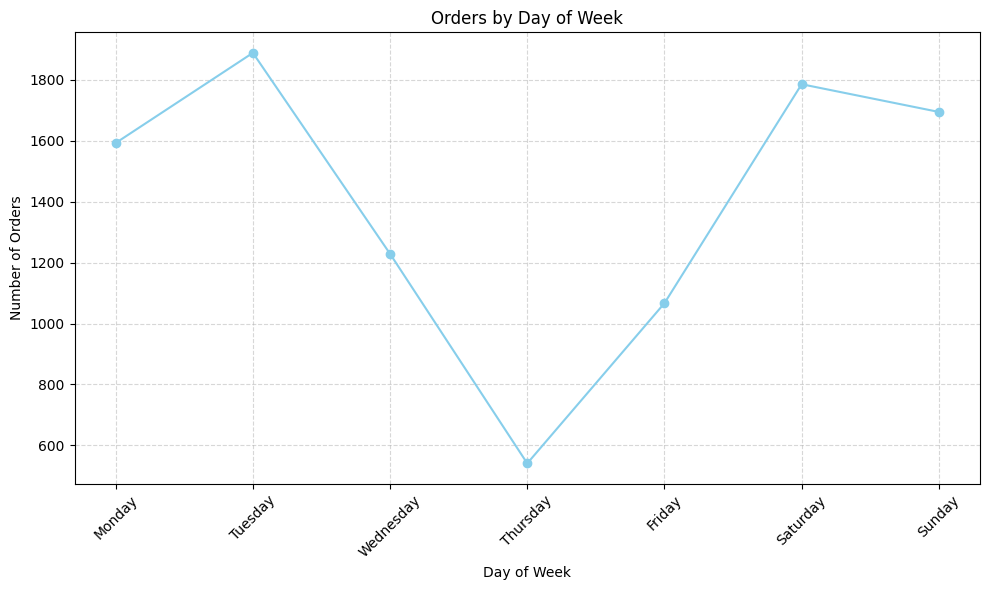

In [71]:
df['Order Day'] = df['Order Date'].dt.day_name()
day_of_week_orders = df['Order Day'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
plt.figure(figsize=(10,6))
day_of_week_orders.plot(marker='o', color='skyblue')
plt.title("Orders by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('visuals/orders_by_day_of_week_line.png')
plt.show()

Cumulative Orders by Segment

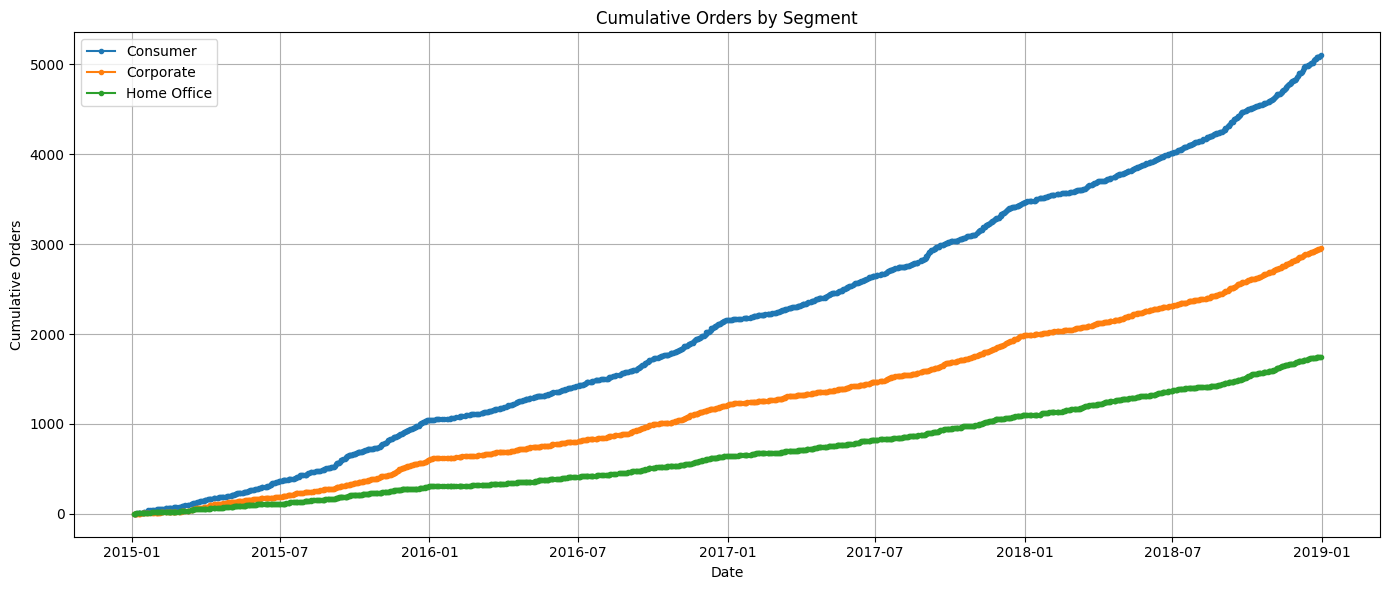

In [73]:
segment_cumulative = df.groupby(['Order Date', 'Segment'])['Order ID'].count().unstack().fillna(0).cumsum()

plt.figure(figsize=(14,6))
for col in segment_cumulative.columns:
    plt.plot(segment_cumulative.index, segment_cumulative[col], label=col, marker='.')
plt.title("Cumulative Orders by Segment")
plt.xlabel("Date")
plt.ylabel("Cumulative Orders")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('visuals/cumulative_orders_by_segment.png')
plt.show()

 Top 10 Customer-Segment Combinations by Delivery Time


Top 10 Customer-Segment Combinations by Avg Delivery Time:
Customer ID  Customer Name      Segment    
JC-15385     Jenna Caffey       Consumer       7.000000
JK-16090     Juliana Krohn      Consumer       6.222222
EB-13840     Ellis Ballard      Corporate      6.000000
BO-11425     Bobby Odegard      Consumer       6.000000
SS-20875     Sung Shariari      Consumer       5.933333
TC-20980     Tamara Chand       Corporate      5.916667
IG-15085     Ivan Gibson        Consumer       5.857143
GR-14560     Georgia Rosenberg  Corporate      5.800000
ML-18040     Michelle Lonsdale  Corporate      5.750000
PL-18925     Paul Lucas         Home Office    5.750000
Name: Days to Ship, dtype: float64


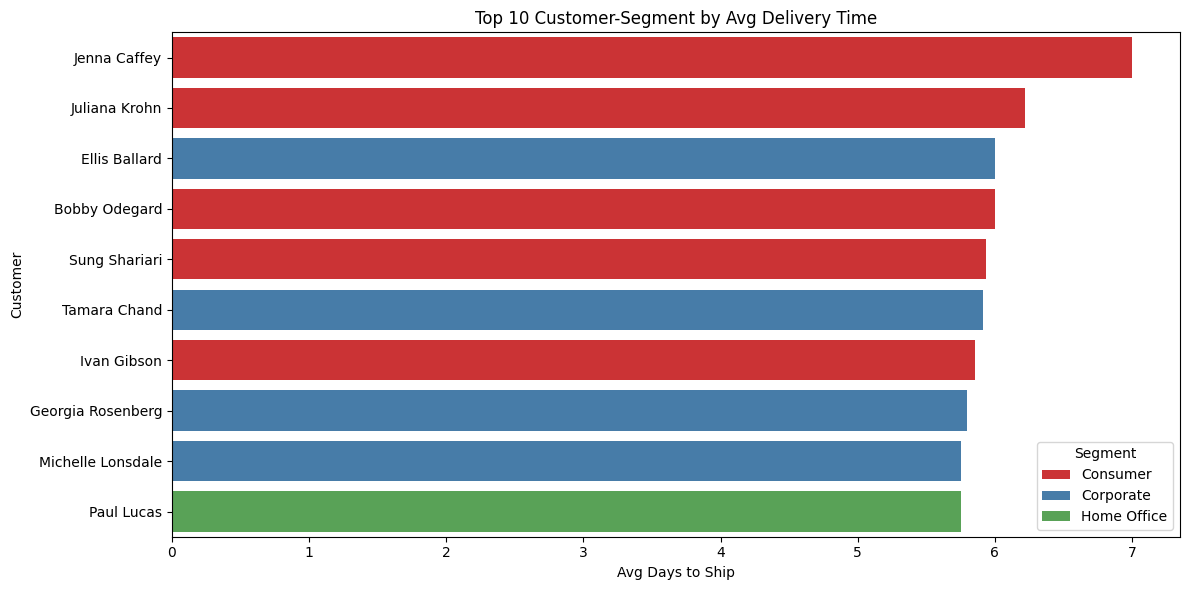

In [74]:
cust_seg_avg_days = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Days to Ship'].mean().sort_values(ascending=False).head(10)

print("\nTop 10 Customer-Segment Combinations by Avg Delivery Time:")
print(cust_seg_avg_days)

cust_seg_avg_days_df = cust_seg_avg_days.reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=cust_seg_avg_days_df, x='Days to Ship', y='Customer Name', hue='Segment', dodge=False, palette='Set1')
plt.title("Top 10 Customer-Segment by Avg Delivery Time")
plt.xlabel("Avg Days to Ship")
plt.ylabel("Customer")
plt.legend(title="Segment")
plt.tight_layout()
plt.savefig('visuals/customer_segment_avg_delivery_time.png')
plt.show()

: City-Level Delivery Performance (Fastest vs Slowest)

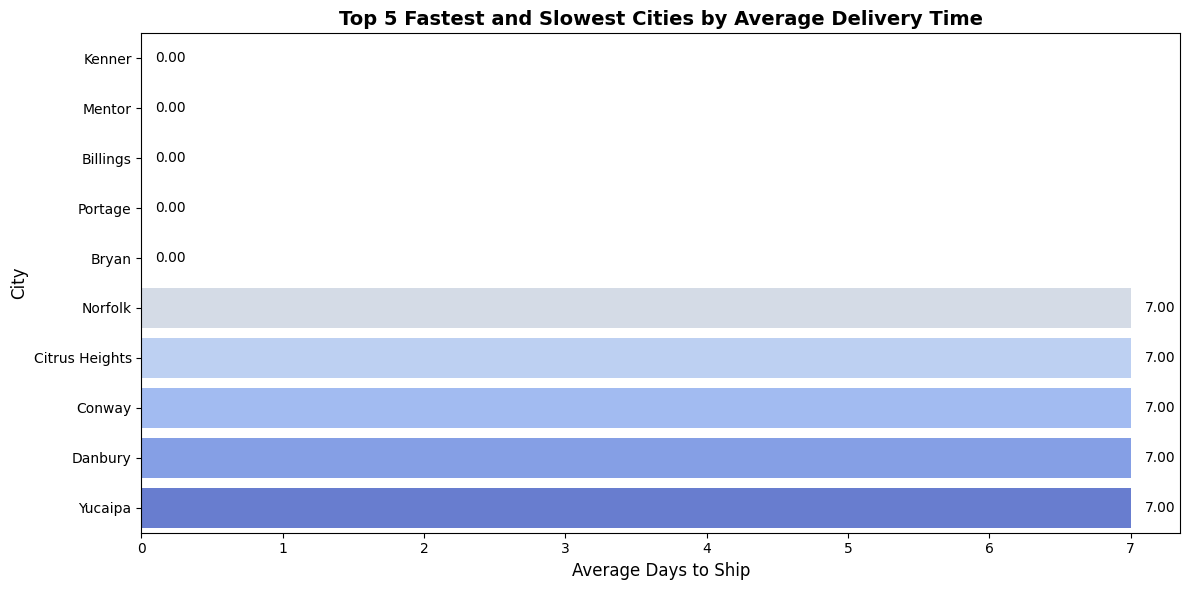

In [76]:
city_avg_days = df.groupby('City')['Days to Ship'].mean().sort_values()

fastest_cities = city_avg_days.head(5).round(2)
slowest_cities = city_avg_days.tail(5).round(2)

combined = pd.concat([fastest_cities, slowest_cities])
combined = combined.sort_values() 

plt.figure(figsize=(12, 6))
sns.barplot(x=combined.values, y=combined.index, palette='coolwarm_r')

plt.title("Top 5 Fastest and Slowest Cities by Average Delivery Time", fontsize=14, weight='bold')
plt.xlabel("Average Days to Ship", fontsize=12)
plt.ylabel("City", fontsize=12)

for index, value in enumerate(combined.values):
    plt.text(value + 0.1, index, f"{value:.2f}", va='center', fontsize=10)

plt.tight_layout()
plt.savefig('visuals/fastest_slowest_cities_delivery_time.png')
plt.show()

Orders per Segment and Ship Mode (Stacked Bar)

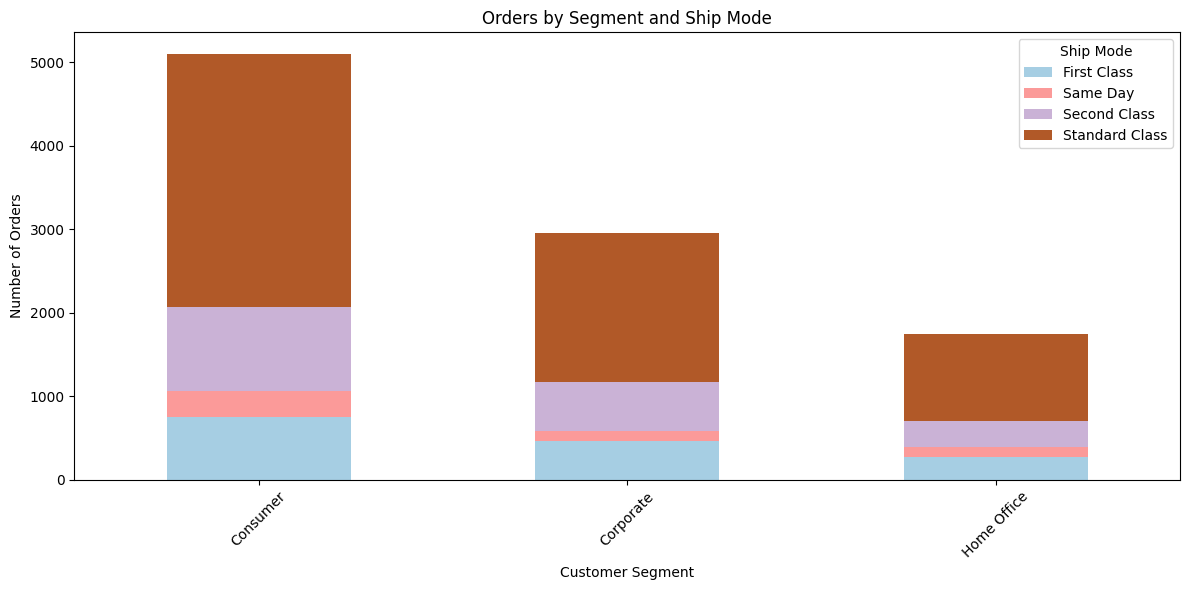

In [77]:
seg_shipmode = pd.crosstab(df['Segment'], df['Ship Mode'])

seg_shipmode.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Paired')
plt.title("Orders by Segment and Ship Mode")
plt.xlabel("Customer Segment")
plt.ylabel("Number of Orders")
plt.legend(title="Ship Mode")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('visuals/segment_shipmode_stacked_bar.png')
plt.show()

Monthly Orders by Segment (Line Chart)

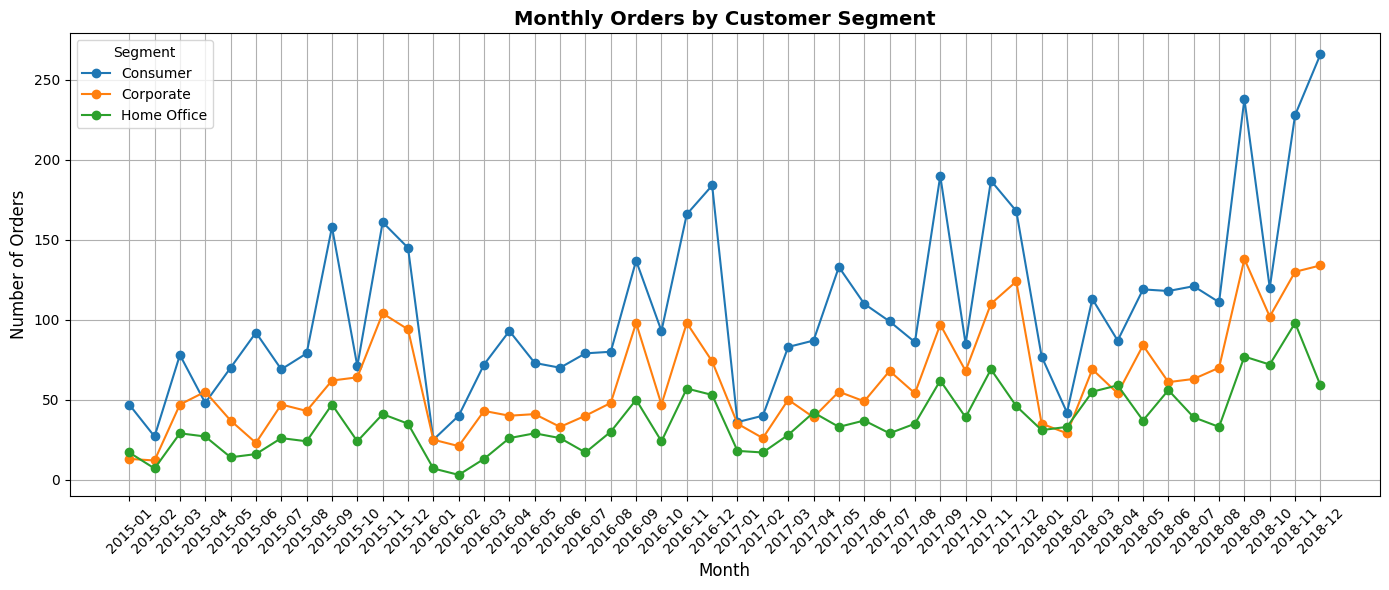

In [79]:
monthly_segment_orders = df.groupby(['Order Month', 'Segment'])['Order ID'].count().unstack(fill_value=0)

monthly_segment_orders.index = monthly_segment_orders.index.astype(str)

plt.figure(figsize=(14, 6))
for segment in monthly_segment_orders.columns:
    plt.plot(monthly_segment_orders.index, monthly_segment_orders[segment], label=segment, marker='o')

plt.title("Monthly Orders by Customer Segment", fontsize=14, weight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.legend(title='Segment')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

import os
os.makedirs('visuals', exist_ok=True)
plt.savefig('visuals/monthly_orders_by_segment_line.png')
plt.show()


 Orders by Ship Mode and Year

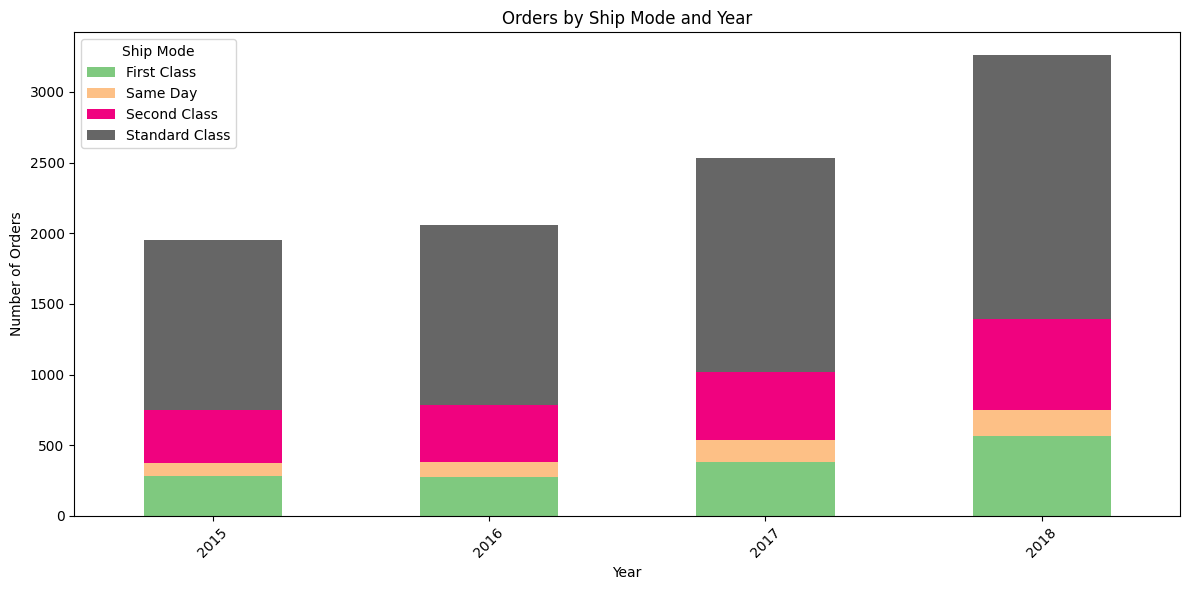

In [80]:
shipmode_year = df.groupby(['Order Year', 'Ship Mode'])['Order ID'].count().unstack(fill_value=0)
shipmode_year.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Accent')
plt.title("Orders by Ship Mode and Year")
plt.xlabel("Year")
plt.ylabel("Number of Orders")
plt.legend(title="Ship Mode")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('visuals/orders_by_shipmode_and_year.png')
plt.show()

Top 5 Countries by Order Growth Over Years

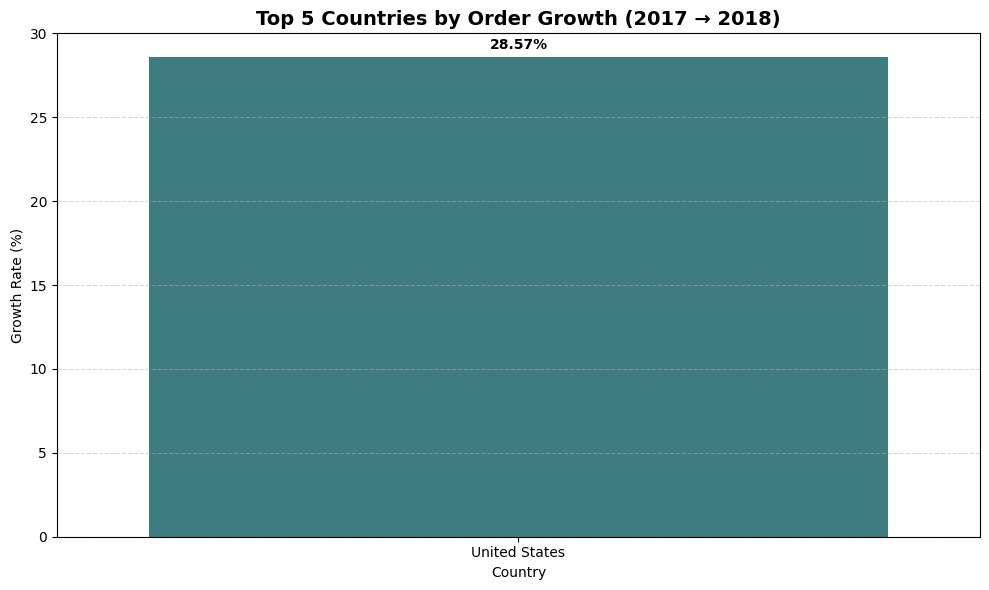

In [82]:
country_year_growth = df.groupby(['Order Year', 'Country'])['Order ID'].count().unstack(fill_value=0)

growth_df = country_year_growth.pct_change().dropna().tail(1).T

latest_year = country_year_growth.index[-1]
prev_year = country_year_growth.index[-2]
growth_df.columns = [f'{prev_year} to {latest_year} Growth']

top_growth = growth_df.sort_values(by=growth_df.columns[0], ascending=False).head(5)

top_growth_percent = top_growth * 100

plt.figure(figsize=(10, 6))
bars = sns.barplot(x=top_growth_percent.index, y=top_growth_percent.iloc[:, 0], palette='crest')

for i, val in enumerate(top_growth_percent.iloc[:, 0]):
    plt.text(i, val + 0.5, f'{val:.2f}%', ha='center', fontsize=10, fontweight='bold')

plt.title(f"Top 5 Countries by Order Growth ({prev_year} → {latest_year})", fontsize=14, weight='bold')
plt.ylabel("Growth Rate (%)")
plt.xlabel("Country")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

import os
os.makedirs('visuals', exist_ok=True)
plt.savefig('visuals/top_countries_order_growth.png')
plt.show()

 Average Delivery Time by Segment and Ship Mode

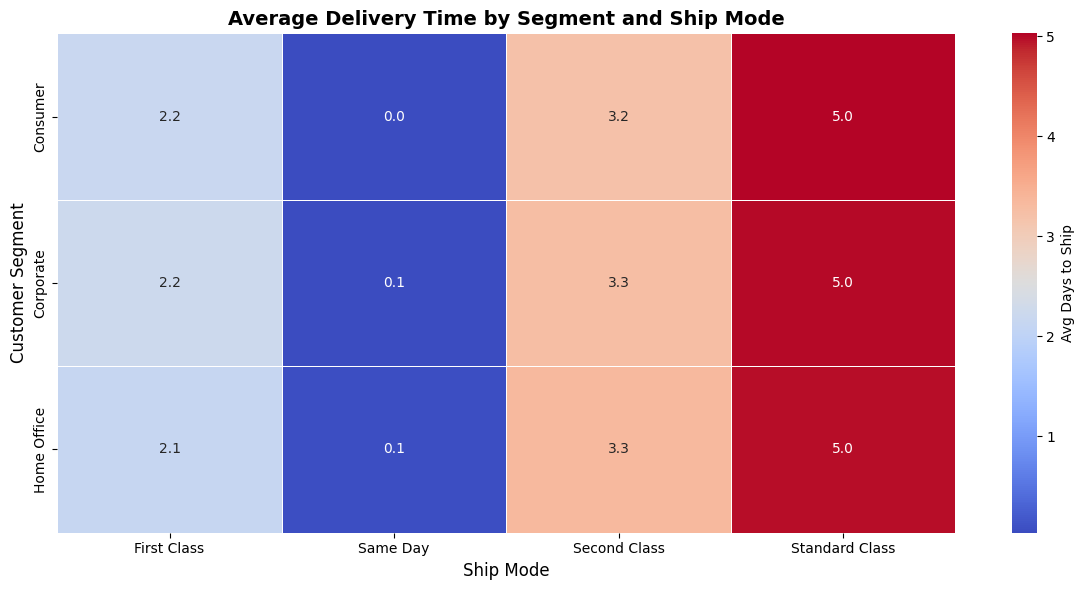

In [84]:
seg_shipmode_avg_days = df.groupby(['Segment', 'Ship Mode'])['Days to Ship'].mean().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(seg_shipmode_avg_days, annot=True, fmt=".1f", cmap='coolwarm', linewidths=0.5, cbar_kws={'label': 'Avg Days to Ship'})

plt.title("Average Delivery Time by Segment and Ship Mode", fontsize=14, fontweight='bold')
plt.xlabel("Ship Mode", fontsize=12)
plt.ylabel("Customer Segment", fontsize=12)

os.makedirs('visuals', exist_ok=True)
plt.tight_layout()
plt.savefig('visuals/delivery_time_by_segment_shipmode.png')
plt.show()

 Orders by Segment and Year (Cluster Map)

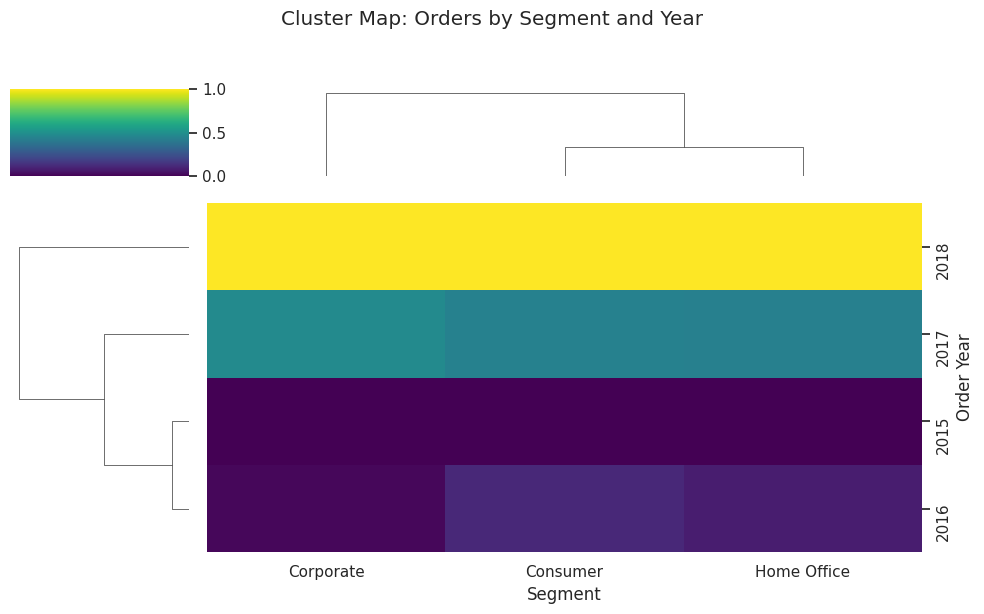

In [87]:
seg_year_orders = df.groupby(['Order Year', 'Segment'])['Order ID'].count().unstack()
sns.clustermap(seg_year_orders, cmap='viridis', standard_scale=1, figsize=(10,6))
plt.suptitle("Cluster Map: Orders by Segment and Year", y=1.02)
plt.tight_layout()
plt.savefig('visuals/cluster_map_orders_by_segment_year.png')
plt.show()

Top 10 Customer Segments by Order Volume


Top Customer Segments by Order Volume:
Segment
Consumer       5101
Corporate      2953
Home Office    1746
Name: count, dtype: int64


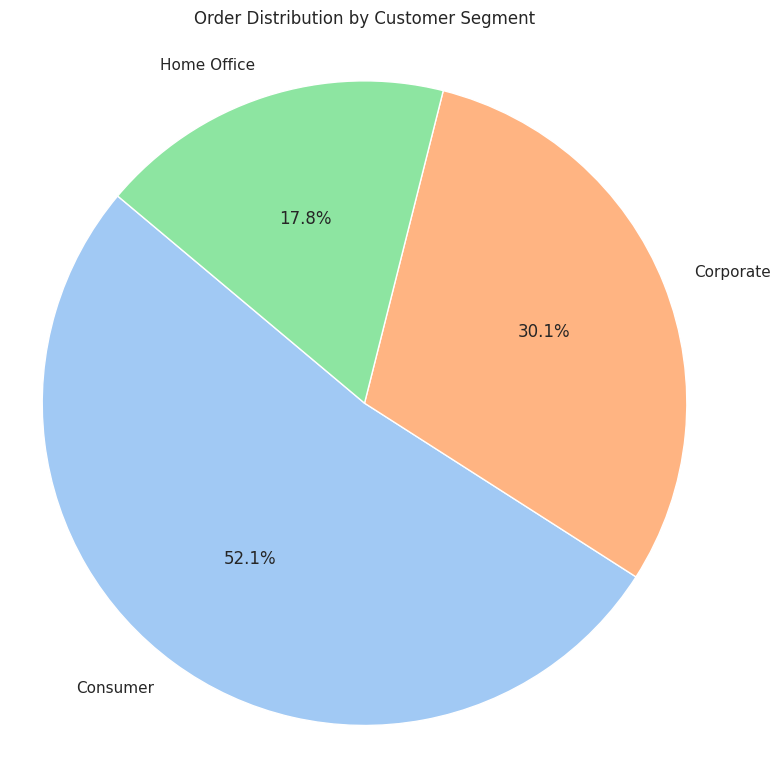

In [88]:
seg_order_count = df['Segment'].value_counts()

print("\nTop Customer Segments by Order Volume:")
print(seg_order_count)

plt.figure(figsize=(8,8))
plt.pie(seg_order_count, labels=seg_order_count.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Order Distribution by Customer Segment")
plt.axis('equal')
plt.tight_layout()
plt.savefig('visuals/order_distribution_by_segment_pie.png')
plt.show()

Top 10 Customer Segments by Delivery Time


Customer Segments by Avg Delivery Time:
Segment
Corporate      4.021334
Consumer       3.941384
Home Office    3.916953
Name: Days to Ship, dtype: float64


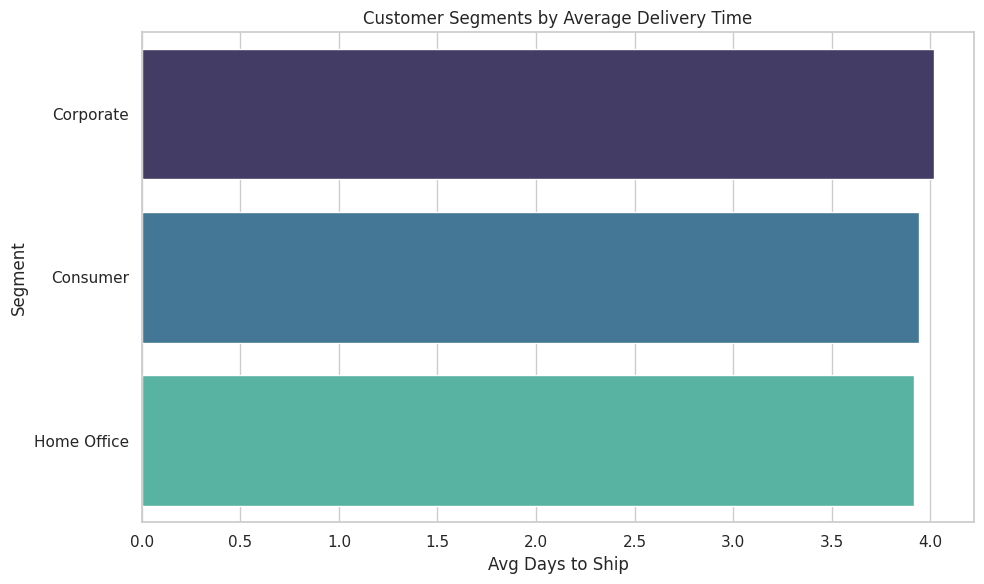

In [89]:
seg_avg_days = df.groupby('Segment')['Days to Ship'].mean().sort_values(ascending=False)

print("\nCustomer Segments by Avg Delivery Time:")
print(seg_avg_days)

plt.figure(figsize=(10,6))
sns.barplot(x=seg_avg_days.values, y=seg_avg_days.index, palette='mako')
plt.title("Customer Segments by Average Delivery Time")
plt.xlabel("Avg Days to Ship")
plt.ylabel("Segment")
plt.tight_layout()
plt.savefig('visuals/customer_segments_by_avg_delivery_time.png')
plt.show()

Orders by Ship Mode and Segment (Facet Grid)

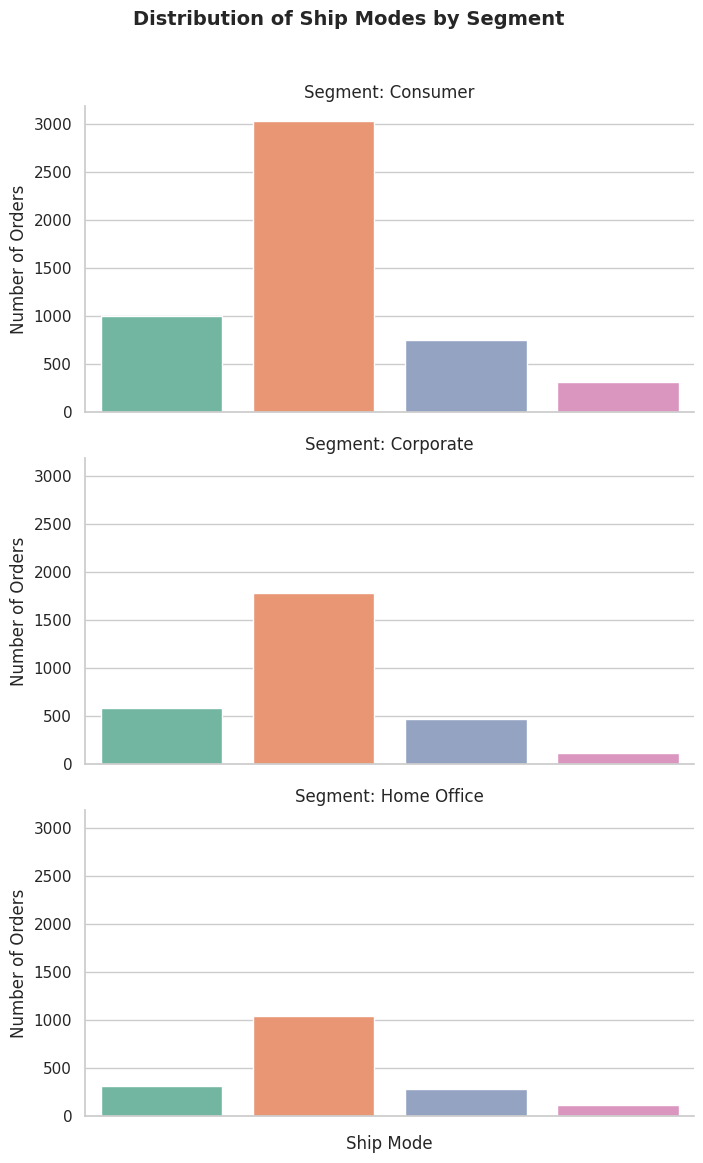

In [93]:
sns.set(style='whitegrid')

g = sns.catplot(
    data=df,
    x='Ship Mode',
    kind='count',
    row='Segment',
    height=4,
    aspect=1.8,
    palette='Set2',
    sharex=True  
)

g.set_titles("Segment: {row_name}")
g.set_axis_labels("Ship Mode", "Number of Orders")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Distribution of Ship Modes by Segment ", fontsize=14, fontweight='bold')

for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.savefig("visuals/facet_shipmode_by_segment_vertical.png", bbox_inches='tight')
plt.show()

 Monthly Orders by Country (Top 3)

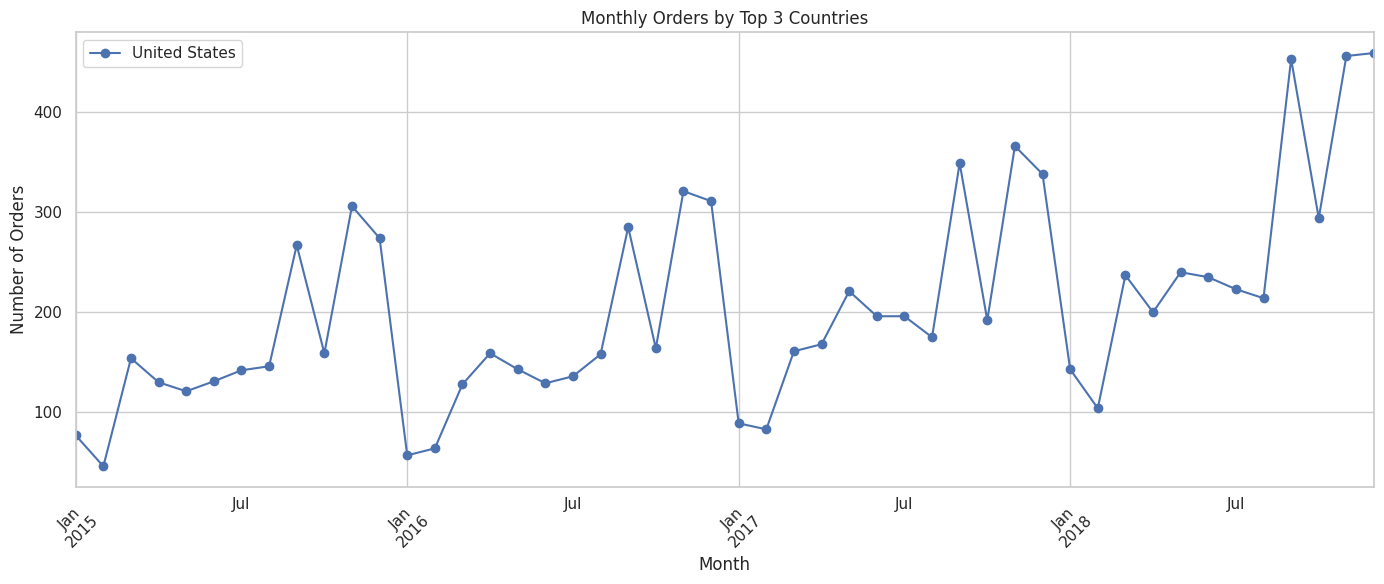

In [94]:
top_3_countries = df[df['Country'].isin(df['Country'].value_counts().head(3).index)]
country_monthly_orders = top_3_countries.groupby(['Order Month', 'Country'])['Order ID'].count().unstack()

country_monthly_orders.plot(kind='line', marker='o', figsize=(14,6))
plt.title("Monthly Orders by Top 3 Countries")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('visuals/monthly_orders_top_3_countries.png')
plt.show()

 Orders by Segment and City (Top 5 Cities)

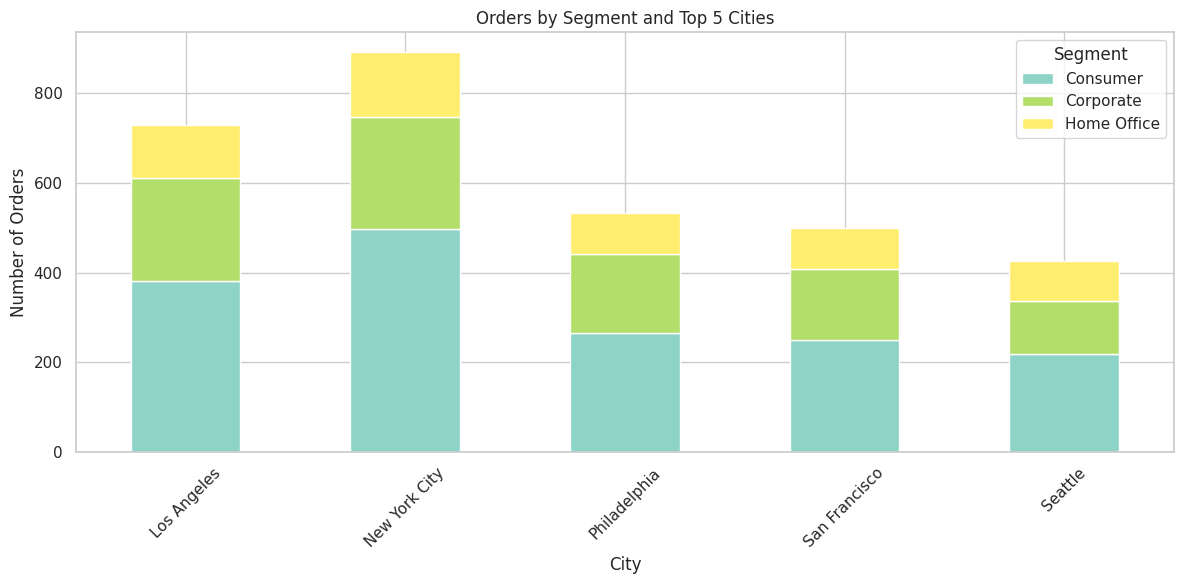

In [95]:
top_5_cities = df[df['City'].isin(df['City'].value_counts().head(5).index)]
seg_city_orders = pd.crosstab(top_5_cities['City'], top_5_cities['Segment'])

seg_city_orders.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set3')
plt.title("Orders by Segment and Top 5 Cities")
plt.xlabel("City")
plt.ylabel("Number of Orders")
plt.legend(title="Segment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('visuals/segment_city_orders_stacked.png')
plt.show()

 Orders by Segment and Ship Mode 

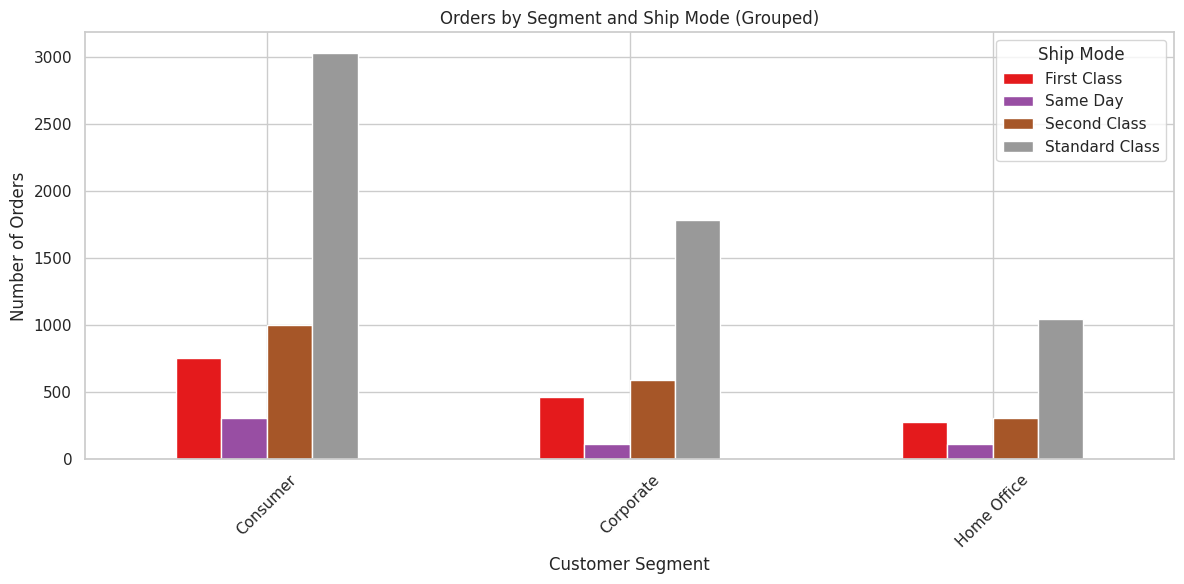

In [96]:
seg_shipmode_orders = pd.crosstab(df['Segment'], df['Ship Mode'])

seg_shipmode_orders.plot(kind='bar', figsize=(12,6), colormap='Set1')
plt.title("Orders by Segment and Ship Mode (Grouped)")
plt.xlabel("Customer Segment")
plt.ylabel("Number of Orders")
plt.legend(title="Ship Mode")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('visuals/segment_shipmode_grouped_bar.png')
plt.show()

 Top 10 Customers by Average Delivery Time


Top 10 Customers by Avg Delivery Time:
Customer ID  Customer Name    
JC-15385     Jenna Caffey         7.000000
JK-16090     Juliana Krohn        6.222222
EB-13840     Ellis Ballard        6.000000
BO-11425     Bobby Odegard        6.000000
SS-20875     Sung Shariari        5.933333
TC-20980     Tamara Chand         5.916667
IG-15085     Ivan Gibson          5.857143
GR-14560     Georgia Rosenberg    5.800000
ML-18040     Michelle Lonsdale    5.750000
PL-18925     Paul Lucas           5.750000
Name: Days to Ship, dtype: float64


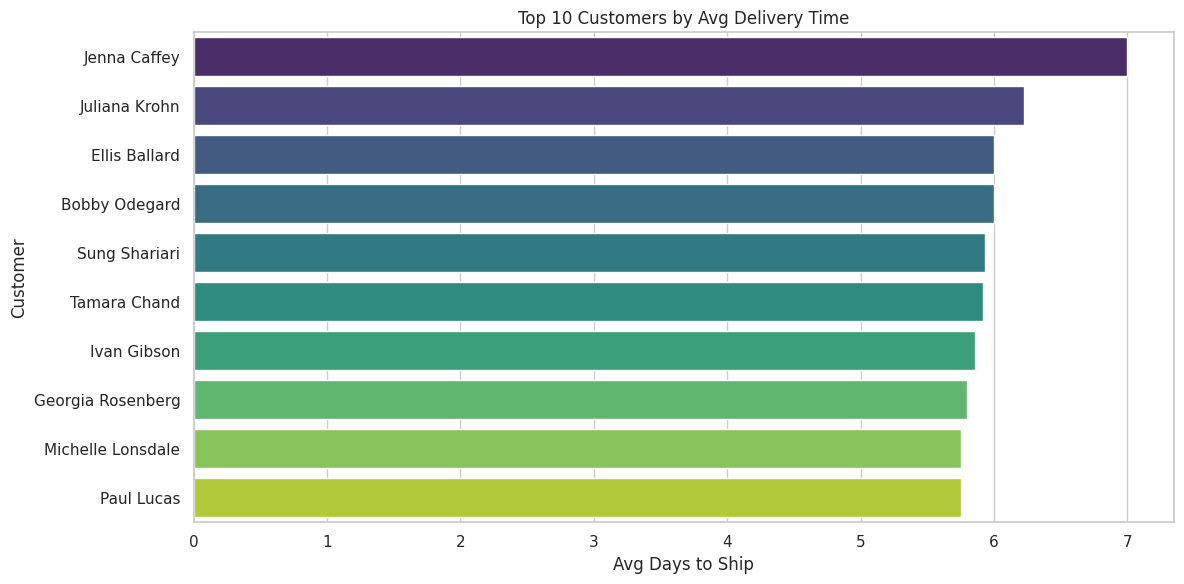

In [97]:
cust_avg_days = df.groupby(['Customer ID', 'Customer Name'])['Days to Ship'].mean().sort_values(ascending=False).head(10)

print("\nTop 10 Customers by Avg Delivery Time:")
print(cust_avg_days)

cust_avg_days_df = cust_avg_days.reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=cust_avg_days_df, x='Days to Ship', y='Customer Name', palette='viridis')
plt.title("Top 10 Customers by Avg Delivery Time")
plt.xlabel("Avg Days to Ship")
plt.ylabel("Customer")
plt.tight_layout()
plt.savefig('visuals/top_customers_by_avg_delivery_time.png')
plt.show()

 City-Level Orders Over Time (Line Charts)

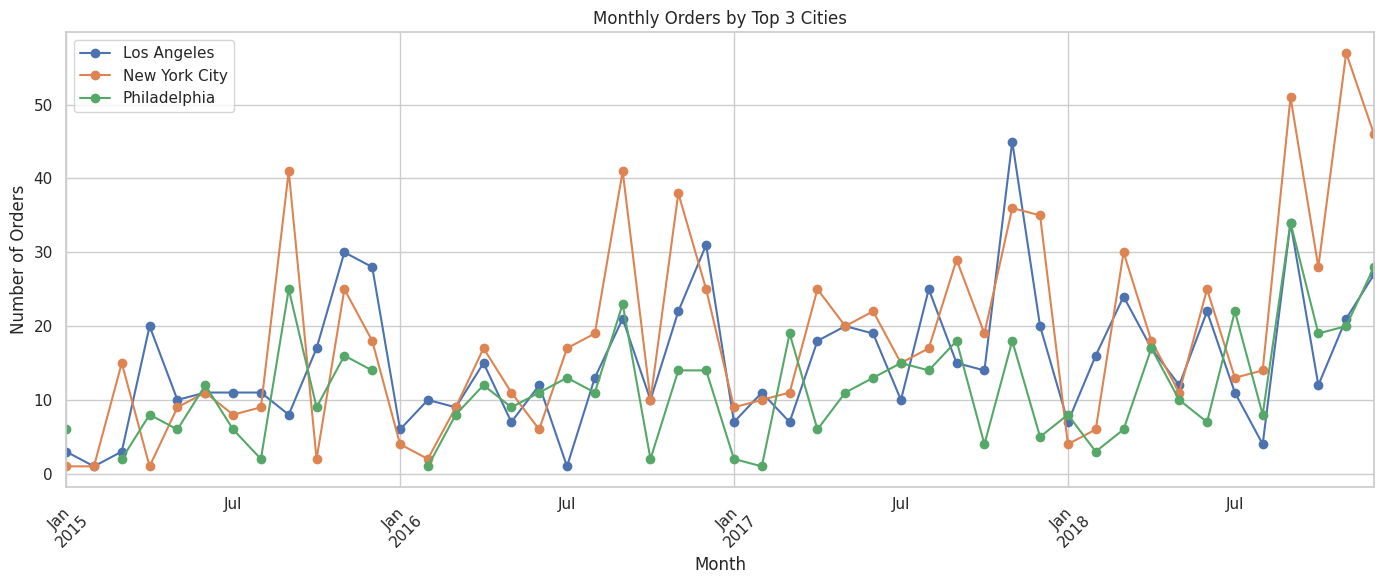

In [98]:
top_3_cities = df[df['City'].isin(df['City'].value_counts().head(3).index)]
city_monthly_orders = top_3_cities.groupby(['Order Month', 'City'])['Order ID'].count().unstack()

city_monthly_orders.plot(kind='line', marker='o', figsize=(14,6))
plt.title("Monthly Orders by Top 3 Cities")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('visuals/monthly_orders_top_3_cities.png')
plt.show()

 Country-Level Order Growth Rate (% Change Year-over-Year)


Top Countries by YoY Order Growth (%):
Order Year         2018
Country                
United States  0.285714


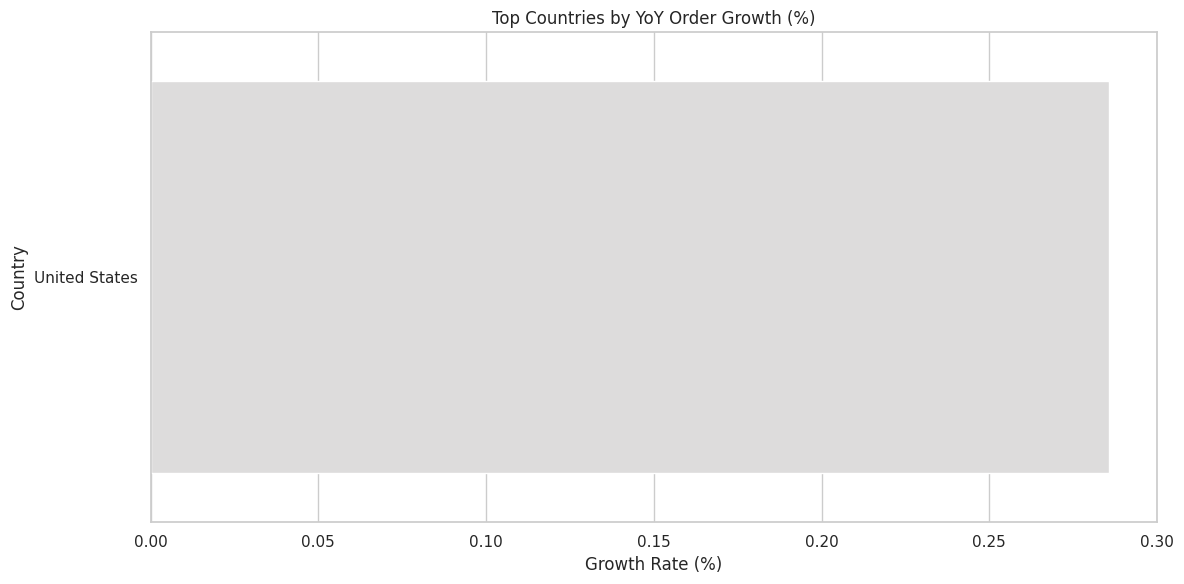

In [99]:
country_year_orders = df.groupby(['Order Year', 'Country'])['Order ID'].count().unstack(fill_value=0)

country_growth = country_year_orders.pct_change().dropna().tail(1).T.sort_values(by=country_year_orders.index[-1], ascending=False).head(10)

print("\nTop Countries by YoY Order Growth (%):")
print(country_growth)

plt.figure(figsize=(12,6))
sns.barplot(x=country_growth[country_growth.columns[0]], y=country_growth.index, palette='coolwarm')
plt.title("Top Countries by YoY Order Growth (%)")
plt.xlabel("Growth Rate (%)")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig('visuals/country_yoy_growth_rate.png')
plt.show()

 Orders by Segment and Day of Week

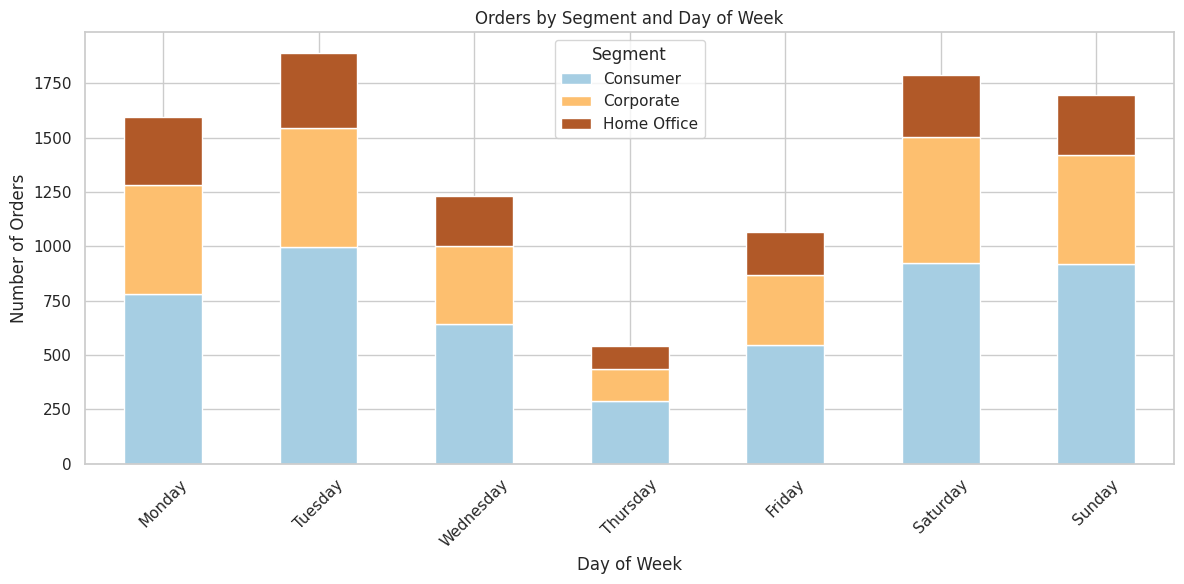

In [100]:
seg_day_orders = pd.crosstab(df['Order Day'], df['Segment']).reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

seg_day_orders.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Paired')
plt.title("Orders by Segment and Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.legend(title="Segment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('visuals/segment_day_of_week_stacked_bar.png')
plt.show()

Top 10 Customer-Segment Combinations by Delivery Time (Fastest)


Top 10 Fastest Customer-Segment Deliveries:
Customer ID  Customer Name      Segment    
SG-20080     Sandra Glassco     Consumer       0.727273
RR-19315     Ralph Ritter       Consumer       1.250000
LS-17245     Lynn Smith         Consumer       1.333333
ML-18265     Muhammed Lee       Consumer       1.333333
CG-12520     Claire Gute        Consumer       1.400000
NC-18340     Nat Carroll        Consumer       1.529412
EN-13780     Edward Nazzal      Consumer       1.555556
TG-21640     Trudy Glocke       Consumer       1.600000
MG-17680     Maureen Gastineau  Home Office    1.600000
RH-19495     Rick Hansen        Consumer       1.625000
Name: Days to Ship, dtype: float64


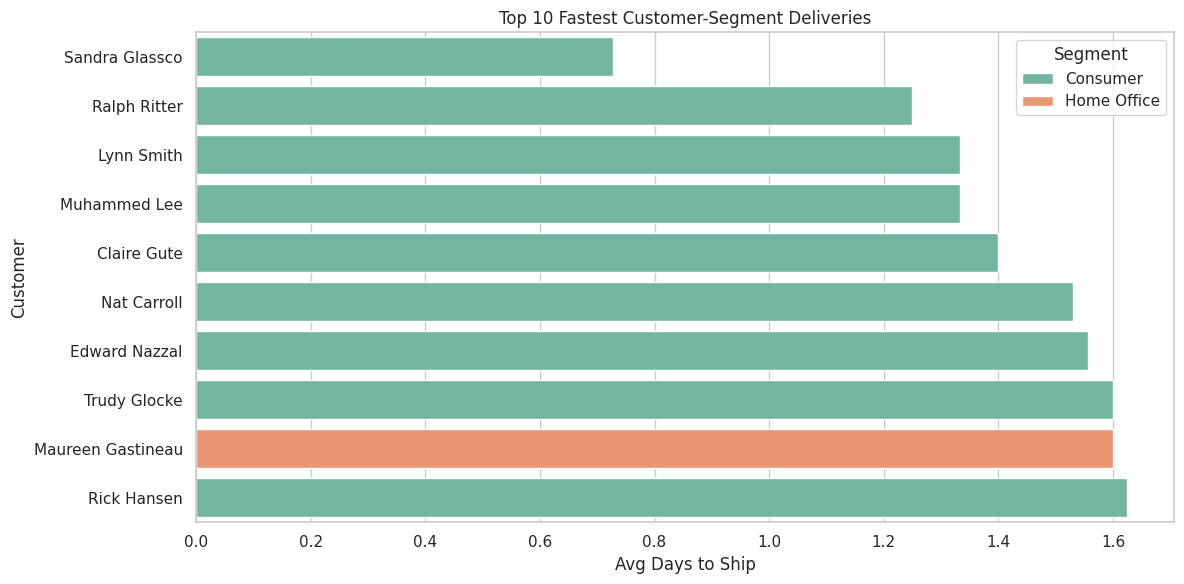

In [101]:
fast_cust_seg = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Days to Ship'].mean().sort_values().head(10)

print("\nTop 10 Fastest Customer-Segment Deliveries:")
print(fast_cust_seg)

fast_cust_seg_df = fast_cust_seg.reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=fast_cust_seg_df, x='Days to Ship', y='Customer Name', hue='Segment', dodge=False, palette='Set2')
plt.title("Top 10 Fastest Customer-Segment Deliveries")
plt.xlabel("Avg Days to Ship")
plt.ylabel("Customer")
plt.legend(title="Segment")
plt.tight_layout()
plt.savefig('visuals/fastest_customer_segment_deliveries.png')
plt.show()

Ship Mode Usage by Day of Week

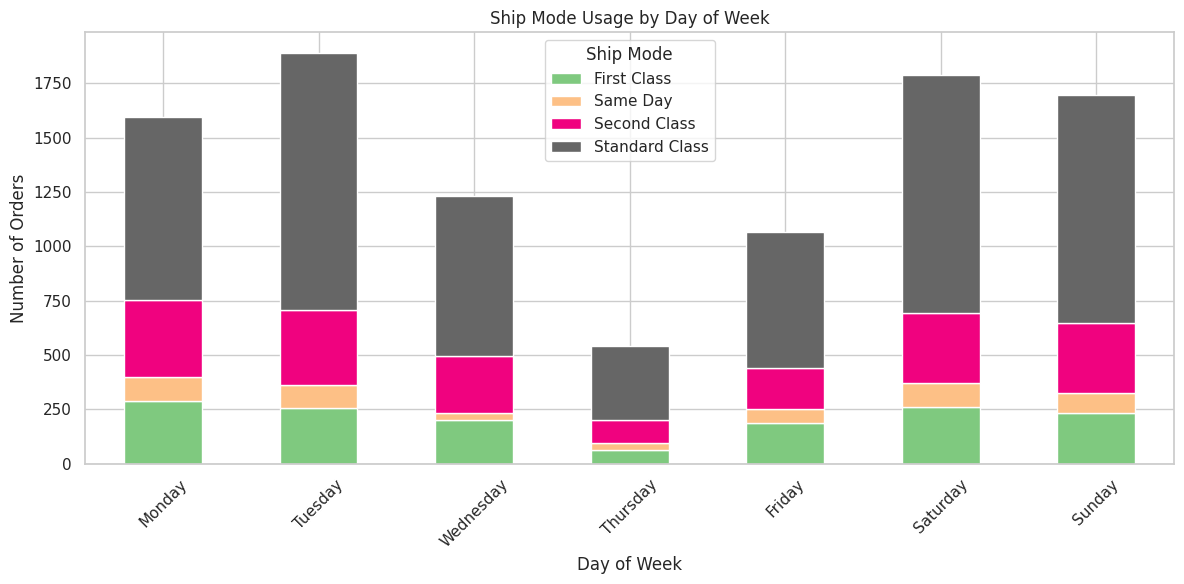

In [102]:
shipmode_day = pd.crosstab(df['Order Day'], df['Ship Mode']).reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

shipmode_day.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Accent')
plt.title("Ship Mode Usage by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.legend(title="Ship Mode")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('visuals/shipmode_usage_by_day_of_week.png')
plt.show()

 Monthly Orders by Ship Mode (Stacked Area Chart)

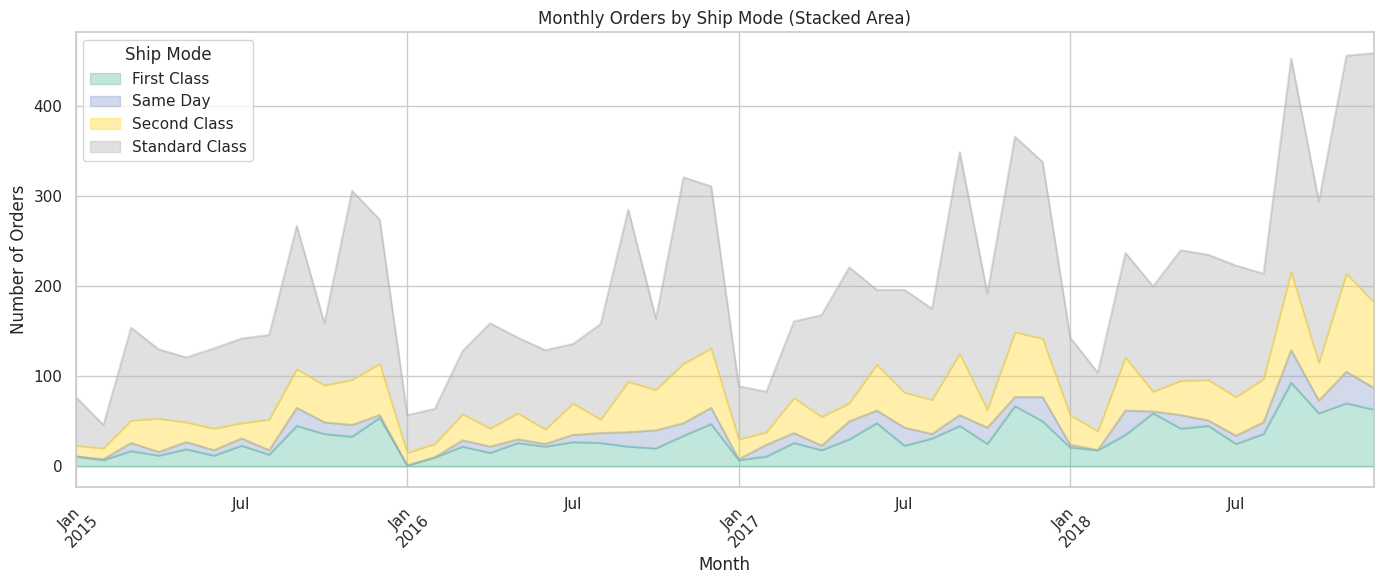

In [106]:
monthly_shipmode_orders = df.groupby(['Order Month', 'Ship Mode'])['Order ID'].count().unstack(fill_value=0)

monthly_shipmode_orders.plot(kind='area', stacked=True, alpha=0.4, figsize=(14,6), colormap='Set2')
plt.title("Monthly Orders by Ship Mode (Stacked Area)")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.legend(title="Ship Mode")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('visuals/monthly_orders_by_shipmode_area.png')
plt.show()

Orders by Segment and Ship Mode (Facet Grid)

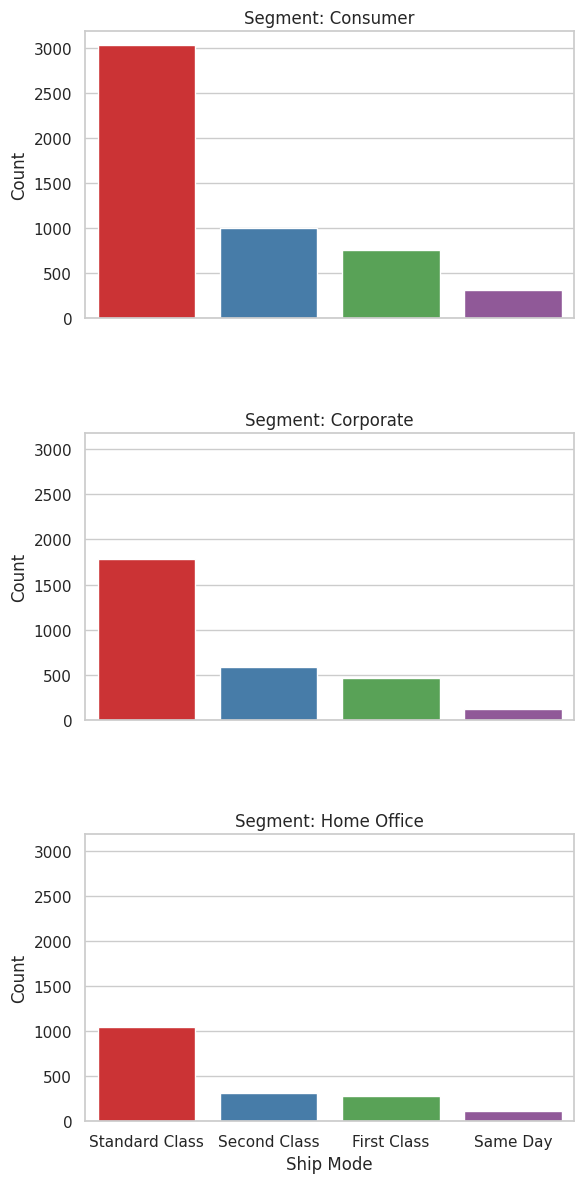

In [108]:
g = sns.FacetGrid(
    df,
    col='Segment',
    col_wrap=1,        
    sharex=True,
    height=4,
    aspect=1.5,
    despine=False
)

g.map(sns.countplot, 'Ship Mode', palette='Set1', order=df['Ship Mode'].value_counts().index)

g.set_titles("Segment: {col_name}")
g.set_axis_labels("Ship Mode", "Count")
g.fig.subplots_adjust(hspace=0.4) 

plt.savefig('visuals/facet_shipmode_by_segment_v2.png', bbox_inches='tight')
plt.show()

Orders by Segment and City (Heatmap)Orders by Segment and City (Heatmap)

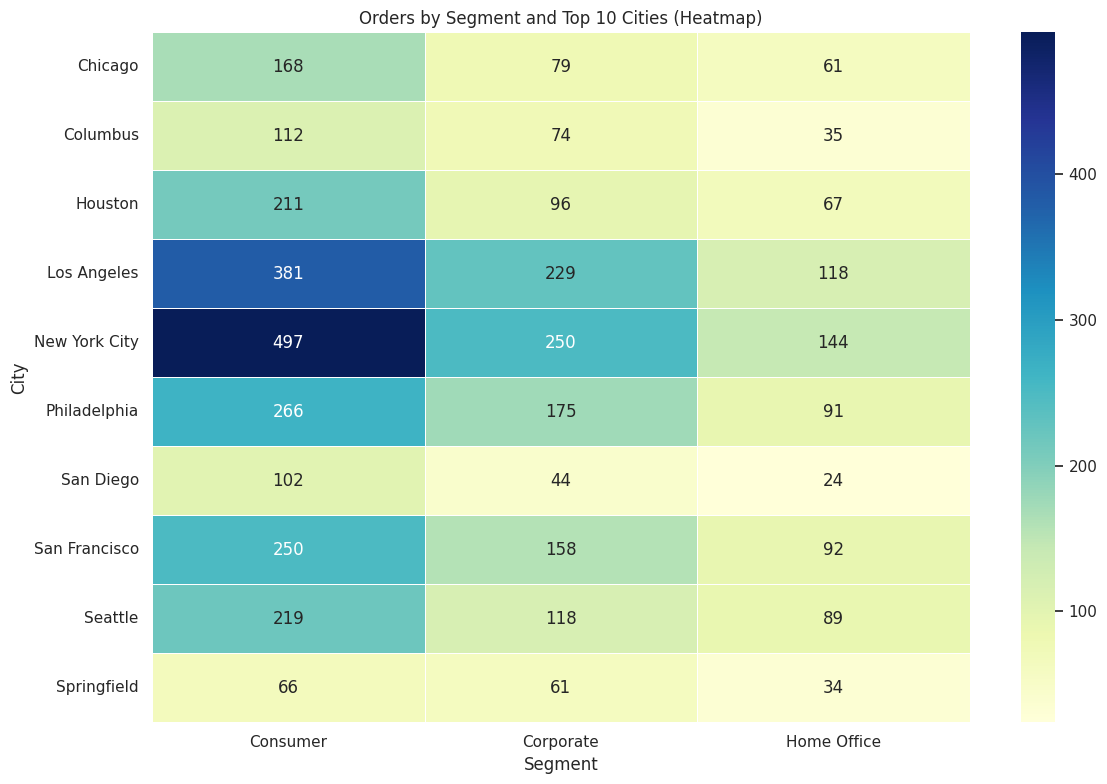

In [109]:
top_10_cities = df[df['City'].isin(df['City'].value_counts().head(10).index)]
seg_city_heatmap = pd.crosstab(top_10_cities['City'], top_10_cities['Segment'])

plt.figure(figsize=(12,8))
sns.heatmap(seg_city_heatmap, annot=True, fmt=".0f", cmap='YlGnBu', linewidths=0.5)
plt.title("Orders by Segment and Top 10 Cities (Heatmap)")
plt.tight_layout()
plt.savefig('visuals/segment_city_heatmap.png')
plt.show()

Top 10 Customer-Segment Combinations by Number of Orders


Top 10 Customer-Segment Combinations by Order Count:
Customer ID  Customer Name        Segment    
WB-21850     William Brown        Consumer       35
PP-18955     Paul Prost           Home Office    34
MA-17560     Matt Abelman         Home Office    34
JL-15835     John Lee             Consumer       33
CK-12205     Chloris Kastensmidt  Consumer       32
SV-20365     Seth Vernon          Consumer       32
JD-15895     Jonathan Doherty     Corporate      32
AP-10915     Arthur Prichep       Consumer       31
ZC-21910     Zuschuss Carroll     Consumer       31
EP-13915     Emily Phan           Consumer       31
Name: Order ID, dtype: int64


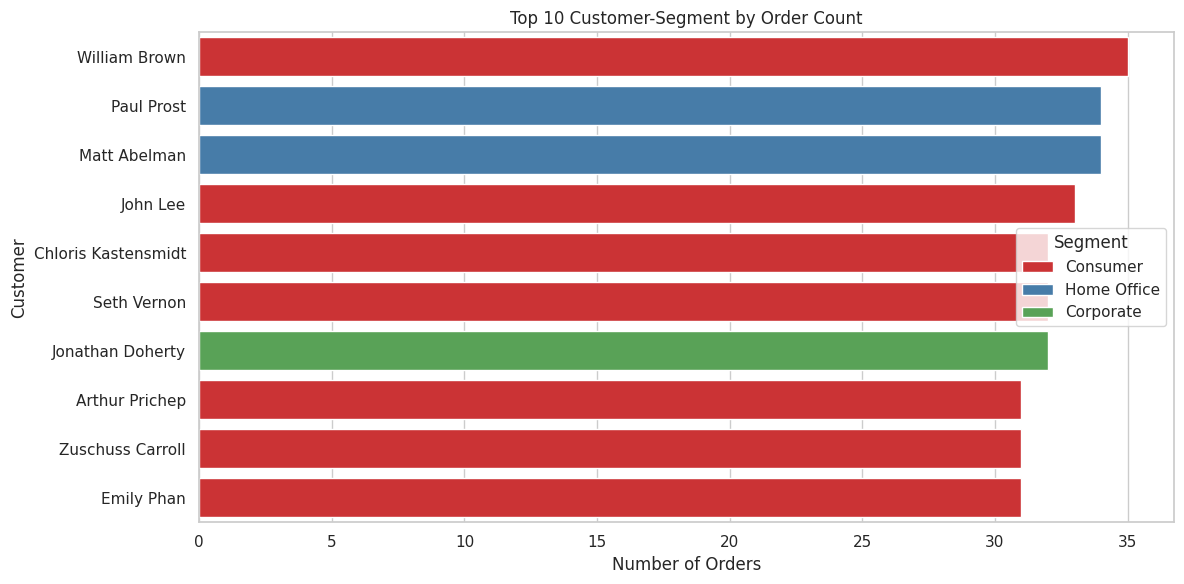

In [110]:
cust_seg_order_count = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Order ID'].count().sort_values(ascending=False).head(10)

print("\nTop 10 Customer-Segment Combinations by Order Count:")
print(cust_seg_order_count)

cust_seg_order_count_df = cust_seg_order_count.reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=cust_seg_order_count_df, x='Order ID', y='Customer Name', hue='Segment', dodge=False, palette='Set1')
plt.title("Top 10 Customer-Segment by Order Count")
plt.xlabel("Number of Orders")
plt.ylabel("Customer")
plt.legend(title="Segment")
plt.tight_layout()
plt.savefig('visuals/customer_segment_order_count.png')
plt.show()

Top 10 Customers by Number of Unique Countries


Top Customers by Number of Unique Countries:
Customer ID
AA-10315    1
ML-17755    1
ML-18265    1
MM-17260    1
MM-17920    1
MM-18055    1
MM-18280    1
MN-17935    1
MO-17500    1
MO-17800    1
Name: Country, dtype: int64


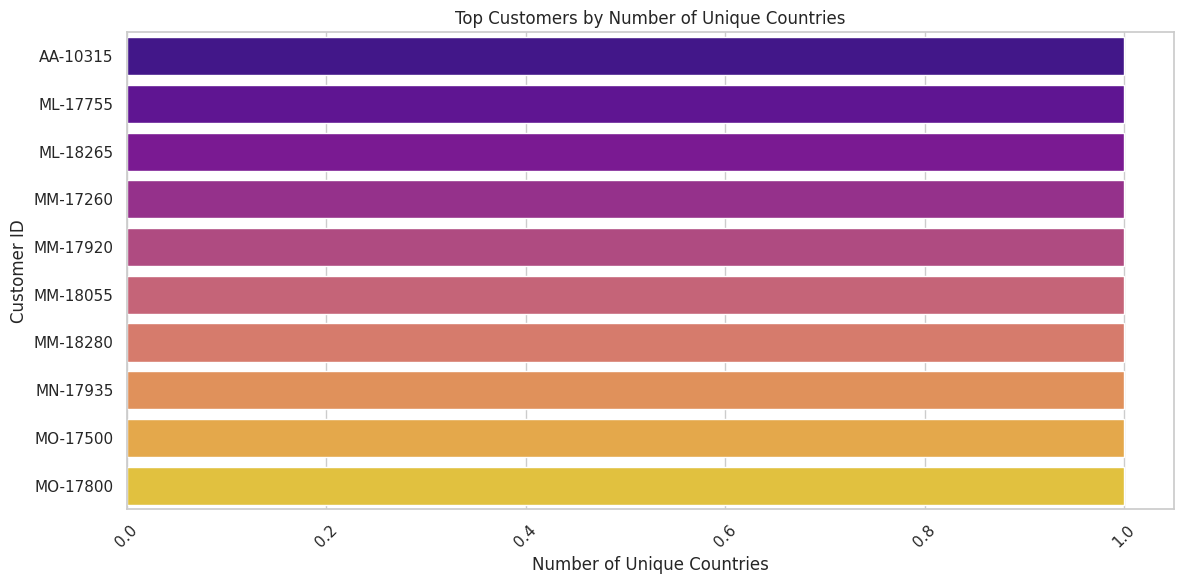

In [111]:
customer_country_counts = df.groupby('Customer ID')['Country'].nunique().sort_values(ascending=False).head(10)

print("\nTop Customers by Number of Unique Countries:")
print(customer_country_counts)

plt.figure(figsize=(12,6))
sns.barplot(x=customer_country_counts.values, y=customer_country_counts.index, palette='plasma')
plt.title("Top Customers by Number of Unique Countries")
plt.xlabel("Number of Unique Countries")
plt.ylabel("Customer ID")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('visuals/top_customers_by_unique_countries.png')
plt.show()

 Orders by Segment and Ship Mode (Swarm Plot)

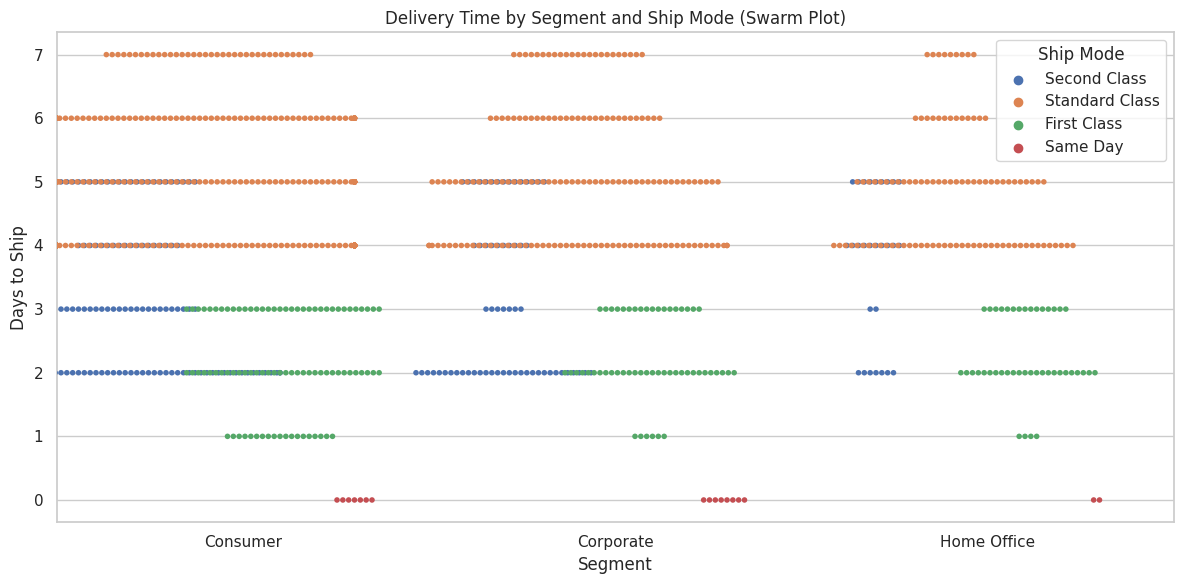

In [112]:
plt.figure(figsize=(12,6))
sns.swarmplot(data=df.head(1000), x='Segment', y='Days to Ship', hue='Ship Mode', dodge=True, size=4)
plt.title("Delivery Time by Segment and Ship Mode (Swarm Plot)")
plt.ylabel("Days to Ship")
plt.legend(title="Ship Mode")
plt.tight_layout()
plt.savefig('visuals/delivery_swarm_plot_segment_shipmode.png')
plt.show()

 Orders by Segment and City (Treemap)

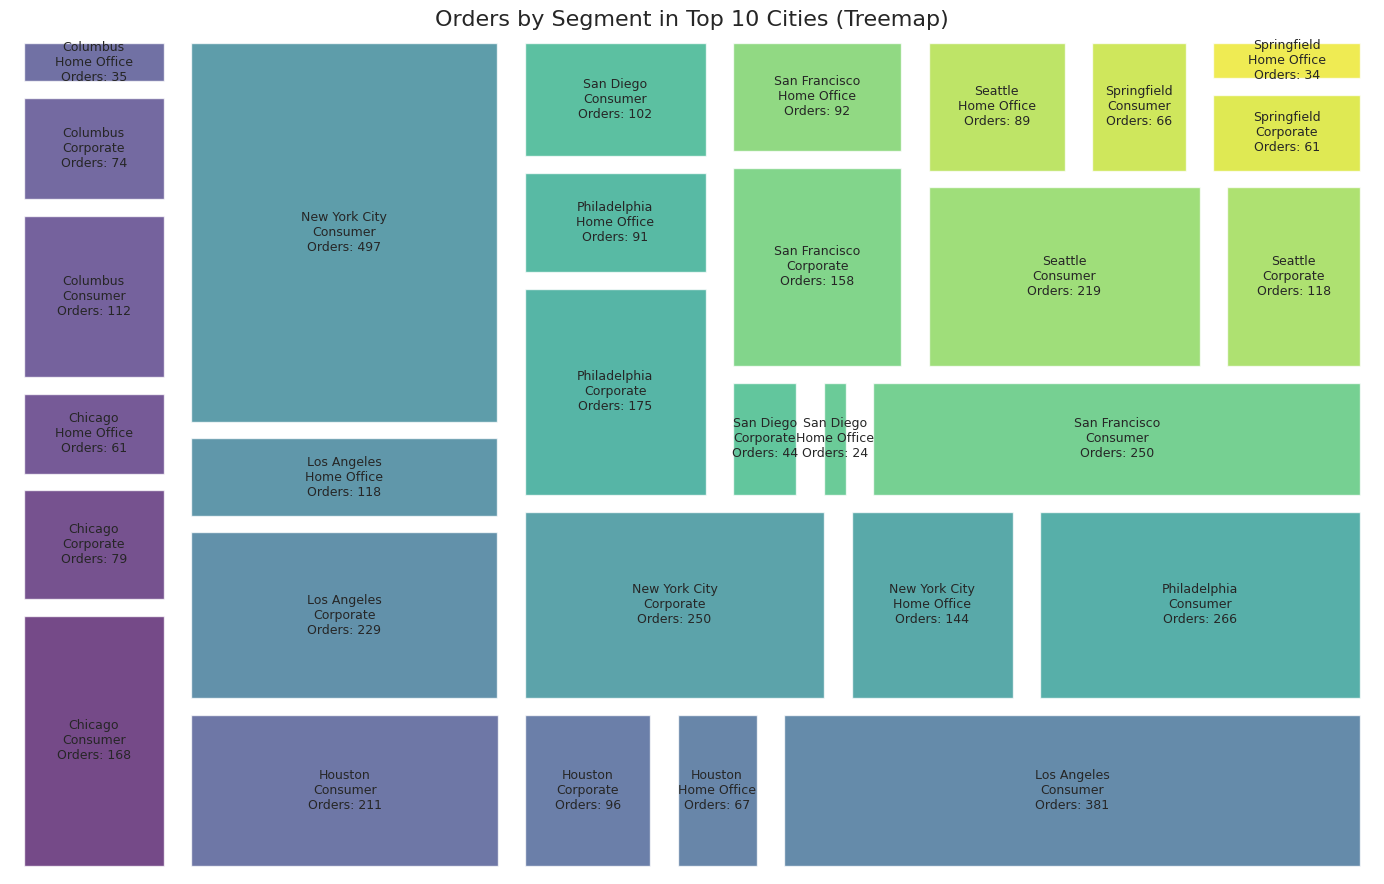

In [114]:
import squarify

top_10_cities = df[df['City'].isin(df['City'].value_counts().head(10).index)]

seg_city_treemap = (
    top_10_cities
    .groupby(['City', 'Segment'])['Order ID']
    .count()
    .reset_index()
    .rename(columns={'Order ID': 'Orders'})
)

labels = seg_city_treemap.apply(lambda row: f"{row['City']}\n{row['Segment']}\nOrders: {row['Orders']}", axis=1)

plt.figure(figsize=(14, 9))
squarify.plot(
    sizes=seg_city_treemap['Orders'],
    label=labels,
    alpha=0.75,
    color=sns.color_palette("viridis", len(seg_city_treemap)),
    pad=True,
    text_kwargs={'fontsize': 9}
)

plt.title("Orders by Segment in Top 10 Cities (Treemap)", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.savefig('visuals/segment_city_treemap.png')
plt.show()

City-Level Delivery Time Heatmap (Top 10)

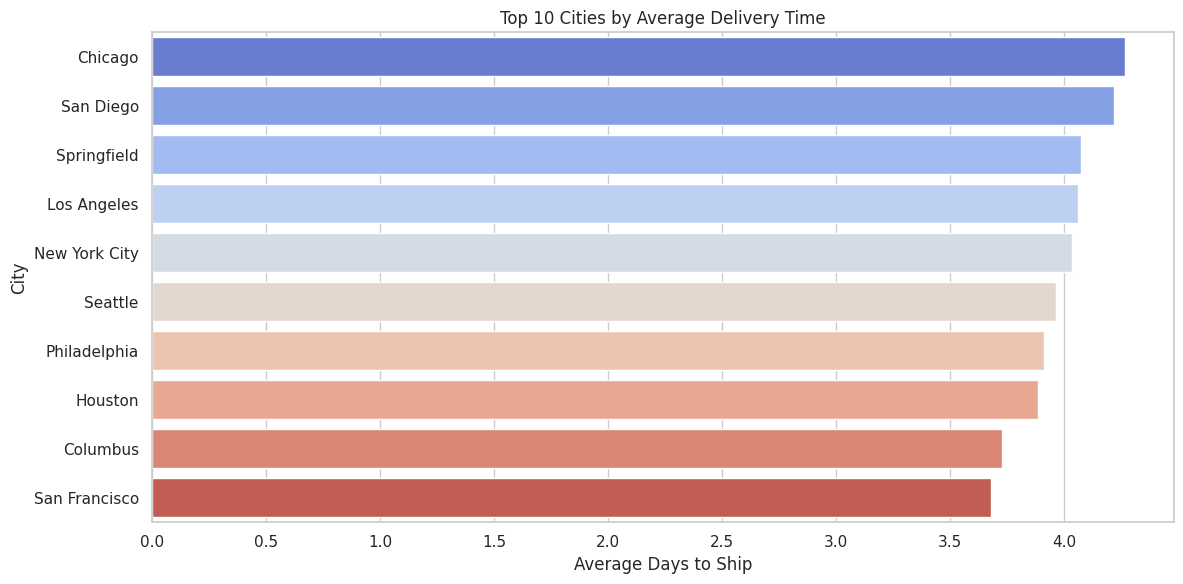

In [115]:
top_10_cities = df[df['City'].isin(df['City'].value_counts().head(10).index)]
city_delivery_time = top_10_cities.groupby('City')['Days to Ship'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=city_delivery_time.values, y=city_delivery_time.index, palette='coolwarm')
plt.title("Top 10 Cities by Average Delivery Time")
plt.xlabel("Average Days to Ship")
plt.ylabel("City")
plt.tight_layout()
plt.savefig('visuals/top_cities_avg_delivery_time_bar.png')
plt.show()